# JALANKAN DALAM PYTHON VERSION 3.6

In [1]:
# DOCUMENTATION TENSORFLOW https://docs.microsoft.com/en-us/windows/ai/directml/gpu-faq#how-do-i-use-the--dml-visible-devices--environment-variable-to-control-which-gpu-s--get-used-by-directml
# NGELIHAT TENSORFLOW UNTUK PENGGUNAAN GPU PADA JUPYTER NOTEBOOK BERFUNGSI
# ATAU TIDAK

## Untuk downgrade tensorflow ke versi 1.15.3, ga perlu pip uninstall, karena pip udah otomatis langsung ganti ke versi yang dipilih pada saat pip install, jadi tinggal jalanin aja kodingan di bawah ini
# pip install tensorflow==1.15.3 --user

# import os

# #See devices        
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

import tensorflow as tf 


tf.debugging.set_log_device_placement(True) 
tf.enable_eager_execution() 

# Explicitly place tensors on the DirectML device 

with tf.device('/DML:0'): 
  a = tf.constant([1.0, 2.0, 3.0]) 
  b = tf.constant([4.0, 5.0, 6.0]) 

c = tf.add(a, b) 

print(c)

# import tensorflow.compat.v1 as tf 

# tf.enable_eager_execution(tf.ConfigProto(log_device_placement=True)) 

# print(tf.add([1.0, 2.0], [3.0, 4.0])) 

Executing op Add in device /job:localhost/replica:0/task:0/device:DML:0
tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)


In [2]:
# INISIALISASI LIBRARY

# pip install -U scikit-learn
# from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np
import re
import joblib
import ember
import lightgbm as lgb

# from dash import dcc
from numpy import mean, std
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.experimental import enable_halving_search_cv 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingCVClassifier
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import validation_curve
 
# np.array(arraynya).mean()

In [3]:
ember = pd.read_json('ember_dataset_2017_1/ember/train_features_0.jsonl', lines = True)

In [4]:
ember.head(1)

sha256 appeared  label  \
0  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2006-12      0   

                                           histogram  \
0  [45521, 13095, 12167, 12496, 12429, 11709, 118...   

                                         byteentropy  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                             strings  \
0  {'numstrings': 14573, 'avlength': 5.9720716393...   

                                             general  \
0  {'size': 3101705, 'vsize': 380928, 'has_debug'...   

                                              header  \
0  {'coff': {'timestamp': 1124149349, 'machine': ...   

                                             section  \
0  {'entry': '.text', 'sections': [{'name': '.tex...   

                                             imports exports  
0  {'KERNEL32.dll': ['SetFileTime', 'CompareFileT...      []

In [5]:
df_columns = pd.read_csv('Bodmas/ember_2381_feature_names.txt', delimiter='\n')
df_columns = list(df_columns['0'])

In [6]:
# DATA PREPROCESSING

import numpy as np

filename = 'Bodmas/bodmas.npz'
data = np.load(filename)
X = data['X']  # all the feature vectors
y = data['y']  # labels, 0 as benign, 1 as malicious
# print(data.files)

# metadata = pd.read_csv('Bodmas/bodmas_metadata.csv')
# metadata
# df['y'].unique()

In [7]:
# INISIALISASI VARIABEL X DAN Y

X = pd.DataFrame(X, columns=df_columns)
y = pd.DataFrame(y)

In [8]:
# INISIALISASI VARIABEL DATAFRAME DF

df = pd.DataFrame(X)
df['Label'] = pd.DataFrame(y)
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df.head(1)

ByteHistorgram0  ByteHistorgram1  ByteHistorgram2  ByteHistorgram3  \
0         0.056742         0.008017         0.007762         0.005466   

   ByteHistorgram4  ByteHistorgram5  ByteHistorgram6  ByteHistorgram7  \
0         0.007762         0.004446          0.00543         0.003061   

   ByteHistorgram8  ByteHistorgram9  ...  virtualsizeofdatadirectories10  \
0         0.009475         0.006305  ...                             0.0   

   sizeofdatadirectories11  virtualsizeofdatadirectories11  \
0                      0.0                             0.0   

   sizeofdatadirectories12  virtualsizeofdatadirectories12  \
0                      0.0                             0.0   

   sizeofdatadirectories13  virtualsizeofdatadirectories13  \
0                      0.0                             0.0   

   sizeofdatadirectories14  virtualsizeofdatadirectories14  Label  
0                      0.0                             0.0      0  

[1 rows x 2382 columns]

alt.Chart(...)

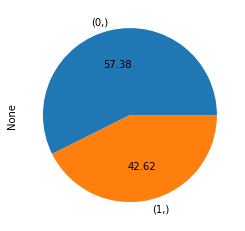

In [9]:
# Visualiasi persebaran data

y.value_counts()
y.value_counts().plot.pie(autopct='%.2f')

group_label = df.groupby(["Label"]).count().reset_index()

alt.Chart(group_label).mark_bar().encode(
    alt.X('Label:O', axis=alt.Axis(title='Label')),
    alt.Y('ByteHistorgram0:Q', axis=alt.Axis(title='Number of samples')),
    alt.Color('Label:N', scale=alt.Scale(range=["#3333ff", "#ff3333"]), legend=alt.Legend(values=["benign", "malicious"]))
)

In [10]:
# MEMILIH FEATURE YANG MEMILIKI NILAI VARIANCE NYA 0

### It will drop low variance features towards the dataset

thresh = VarianceThreshold(threshold=0)
thresh.fit(df)
thresh.get_support()

### columns that have 0 threshold
columns_not_used = [column for column in df.columns if column not in df.columns[thresh.get_support()]]

# # print(len(columns_not_used))
# print('feature yang threshold nya 0: ')
# for feature in columns_not_used:
#   print(feature)

In [11]:
# NGE DROP FEATURE YANG MEMILIKI NILAI VARIANCE NYA 0

# Feature Selection Using Correlation Between Feature

df = df.drop(columns_not_used,axis=1)

# DROP DATA YANG KOSONG
df = df.dropna()
df.shape
# df.isnull().sum().sum()
X = df.drop(['Label'], axis=1)
y = df['Label']

In [12]:
# TRAIN TEST SPLIT DATA

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0,test_size=0.2)

In [13]:
# # Menyimpan X_test untuk mengetes nilai akurasi pada data yang akan diprediksi di masa depan

# X_test.to_csv('Web Application For Machine Learning\X_test.csv')
# y_test.to_csv('Web Application For Machine Learning\y_test.csv')

In [14]:
# # EXPLORATORY DATA MENGGUNAKAN D-TALE

# import dtale
# import dtale.global_state as global_state

# global_state.set_chart_settings({'scatter_points': 134435, '3d_points': 134435})
# dtale.show(df)

In [15]:
%%time

# SELEKSI FITUR MENGGUNAKAN RANDOM FOREST

sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, y_train.values.ravel())
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

Wall time: 3min 34s


417

In [16]:
# NGEDROP FEATURE YANG TIDAK TERPAKAI SESUAI DENGAN HASIL SELEKSI FITUR

columns_train_not_used = [column for column in X_train.columns if column not in selected_feat]
X_train = X_train.drop(columns_train_not_used,axis=1)
X_test = X_test.drop(columns_train_not_used,axis=1)
X = X.drop(columns_train_not_used,axis=1)
df = df.drop(columns_train_not_used,axis=1)

In [17]:
# Menyimpan hasil seleksi fitur ke dalam file output.txt

with open('Web Application For Machine Learning\output.txt', 'w') as txt_file:
    txt_file.write('0\n')
    for row in X_train.columns:
        txt_file.write("".join(row) + '\n')

In [18]:
# # Standardization Data (StandardScaler() ternyata udah pakai z-score, jadi Standardization StandardScaler itu sama dengan Standarisasi data menggunakan Z-SCORE)

# scaler = StandardScaler() # where X is your data to be scaled
# X_train = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(X_train)

# X_train.head()

In [19]:
# %%time

# # Adaboost, Gradient Boosting

# AB = AdaBoostClassifier(random_state=0)
# AB.fit(X_train,y_train)
# AB_pred = AB.predict(X_test)
# print('AdaBoost: \n')
# print(classification_report(y_test, AB_pred, target_names=['Benign', 'Malware']))
# print(accuracy_score(y_test,AB_pred)*100, "%")

# GB = GradientBoostingClassifier(random_state=0)
# GB.fit(X_train,y_train)
# GB_pred = GB.predict(X_test)
# print('GradienBoosting: \n')
# print(classification_report(y_test, GB_pred, target_names=['Benign', 'Malware']))
# print(accuracy_score(y_test,GB_pred)*100, "%")

In [20]:
%%time

# Adaboost

AB = AdaBoostClassifier(random_state=0, n_estimators=10)
# AB.fit(X_train,y_train)
# AB_pred = AB.predict(X_test)
# print('AdaBoost: \n')
# print(classification_report(y_test, AB_pred, target_names=['Benign', 'Malware']))
# print(accuracy_score(y_test,AB_pred)*100, "%")

scores_AB = cross_val_score(AB, X, y, cv=5)
scores_AB.mean()

# plot_learning_curves(X_train, y_train, X_test, y_test, AB)
# plt.show()

# train_scores, valid_scores = validation_curve(
#     AB, 
#     X_train, 
#     y_train, 
#     param_name="base_estimator", 
#     param_range=[10, 30, 40], 
#     scoring='accuracy', 
#     cv=5
# )



Wall time: 2min 34s


array([0.87696656, 0.95756313, 0.93390858, 0.97255179, 0.95295124])

0.938788261985346

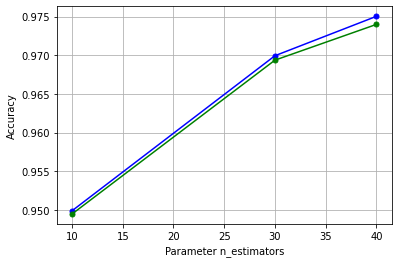

In [36]:
# %%time

# # Validation Curve AdaBoost Classifier

# param_range=[10, 30, 40]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)

# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('Parameter n_estimators')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()

In [21]:
# # Adaboost

# AB = AdaBoostClassifier()
# # AB.fit(X_train,y_train)
# # AB_pred = AB.predict(X_test)
# # print('AdaBoost: \n')
# # print(classification_report(y_test, AB_pred, target_names=['Benign', 'Malware']))
# # print(accuracy_score(y_test,AB_pred)*100, "%")

# # HyperParameter Tuning Adaboost

# param_grid_AB = {
#     "n_estimators": [50,100,1000,2000],
#     "learning_rate": [1.0,2.0,3.0,4.0]
# }

# GSCV_AB = HalvingRandomSearchCV(
#     estimator=AB,
#     param_distributions = param_grid_AB,
#     scoring='accuracy',
#     random_state=0
# )

# GSCV_AB.fit(X_train,y_train)
# print(GSCV_AB.best_score_)
# print(GSCV_AB.best_estimator_.getparams())

In [22]:
%%time

# LightGBM Classifier

LGBM = LGBMClassifier(random_state=0, num_leaves=5, n_estimators=40, objective='binary')
# LGBM.fit(X_train,y_train)
# LGBM_pred = LGBM.predict(X_test)
# print('LGBM Classifier: \n')
# print(classification_report(y_test, LGBM_pred, target_names=['Benign', 'Malware']))
# print(accuracy_score(y_test,LGBM_pred)*100, "%")

scores_LGBM = cross_val_score(LGBM, X, y, cv=5)
scores_LGBM.mean()

# Validation Curve LightGBM n_estimators
# train_scores, valid_scores = validation_curve(
#     LGBM, 
#     X_train, 
#     y_train, 
#     param_name="n_estimators", 
#     param_range=[25, 50, 100], 
#     scoring='accuracy', 
#     cv=5
# )

# param_range=[25, 50, 100]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)

# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('Parameter n_estimators')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()


# Validation Curve LightGBM num_leaves
# train_scores, valid_scores = validation_curve(
#     LGBM, 
#     X_train, 
#     y_train, 
#     param_name="num_leaves", 
#     param_range=[5, 10, 15], 
#     scoring='accuracy', 
#     cv=5
# )

# param_range=[5, 10, 15]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)

# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('Parameter num_leaves')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()

# # LightGBM

# import lightgbm

# train_data = lightgbm.Dataset(X_train, label=y_train)
# test_data = lightgbm.Dataset(X_test, label=y_test)

# parameters = {
#     'objective': 'binary',
#     'metric': 'auc',
#     'is_unbalance': 'true',
#     'boosting': 'gbdt',
#     'num_leaves': 63
# }

# model_lgbm = lightgbm.train(parameters,
#                            train_data,
#                            valid_sets=test_data,
#                            num_boost_round=5000,
#                            early_stopping_rounds=50)

# lgbm_y_train_pred = model_lgbm.predict(X_train)
# lgbm_y_test_pred = model_lgbm.predict(X_test)

# print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
#                                                     roc_auc_score(y_test, y_test_pred)))


# Kodingan versi lain LightGBM, mungkin di masa depan akan dipakai, dan mungkin juga tidak

# import ember
# import lightgbm as lgb
# params = {"application": "binary"}
# lgbm_dataset = lgb.Dataset(X_train, y_train)
# lgbm_model = lgb.train(params, lgbm_dataset)
# lgbm_model.save_model(filename='lgbm_test')

# y_train_pred = lgbm_model.predict(X_train)


# HyperParameter Tuning LightGBM




Wall time: 14.8 s


0.959727749470004

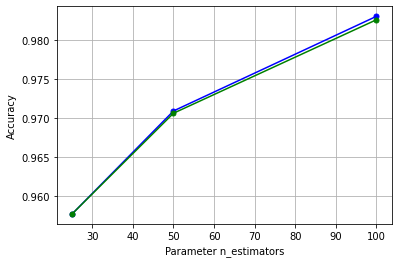

In [48]:
# Validation Curve LightGBM num_leaves

# param_range=[5, 10, 15]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)

# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('Parameter num_leaves')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()

# Validation Curve LightGBM n_estimators

# param_range=[25, 50, 100]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)

# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('Parameter n_estimators')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()

In [23]:
# %%time

# # XGBoost Classifier

# XGB = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=5000, subsample=0.5, colsample_bytree=0.5, eval_metric='auc', verbosity=1)
# # XGB.fit(X_train,y_train)
# # XGB_pred = XGB.predict(X_test)
# # print('XGBoost Classifier: \n')
# # print(classification_report(y_test, XGB_pred, target_names=['Benign', 'Malware']))
# # print(accuracy_score(y_test,XGB_pred)*100, "%")

# scores_XGB = cross_val_score(XGB, X, y, cv=5)
# scores_XGB.mean()

# # # XGBoost

# # model_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
# #                                       max_depth=5,
# #                                       n_estimators=5000,
# #                                       subsample=0.5,
# #                                       colsample_bytree=0.5,
# #                                       eval_metric='auc',
# #                                       verbosity=1)

# # eval_set = [(X_test, y_test)]

# # model_xgboost.fit(X_train,
# #                   y_train,
# #                   early_stopping_rounds=10,
# #                   eval_set=eval_set,
# #                   verbose=True)

# # y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
# # y_test_pred = model_xgboost.predict_proba(X_test)[:,1]

# # print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
# #                                                     roc_auc_score(y_test, y_test_pred)))

# # # Hyperparameter Tuning XGBoost

# # learning_rate_list = [0.02, 0.05, 0.1]
# # max_depth_list = [2, 3, 5]
# # n_estimators_list = [1000, 2000, 3000]

# # params_dict = {"learning_rate": learning_rate_list,
# #                "max_depth": max_depth_list,
# #                "n_estimators": n_estimators_list}

# # num_combinations = 1
# # for v in params_dict.values(): num_combinations *= len(v) 

# # print(num_combinations)
# # params_dict

E:\Users\fauzanhikmahramadhan\Anaconda3\envs\amdgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Users\fauzanhikmahramadhan\Anaconda3\envs\amdgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Users\fauzanhikmahramadhan\Anaconda

In [25]:
%%time

# Cat Boost

CAT = CatBoostClassifier(random_state=0, objective='Logloss', depth=2, learning_rate=0.0005)
# CAT.fit(X_train, y_train)
# CAT_pred = CAT.predict(X_test)
# print('Cat Boost: \n')
# print(classification_report(y_test, CAT_pred, target_names=['Benign', 'Malware']))
# print(accuracy_score(y_test,CAT_pred)*100, "%")

scores_CAT = cross_val_score(CAT, X, y, cv=5)
scores_CAT.mean()


0:	learn: 0.6925204	total: 271ms	remaining: 4m 31s
1:	learn: 0.6918947	total: 303ms	remaining: 2m 30s
2:	learn: 0.6912701	total: 332ms	remaining: 1m 50s
3:	learn: 0.6906467	total: 364ms	remaining: 1m 30s
4:	learn: 0.6900816	total: 393ms	remaining: 1m 18s
5:	learn: 0.6895133	total: 422ms	remaining: 1m 9s
6:	learn: 0.6888929	total: 452ms	remaining: 1m 4s
7:	learn: 0.6883271	total: 483ms	remaining: 59.9s
8:	learn: 0.6877088	total: 513ms	remaining: 56.4s
9:	learn: 0.6871060	total: 543ms	remaining: 53.8s
10:	learn: 0.6864914	total: 574ms	remaining: 51.6s
11:	learn: 0.6858780	total: 604ms	remaining: 49.7s
12:	learn: 0.6852690	total: 635ms	remaining: 48.2s
13:	learn: 0.6847100	total: 665ms	remaining: 46.9s
14:	learn: 0.6840975	total: 696ms	remaining: 45.7s
15:	learn: 0.6835387	total: 725ms	remaining: 44.6s
16:	learn: 0.6829305	total: 755ms	remaining: 43.7s
17:	learn: 0.6824542	total: 785ms	remaining: 42.8s
18:	learn: 0.6818484	total: 815ms	remaining: 42.1s
19:	learn: 0.6812471	total: 847ms	re

163:	learn: 0.6109771	total: 5.18s	remaining: 26.4s
164:	learn: 0.6105963	total: 5.21s	remaining: 26.4s
165:	learn: 0.6102160	total: 5.24s	remaining: 26.3s
166:	learn: 0.6097338	total: 5.27s	remaining: 26.3s
167:	learn: 0.6092507	total: 5.3s	remaining: 26.3s
168:	learn: 0.6087684	total: 5.33s	remaining: 26.2s
169:	learn: 0.6083905	total: 5.37s	remaining: 26.2s
170:	learn: 0.6079097	total: 5.4s	remaining: 26.2s
171:	learn: 0.6074759	total: 5.43s	remaining: 26.1s
172:	learn: 0.6070997	total: 5.46s	remaining: 26.1s
173:	learn: 0.6066212	total: 5.48s	remaining: 26s
174:	learn: 0.6061436	total: 5.51s	remaining: 26s
175:	learn: 0.6057695	total: 5.54s	remaining: 25.9s
176:	learn: 0.6053959	total: 5.57s	remaining: 25.9s
177:	learn: 0.6050228	total: 5.59s	remaining: 25.8s
178:	learn: 0.6045528	total: 5.62s	remaining: 25.8s
179:	learn: 0.6041196	total: 5.65s	remaining: 25.8s
180:	learn: 0.6037480	total: 5.68s	remaining: 25.7s
181:	learn: 0.6033141	total: 5.71s	remaining: 25.7s
182:	learn: 0.6029

324:	learn: 0.5523039	total: 9.84s	remaining: 20.4s
325:	learn: 0.5519601	total: 9.87s	remaining: 20.4s
326:	learn: 0.5516588	total: 9.89s	remaining: 20.4s
327:	learn: 0.5512743	total: 9.92s	remaining: 20.3s
328:	learn: 0.5510096	total: 9.95s	remaining: 20.3s
329:	learn: 0.5507096	total: 9.97s	remaining: 20.3s
330:	learn: 0.5503261	total: 10s	remaining: 20.2s
331:	learn: 0.5500271	total: 10s	remaining: 20.2s
332:	learn: 0.5497285	total: 10.1s	remaining: 20.2s
333:	learn: 0.5494303	total: 10.1s	remaining: 20.1s
334:	learn: 0.5491671	total: 10.1s	remaining: 20.1s
335:	learn: 0.5489046	total: 10.1s	remaining: 20.1s
336:	learn: 0.5486430	total: 10.2s	remaining: 20s
337:	learn: 0.5483462	total: 10.2s	remaining: 20s
338:	learn: 0.5480849	total: 10.2s	remaining: 20s
339:	learn: 0.5477099	total: 10.3s	remaining: 19.9s
340:	learn: 0.5473312	total: 10.3s	remaining: 19.9s
341:	learn: 0.5470361	total: 10.3s	remaining: 19.9s
342:	learn: 0.5467414	total: 10.3s	remaining: 19.8s
343:	learn: 0.5464472	

487:	learn: 0.5067816	total: 14.5s	remaining: 15.2s
488:	learn: 0.5065393	total: 14.6s	remaining: 15.2s
489:	learn: 0.5060246	total: 14.6s	remaining: 15.2s
490:	learn: 0.5057830	total: 14.6s	remaining: 15.1s
491:	learn: 0.5055693	total: 14.6s	remaining: 15.1s
492:	learn: 0.5052934	total: 14.7s	remaining: 15.1s
493:	learn: 0.5050394	total: 14.7s	remaining: 15s
494:	learn: 0.5047990	total: 14.7s	remaining: 15s
495:	learn: 0.5045589	total: 14.7s	remaining: 15s
496:	learn: 0.5040477	total: 14.8s	remaining: 14.9s
497:	learn: 0.5038352	total: 14.8s	remaining: 14.9s
498:	learn: 0.5033255	total: 14.8s	remaining: 14.9s
499:	learn: 0.5030869	total: 14.9s	remaining: 14.9s
500:	learn: 0.5028753	total: 14.9s	remaining: 14.8s
501:	learn: 0.5026237	total: 14.9s	remaining: 14.8s
502:	learn: 0.5023563	total: 14.9s	remaining: 14.8s
503:	learn: 0.5021189	total: 15s	remaining: 14.7s
504:	learn: 0.5018819	total: 15s	remaining: 14.7s
505:	learn: 0.5016716	total: 15s	remaining: 14.7s
506:	learn: 0.5014078	to

653:	learn: 0.4478474	total: 19.2s	remaining: 10.1s
654:	learn: 0.4474679	total: 19.2s	remaining: 10.1s
655:	learn: 0.4470895	total: 19.2s	remaining: 10.1s
656:	learn: 0.4469432	total: 19.3s	remaining: 10.1s
657:	learn: 0.4465659	total: 19.3s	remaining: 10s
658:	learn: 0.4461896	total: 19.3s	remaining: 9.99s
659:	learn: 0.4460246	total: 19.3s	remaining: 9.96s
660:	learn: 0.4456495	total: 19.4s	remaining: 9.93s
661:	learn: 0.4452753	total: 19.4s	remaining: 9.9s
662:	learn: 0.4449022	total: 19.4s	remaining: 9.87s
663:	learn: 0.4447380	total: 19.4s	remaining: 9.84s
664:	learn: 0.4445746	total: 19.5s	remaining: 9.81s
665:	learn: 0.4442027	total: 19.5s	remaining: 9.78s
666:	learn: 0.4438318	total: 19.5s	remaining: 9.75s
667:	learn: 0.4434619	total: 19.6s	remaining: 9.72s
668:	learn: 0.4430930	total: 19.6s	remaining: 9.69s
669:	learn: 0.4427251	total: 19.6s	remaining: 9.66s
670:	learn: 0.4423581	total: 19.6s	remaining: 9.63s
671:	learn: 0.4419921	total: 19.7s	remaining: 9.6s
672:	learn: 0.44

819:	learn: 0.3990022	total: 23.8s	remaining: 5.23s
820:	learn: 0.3988417	total: 23.9s	remaining: 5.2s
821:	learn: 0.3986816	total: 23.9s	remaining: 5.17s
822:	learn: 0.3985217	total: 23.9s	remaining: 5.14s
823:	learn: 0.3983876	total: 23.9s	remaining: 5.11s
824:	learn: 0.3982283	total: 24s	remaining: 5.08s
825:	learn: 0.3979729	total: 24s	remaining: 5.06s
826:	learn: 0.3977183	total: 24s	remaining: 5.03s
827:	learn: 0.3974643	total: 24.1s	remaining: 5s
828:	learn: 0.3972110	total: 24.1s	remaining: 4.97s
829:	learn: 0.3970757	total: 24.1s	remaining: 4.94s
830:	learn: 0.3968232	total: 24.1s	remaining: 4.91s
831:	learn: 0.3965713	total: 24.2s	remaining: 4.88s
832:	learn: 0.3964359	total: 24.2s	remaining: 4.85s
833:	learn: 0.3962785	total: 24.2s	remaining: 4.82s
834:	learn: 0.3961214	total: 24.3s	remaining: 4.79s
835:	learn: 0.3958706	total: 24.3s	remaining: 4.76s
836:	learn: 0.3957161	total: 24.3s	remaining: 4.73s
837:	learn: 0.3955595	total: 24.3s	remaining: 4.7s
838:	learn: 0.3954249	t

980:	learn: 0.3738655	total: 28s	remaining: 542ms
981:	learn: 0.3737536	total: 28s	remaining: 514ms
982:	learn: 0.3735306	total: 28.1s	remaining: 485ms
983:	learn: 0.3734128	total: 28.1s	remaining: 457ms
984:	learn: 0.3733008	total: 28.1s	remaining: 428ms
985:	learn: 0.3731887	total: 28.1s	remaining: 399ms
986:	learn: 0.3730707	total: 28.2s	remaining: 371ms
987:	learn: 0.3728492	total: 28.2s	remaining: 342ms
988:	learn: 0.3727361	total: 28.2s	remaining: 314ms
989:	learn: 0.3726188	total: 28.2s	remaining: 285ms
990:	learn: 0.3725072	total: 28.3s	remaining: 257ms
991:	learn: 0.3722860	total: 28.3s	remaining: 228ms
992:	learn: 0.3721689	total: 28.3s	remaining: 200ms
993:	learn: 0.3719706	total: 28.3s	remaining: 171ms
994:	learn: 0.3717511	total: 28.4s	remaining: 143ms
995:	learn: 0.3716294	total: 28.4s	remaining: 114ms
996:	learn: 0.3715128	total: 28.4s	remaining: 85.5ms
997:	learn: 0.3714018	total: 28.5s	remaining: 57ms
998:	learn: 0.3712663	total: 28.5s	remaining: 28.5ms
999:	learn: 0.3

147:	learn: 0.6319679	total: 3.97s	remaining: 22.8s
148:	learn: 0.6315869	total: 3.99s	remaining: 22.8s
149:	learn: 0.6312030	total: 4.02s	remaining: 22.8s
150:	learn: 0.6308892	total: 4.05s	remaining: 22.8s
151:	learn: 0.6305724	total: 4.07s	remaining: 22.7s
152:	learn: 0.6301935	total: 4.1s	remaining: 22.7s
153:	learn: 0.6298907	total: 4.13s	remaining: 22.7s
154:	learn: 0.6295883	total: 4.15s	remaining: 22.6s
155:	learn: 0.6292687	total: 4.18s	remaining: 22.6s
156:	learn: 0.6289496	total: 4.21s	remaining: 22.6s
157:	learn: 0.6286333	total: 4.23s	remaining: 22.6s
158:	learn: 0.6283181	total: 4.26s	remaining: 22.5s
159:	learn: 0.6279379	total: 4.29s	remaining: 22.5s
160:	learn: 0.6276246	total: 4.31s	remaining: 22.5s
161:	learn: 0.6273106	total: 4.34s	remaining: 22.4s
162:	learn: 0.6269348	total: 4.36s	remaining: 22.4s
163:	learn: 0.6266216	total: 4.39s	remaining: 22.4s
164:	learn: 0.6262437	total: 4.42s	remaining: 22.4s
165:	learn: 0.6259320	total: 4.45s	remaining: 22.3s
166:	learn: 0

309:	learn: 0.5801042	total: 8.34s	remaining: 18.6s
310:	learn: 0.5798411	total: 8.37s	remaining: 18.5s
311:	learn: 0.5795524	total: 8.39s	remaining: 18.5s
312:	learn: 0.5791315	total: 8.42s	remaining: 18.5s
313:	learn: 0.5788838	total: 8.45s	remaining: 18.5s
314:	learn: 0.5784640	total: 8.47s	remaining: 18.4s
315:	learn: 0.5781469	total: 8.5s	remaining: 18.4s
316:	learn: 0.5778302	total: 8.52s	remaining: 18.4s
317:	learn: 0.5775837	total: 8.55s	remaining: 18.3s
318:	learn: 0.5772678	total: 8.57s	remaining: 18.3s
319:	learn: 0.5770218	total: 8.6s	remaining: 18.3s
320:	learn: 0.5767939	total: 8.62s	remaining: 18.2s
321:	learn: 0.5763775	total: 8.65s	remaining: 18.2s
322:	learn: 0.5760631	total: 8.68s	remaining: 18.2s
323:	learn: 0.5758182	total: 8.7s	remaining: 18.2s
324:	learn: 0.5755294	total: 8.73s	remaining: 18.1s
325:	learn: 0.5752159	total: 8.75s	remaining: 18.1s
326:	learn: 0.5749578	total: 8.78s	remaining: 18.1s
327:	learn: 0.5745441	total: 8.81s	remaining: 18s
328:	learn: 0.574

470:	learn: 0.5327374	total: 12.5s	remaining: 14s
471:	learn: 0.5324685	total: 12.5s	remaining: 14s
472:	learn: 0.5322786	total: 12.5s	remaining: 14s
473:	learn: 0.5319314	total: 12.6s	remaining: 13.9s
474:	learn: 0.5315848	total: 12.6s	remaining: 13.9s
475:	learn: 0.5313956	total: 12.6s	remaining: 13.9s
476:	learn: 0.5311355	total: 12.6s	remaining: 13.9s
477:	learn: 0.5308643	total: 12.7s	remaining: 13.8s
478:	learn: 0.5306949	total: 12.7s	remaining: 13.8s
479:	learn: 0.5304263	total: 12.7s	remaining: 13.8s
480:	learn: 0.5301673	total: 12.7s	remaining: 13.7s
481:	learn: 0.5298232	total: 12.8s	remaining: 13.7s
482:	learn: 0.5294797	total: 12.8s	remaining: 13.7s
483:	learn: 0.5293091	total: 12.8s	remaining: 13.7s
484:	learn: 0.5291406	total: 12.8s	remaining: 13.6s
485:	learn: 0.5287981	total: 12.9s	remaining: 13.6s
486:	learn: 0.5284561	total: 12.9s	remaining: 13.6s
487:	learn: 0.5281149	total: 12.9s	remaining: 13.6s
488:	learn: 0.5277743	total: 12.9s	remaining: 13.5s
489:	learn: 0.5275

632:	learn: 0.4938444	total: 16.6s	remaining: 9.65s
633:	learn: 0.4935534	total: 16.7s	remaining: 9.62s
634:	learn: 0.4933393	total: 16.7s	remaining: 9.6s
635:	learn: 0.4931947	total: 16.7s	remaining: 9.57s
636:	learn: 0.4929997	total: 16.7s	remaining: 9.54s
637:	learn: 0.4928405	total: 16.8s	remaining: 9.52s
638:	learn: 0.4925507	total: 16.8s	remaining: 9.49s
639:	learn: 0.4923208	total: 16.8s	remaining: 9.46s
640:	learn: 0.4921705	total: 16.8s	remaining: 9.44s
641:	learn: 0.4919594	total: 16.9s	remaining: 9.41s
642:	learn: 0.4918121	total: 16.9s	remaining: 9.38s
643:	learn: 0.4915236	total: 16.9s	remaining: 9.36s
644:	learn: 0.4913166	total: 17s	remaining: 9.33s
645:	learn: 0.4910288	total: 17s	remaining: 9.3s
646:	learn: 0.4908223	total: 17s	remaining: 9.28s
647:	learn: 0.4905352	total: 17s	remaining: 9.25s
648:	learn: 0.4903887	total: 17.1s	remaining: 9.22s
649:	learn: 0.4902437	total: 17.1s	remaining: 9.2s
650:	learn: 0.4899574	total: 17.1s	remaining: 9.17s
651:	learn: 0.4898129	t

793:	learn: 0.4611004	total: 20.8s	remaining: 5.39s
794:	learn: 0.4608539	total: 20.8s	remaining: 5.37s
795:	learn: 0.4606077	total: 20.8s	remaining: 5.34s
796:	learn: 0.4604095	total: 20.9s	remaining: 5.31s
797:	learn: 0.4601640	total: 20.9s	remaining: 5.29s
798:	learn: 0.4599665	total: 20.9s	remaining: 5.26s
799:	learn: 0.4597217	total: 20.9s	remaining: 5.23s
800:	learn: 0.4595941	total: 21s	remaining: 5.21s
801:	learn: 0.4593504	total: 21s	remaining: 5.18s
802:	learn: 0.4591549	total: 21s	remaining: 5.16s
803:	learn: 0.4590246	total: 21s	remaining: 5.13s
804:	learn: 0.4588292	total: 21.1s	remaining: 5.1s
805:	learn: 0.4586631	total: 21.1s	remaining: 5.08s
806:	learn: 0.4584201	total: 21.1s	remaining: 5.05s
807:	learn: 0.4581776	total: 21.1s	remaining: 5.02s
808:	learn: 0.4580468	total: 21.2s	remaining: 5s
809:	learn: 0.4578513	total: 21.2s	remaining: 4.97s
810:	learn: 0.4577246	total: 21.2s	remaining: 4.94s
811:	learn: 0.4575958	total: 21.2s	remaining: 4.92s
812:	learn: 0.4573542	to

952:	learn: 0.4332118	total: 24.9s	remaining: 1.23s
953:	learn: 0.4330518	total: 24.9s	remaining: 1.2s
954:	learn: 0.4328947	total: 24.9s	remaining: 1.18s
955:	learn: 0.4327267	total: 25s	remaining: 1.15s
956:	learn: 0.4325180	total: 25s	remaining: 1.12s
957:	learn: 0.4324021	total: 25s	remaining: 1.1s
958:	learn: 0.4321939	total: 25s	remaining: 1.07s
959:	learn: 0.4319860	total: 25.1s	remaining: 1.04s
960:	learn: 0.4317785	total: 25.1s	remaining: 1.02s
961:	learn: 0.4315934	total: 25.1s	remaining: 992ms
962:	learn: 0.4314407	total: 25.1s	remaining: 966ms
963:	learn: 0.4312339	total: 25.2s	remaining: 940ms
964:	learn: 0.4310674	total: 25.2s	remaining: 914ms
965:	learn: 0.4308612	total: 25.2s	remaining: 888ms
966:	learn: 0.4306553	total: 25.3s	remaining: 862ms
967:	learn: 0.4305403	total: 25.3s	remaining: 836ms
968:	learn: 0.4304264	total: 25.3s	remaining: 810ms
969:	learn: 0.4303151	total: 25.3s	remaining: 784ms
970:	learn: 0.4302005	total: 25.4s	remaining: 757ms
971:	learn: 0.4300861	

119:	learn: 0.6308690	total: 3.4s	remaining: 25s
120:	learn: 0.6303851	total: 3.43s	remaining: 24.9s
121:	learn: 0.6299001	total: 3.46s	remaining: 24.9s
122:	learn: 0.6294160	total: 3.48s	remaining: 24.8s
123:	learn: 0.6289284	total: 3.51s	remaining: 24.8s
124:	learn: 0.6284416	total: 3.54s	remaining: 24.8s
125:	learn: 0.6279593	total: 3.56s	remaining: 24.7s
126:	learn: 0.6275232	total: 3.59s	remaining: 24.7s
127:	learn: 0.6270384	total: 3.62s	remaining: 24.7s
128:	learn: 0.6265609	total: 3.65s	remaining: 24.6s
129:	learn: 0.6260776	total: 3.67s	remaining: 24.6s
130:	learn: 0.6255952	total: 3.7s	remaining: 24.6s
131:	learn: 0.6251175	total: 3.73s	remaining: 24.5s
132:	learn: 0.6246366	total: 3.75s	remaining: 24.5s
133:	learn: 0.6241619	total: 3.78s	remaining: 24.4s
134:	learn: 0.6236867	total: 3.81s	remaining: 24.4s
135:	learn: 0.6232490	total: 3.83s	remaining: 24.4s
136:	learn: 0.6227797	total: 3.86s	remaining: 24.3s
137:	learn: 0.6223113	total: 3.89s	remaining: 24.3s
138:	learn: 0.62

279:	learn: 0.5643485	total: 7.76s	remaining: 19.9s
280:	learn: 0.5639549	total: 7.8s	remaining: 20s
281:	learn: 0.5636611	total: 7.82s	remaining: 19.9s
282:	learn: 0.5632834	total: 7.85s	remaining: 19.9s
283:	learn: 0.5629905	total: 7.88s	remaining: 19.9s
284:	learn: 0.5626119	total: 7.9s	remaining: 19.8s
285:	learn: 0.5622699	total: 7.93s	remaining: 19.8s
286:	learn: 0.5619295	total: 7.96s	remaining: 19.8s
287:	learn: 0.5615392	total: 7.99s	remaining: 19.7s
288:	learn: 0.5611676	total: 8.01s	remaining: 19.7s
289:	learn: 0.5608217	total: 8.04s	remaining: 19.7s
290:	learn: 0.5604850	total: 8.07s	remaining: 19.7s
291:	learn: 0.5600967	total: 8.09s	remaining: 19.6s
292:	learn: 0.5597556	total: 8.12s	remaining: 19.6s
293:	learn: 0.5594223	total: 8.15s	remaining: 19.6s
294:	learn: 0.5590354	total: 8.17s	remaining: 19.5s
295:	learn: 0.5587477	total: 8.2s	remaining: 19.5s
296:	learn: 0.5583805	total: 8.23s	remaining: 19.5s
297:	learn: 0.5580389	total: 8.26s	remaining: 19.5s
298:	learn: 0.557

440:	learn: 0.5132719	total: 12.1s	remaining: 15.3s
441:	learn: 0.5129690	total: 12.1s	remaining: 15.3s
442:	learn: 0.5126705	total: 12.1s	remaining: 15.3s
443:	learn: 0.5123978	total: 12.2s	remaining: 15.2s
444:	learn: 0.5121552	total: 12.2s	remaining: 15.2s
445:	learn: 0.5118353	total: 12.2s	remaining: 15.2s
446:	learn: 0.5115160	total: 12.3s	remaining: 15.2s
447:	learn: 0.5112756	total: 12.3s	remaining: 15.1s
448:	learn: 0.5109756	total: 12.3s	remaining: 15.1s
449:	learn: 0.5106575	total: 12.3s	remaining: 15.1s
450:	learn: 0.5104514	total: 12.4s	remaining: 15s
451:	learn: 0.5101768	total: 12.4s	remaining: 15s
452:	learn: 0.5099711	total: 12.4s	remaining: 15s
453:	learn: 0.5096973	total: 12.4s	remaining: 15s
454:	learn: 0.5094037	total: 12.5s	remaining: 14.9s
455:	learn: 0.5091106	total: 12.5s	remaining: 14.9s
456:	learn: 0.5087948	total: 12.5s	remaining: 14.9s
457:	learn: 0.5084795	total: 12.5s	remaining: 14.8s
458:	learn: 0.5082754	total: 12.6s	remaining: 14.8s
459:	learn: 0.508071

601:	learn: 0.4743687	total: 16.3s	remaining: 10.8s
602:	learn: 0.4741024	total: 16.3s	remaining: 10.7s
603:	learn: 0.4739404	total: 16.3s	remaining: 10.7s
604:	learn: 0.4737787	total: 16.4s	remaining: 10.7s
605:	learn: 0.4735131	total: 16.4s	remaining: 10.7s
606:	learn: 0.4732479	total: 16.4s	remaining: 10.6s
607:	learn: 0.4730743	total: 16.4s	remaining: 10.6s
608:	learn: 0.4728098	total: 16.5s	remaining: 10.6s
609:	learn: 0.4726366	total: 16.5s	remaining: 10.5s
610:	learn: 0.4723728	total: 16.5s	remaining: 10.5s
611:	learn: 0.4722147	total: 16.6s	remaining: 10.5s
612:	learn: 0.4719514	total: 16.6s	remaining: 10.5s
613:	learn: 0.4716887	total: 16.6s	remaining: 10.4s
614:	learn: 0.4714264	total: 16.6s	remaining: 10.4s
615:	learn: 0.4711714	total: 16.7s	remaining: 10.4s
616:	learn: 0.4709995	total: 16.7s	remaining: 10.4s
617:	learn: 0.4708309	total: 16.7s	remaining: 10.3s
618:	learn: 0.4705697	total: 16.7s	remaining: 10.3s
619:	learn: 0.4704012	total: 16.8s	remaining: 10.3s
620:	learn: 

761:	learn: 0.4428193	total: 20.4s	remaining: 6.39s
762:	learn: 0.4425948	total: 20.5s	remaining: 6.36s
763:	learn: 0.4424592	total: 20.5s	remaining: 6.33s
764:	learn: 0.4422353	total: 20.5s	remaining: 6.3s
765:	learn: 0.4420117	total: 20.6s	remaining: 6.28s
766:	learn: 0.4418625	total: 20.6s	remaining: 6.25s
767:	learn: 0.4417144	total: 20.6s	remaining: 6.22s
768:	learn: 0.4415766	total: 20.6s	remaining: 6.2s
769:	learn: 0.4414270	total: 20.7s	remaining: 6.17s
770:	learn: 0.4412043	total: 20.7s	remaining: 6.14s
771:	learn: 0.4410642	total: 20.7s	remaining: 6.12s
772:	learn: 0.4409151	total: 20.7s	remaining: 6.09s
773:	learn: 0.4406930	total: 20.8s	remaining: 6.06s
774:	learn: 0.4404714	total: 20.8s	remaining: 6.03s
775:	learn: 0.4402501	total: 20.8s	remaining: 6.01s
776:	learn: 0.4401138	total: 20.8s	remaining: 5.98s
777:	learn: 0.4399671	total: 20.9s	remaining: 5.95s
778:	learn: 0.4397465	total: 20.9s	remaining: 5.92s
779:	learn: 0.4396001	total: 20.9s	remaining: 5.9s
780:	learn: 0.4

926:	learn: 0.4139350	total: 24.7s	remaining: 1.95s
927:	learn: 0.4138183	total: 24.8s	remaining: 1.92s
928:	learn: 0.4136327	total: 24.8s	remaining: 1.89s
929:	learn: 0.4134475	total: 24.8s	remaining: 1.87s
930:	learn: 0.4132783	total: 24.9s	remaining: 1.84s
931:	learn: 0.4130936	total: 24.9s	remaining: 1.81s
932:	learn: 0.4129769	total: 24.9s	remaining: 1.79s
933:	learn: 0.4127926	total: 24.9s	remaining: 1.76s
934:	learn: 0.4126238	total: 25s	remaining: 1.74s
935:	learn: 0.4124400	total: 25s	remaining: 1.71s
936:	learn: 0.4122715	total: 25s	remaining: 1.68s
937:	learn: 0.4121393	total: 25s	remaining: 1.66s
938:	learn: 0.4119562	total: 25.1s	remaining: 1.63s
939:	learn: 0.4117734	total: 25.1s	remaining: 1.6s
940:	learn: 0.4116070	total: 25.1s	remaining: 1.57s
941:	learn: 0.4114247	total: 25.1s	remaining: 1.55s
942:	learn: 0.4112955	total: 25.2s	remaining: 1.52s
943:	learn: 0.4111284	total: 25.2s	remaining: 1.49s
944:	learn: 0.4110100	total: 25.2s	remaining: 1.47s
945:	learn: 0.4108283

90:	learn: 0.6518514	total: 2.47s	remaining: 24.7s
91:	learn: 0.6514145	total: 2.5s	remaining: 24.6s
92:	learn: 0.6510528	total: 2.52s	remaining: 24.6s
93:	learn: 0.6506917	total: 2.55s	remaining: 24.6s
94:	learn: 0.6503311	total: 2.58s	remaining: 24.6s
95:	learn: 0.6498935	total: 2.6s	remaining: 24.5s
96:	learn: 0.6494857	total: 2.63s	remaining: 24.5s
97:	learn: 0.6491266	total: 2.66s	remaining: 24.5s
98:	learn: 0.6487111	total: 2.69s	remaining: 24.4s
99:	learn: 0.6483530	total: 2.71s	remaining: 24.4s
100:	learn: 0.6479358	total: 2.74s	remaining: 24.4s
101:	learn: 0.6475193	total: 2.77s	remaining: 24.4s
102:	learn: 0.6470861	total: 2.79s	remaining: 24.3s
103:	learn: 0.6466695	total: 2.82s	remaining: 24.3s
104:	learn: 0.6462377	total: 2.84s	remaining: 24.2s
105:	learn: 0.6458073	total: 2.87s	remaining: 24.2s
106:	learn: 0.6454528	total: 2.9s	remaining: 24.2s
107:	learn: 0.6450988	total: 2.93s	remaining: 24.2s
108:	learn: 0.6446702	total: 2.96s	remaining: 24.2s
109:	learn: 0.6442404	tot

254:	learn: 0.5904978	total: 6.84s	remaining: 20s
255:	learn: 0.5902112	total: 6.87s	remaining: 20s
256:	learn: 0.5899250	total: 6.89s	remaining: 19.9s
257:	learn: 0.5896392	total: 6.92s	remaining: 19.9s
258:	learn: 0.5892473	total: 6.95s	remaining: 19.9s
259:	learn: 0.5888561	total: 6.97s	remaining: 19.8s
260:	learn: 0.5885715	total: 7s	remaining: 19.8s
261:	learn: 0.5882243	total: 7.02s	remaining: 19.8s
262:	learn: 0.5879404	total: 7.05s	remaining: 19.7s
263:	learn: 0.5876094	total: 7.07s	remaining: 19.7s
264:	learn: 0.5872797	total: 7.1s	remaining: 19.7s
265:	learn: 0.5869350	total: 7.13s	remaining: 19.7s
266:	learn: 0.5865939	total: 7.15s	remaining: 19.6s
267:	learn: 0.5862535	total: 7.18s	remaining: 19.6s
268:	learn: 0.5859721	total: 7.21s	remaining: 19.6s
269:	learn: 0.5856912	total: 7.24s	remaining: 19.6s
270:	learn: 0.5854106	total: 7.26s	remaining: 19.5s
271:	learn: 0.5850688	total: 7.29s	remaining: 19.5s
272:	learn: 0.5846822	total: 7.32s	remaining: 19.5s
273:	learn: 0.584402

415:	learn: 0.5413315	total: 11.1s	remaining: 15.5s
416:	learn: 0.5410496	total: 11.1s	remaining: 15.5s
417:	learn: 0.5407682	total: 11.1s	remaining: 15.5s
418:	learn: 0.5405401	total: 11.1s	remaining: 15.5s
419:	learn: 0.5402217	total: 11.2s	remaining: 15.4s
420:	learn: 0.5399942	total: 11.2s	remaining: 15.4s
421:	learn: 0.5396774	total: 11.2s	remaining: 15.4s
422:	learn: 0.5393613	total: 11.2s	remaining: 15.3s
423:	learn: 0.5391347	total: 11.3s	remaining: 15.3s
424:	learn: 0.5389084	total: 11.3s	remaining: 15.3s
425:	learn: 0.5385926	total: 11.3s	remaining: 15.3s
426:	learn: 0.5382775	total: 11.4s	remaining: 15.2s
427:	learn: 0.5379630	total: 11.4s	remaining: 15.2s
428:	learn: 0.5376857	total: 11.4s	remaining: 15.2s
429:	learn: 0.5374609	total: 11.4s	remaining: 15.2s
430:	learn: 0.5371477	total: 11.5s	remaining: 15.1s
431:	learn: 0.5368350	total: 11.5s	remaining: 15.1s
432:	learn: 0.5366111	total: 11.5s	remaining: 15.1s
433:	learn: 0.5363876	total: 11.5s	remaining: 15.1s
434:	learn: 

580:	learn: 0.5014589	total: 15.4s	remaining: 11.1s
581:	learn: 0.5012755	total: 15.4s	remaining: 11.1s
582:	learn: 0.5011148	total: 15.4s	remaining: 11s
583:	learn: 0.5008857	total: 15.4s	remaining: 11s
584:	learn: 0.5007031	total: 15.5s	remaining: 11s
585:	learn: 0.5003896	total: 15.5s	remaining: 10.9s
586:	learn: 0.5002321	total: 15.5s	remaining: 10.9s
587:	learn: 0.4999736	total: 15.5s	remaining: 10.9s
588:	learn: 0.4997919	total: 15.6s	remaining: 10.9s
589:	learn: 0.4996333	total: 15.6s	remaining: 10.8s
590:	learn: 0.4993758	total: 15.6s	remaining: 10.8s
591:	learn: 0.4992171	total: 15.7s	remaining: 10.8s
592:	learn: 0.4990360	total: 15.7s	remaining: 10.8s
593:	learn: 0.4988802	total: 15.7s	remaining: 10.7s
594:	learn: 0.4986574	total: 15.7s	remaining: 10.7s
595:	learn: 0.4985045	total: 15.8s	remaining: 10.7s
596:	learn: 0.4983587	total: 15.8s	remaining: 10.6s
597:	learn: 0.4982004	total: 15.8s	remaining: 10.6s
598:	learn: 0.4980421	total: 15.8s	remaining: 10.6s
599:	learn: 0.4978

747:	learn: 0.4686016	total: 19.6s	remaining: 6.61s
748:	learn: 0.4684745	total: 19.6s	remaining: 6.58s
749:	learn: 0.4683477	total: 19.7s	remaining: 6.55s
750:	learn: 0.4682221	total: 19.7s	remaining: 6.53s
751:	learn: 0.4679540	total: 19.7s	remaining: 6.5s
752:	learn: 0.4678255	total: 19.7s	remaining: 6.47s
753:	learn: 0.4675580	total: 19.8s	remaining: 6.45s
754:	learn: 0.4672910	total: 19.8s	remaining: 6.42s
755:	learn: 0.4670246	total: 19.8s	remaining: 6.39s
756:	learn: 0.4667586	total: 19.8s	remaining: 6.37s
757:	learn: 0.4664931	total: 19.9s	remaining: 6.34s
758:	learn: 0.4663600	total: 19.9s	remaining: 6.32s
759:	learn: 0.4662225	total: 19.9s	remaining: 6.29s
760:	learn: 0.4660711	total: 19.9s	remaining: 6.26s
761:	learn: 0.4658065	total: 20s	remaining: 6.24s
762:	learn: 0.4655424	total: 20s	remaining: 6.21s
763:	learn: 0.4652788	total: 20s	remaining: 6.18s
764:	learn: 0.4651420	total: 20s	remaining: 6.16s
765:	learn: 0.4648790	total: 20.1s	remaining: 6.13s
766:	learn: 0.4647540

908:	learn: 0.4385486	total: 23.7s	remaining: 2.38s
909:	learn: 0.4384356	total: 23.8s	remaining: 2.35s
910:	learn: 0.4382116	total: 23.8s	remaining: 2.32s
911:	learn: 0.4379880	total: 23.8s	remaining: 2.3s
912:	learn: 0.4378695	total: 23.8s	remaining: 2.27s
913:	learn: 0.4377512	total: 23.9s	remaining: 2.25s
914:	learn: 0.4375282	total: 23.9s	remaining: 2.22s
915:	learn: 0.4374186	total: 23.9s	remaining: 2.19s
916:	learn: 0.4371961	total: 23.9s	remaining: 2.17s
917:	learn: 0.4370777	total: 24s	remaining: 2.14s
918:	learn: 0.4369655	total: 24s	remaining: 2.11s
919:	learn: 0.4368553	total: 24s	remaining: 2.09s
920:	learn: 0.4366335	total: 24s	remaining: 2.06s
921:	learn: 0.4364121	total: 24.1s	remaining: 2.04s
922:	learn: 0.4361910	total: 24.1s	remaining: 2.01s
923:	learn: 0.4360793	total: 24.1s	remaining: 1.98s
924:	learn: 0.4359108	total: 24.1s	remaining: 1.96s
925:	learn: 0.4356906	total: 24.2s	remaining: 1.93s
926:	learn: 0.4354708	total: 24.2s	remaining: 1.91s
927:	learn: 0.4352514

74:	learn: 0.6633806	total: 1.98s	remaining: 24.5s
75:	learn: 0.6629589	total: 2.01s	remaining: 24.5s
76:	learn: 0.6625627	total: 2.04s	remaining: 24.4s
77:	learn: 0.6622094	total: 2.06s	remaining: 24.4s
78:	learn: 0.6617895	total: 2.09s	remaining: 24.4s
79:	learn: 0.6614372	total: 2.12s	remaining: 24.4s
80:	learn: 0.6610854	total: 2.14s	remaining: 24.3s
81:	learn: 0.6606919	total: 2.17s	remaining: 24.3s
82:	learn: 0.6603412	total: 2.2s	remaining: 24.3s
83:	learn: 0.6599565	total: 2.22s	remaining: 24.3s
84:	learn: 0.6596066	total: 2.25s	remaining: 24.2s
85:	learn: 0.6592572	total: 2.28s	remaining: 24.2s
86:	learn: 0.6588427	total: 2.3s	remaining: 24.2s
87:	learn: 0.6584943	total: 2.33s	remaining: 24.1s
88:	learn: 0.6581464	total: 2.35s	remaining: 24.1s
89:	learn: 0.6577990	total: 2.38s	remaining: 24.1s
90:	learn: 0.6574521	total: 2.4s	remaining: 24s
91:	learn: 0.6571056	total: 2.43s	remaining: 24s
92:	learn: 0.6567596	total: 2.46s	remaining: 24s
93:	learn: 0.6563518	total: 2.49s	remain

240:	learn: 0.6068662	total: 6.38s	remaining: 20.1s
241:	learn: 0.6065281	total: 6.41s	remaining: 20.1s
242:	learn: 0.6062484	total: 6.44s	remaining: 20.1s
243:	learn: 0.6059875	total: 6.46s	remaining: 20s
244:	learn: 0.6056539	total: 6.49s	remaining: 20s
245:	learn: 0.6053199	total: 6.51s	remaining: 20s
246:	learn: 0.6050920	total: 6.54s	remaining: 19.9s
247:	learn: 0.6048139	total: 6.56s	remaining: 19.9s
248:	learn: 0.6044786	total: 6.59s	remaining: 19.9s
249:	learn: 0.6041890	total: 6.62s	remaining: 19.9s
250:	learn: 0.6038455	total: 6.65s	remaining: 19.9s
251:	learn: 0.6035687	total: 6.68s	remaining: 19.8s
252:	learn: 0.6032924	total: 6.7s	remaining: 19.8s
253:	learn: 0.6030344	total: 6.73s	remaining: 19.8s
254:	learn: 0.6027587	total: 6.75s	remaining: 19.7s
255:	learn: 0.6024263	total: 6.78s	remaining: 19.7s
256:	learn: 0.6021388	total: 6.81s	remaining: 19.7s
257:	learn: 0.6017972	total: 6.84s	remaining: 19.7s
258:	learn: 0.6014674	total: 6.86s	remaining: 19.6s
259:	learn: 0.60116

402:	learn: 0.5601423	total: 10.5s	remaining: 15.6s
403:	learn: 0.5598454	total: 10.6s	remaining: 15.6s
404:	learn: 0.5596509	total: 10.6s	remaining: 15.6s
405:	learn: 0.5592585	total: 10.6s	remaining: 15.5s
406:	learn: 0.5590653	total: 10.6s	remaining: 15.5s
407:	learn: 0.5588499	total: 10.7s	remaining: 15.5s
408:	learn: 0.5586590	total: 10.7s	remaining: 15.4s
409:	learn: 0.5584245	total: 10.7s	remaining: 15.4s
410:	learn: 0.5580337	total: 10.7s	remaining: 15.4s
411:	learn: 0.5578000	total: 10.8s	remaining: 15.4s
412:	learn: 0.5575058	total: 10.8s	remaining: 15.3s
413:	learn: 0.5573181	total: 10.8s	remaining: 15.3s
414:	learn: 0.5570245	total: 10.8s	remaining: 15.3s
415:	learn: 0.5567412	total: 10.9s	remaining: 15.3s
416:	learn: 0.5565481	total: 10.9s	remaining: 15.2s
417:	learn: 0.5561600	total: 10.9s	remaining: 15.2s
418:	learn: 0.5559691	total: 10.9s	remaining: 15.2s
419:	learn: 0.5556855	total: 11s	remaining: 15.2s
420:	learn: 0.5554726	total: 11s	remaining: 15.1s
421:	learn: 0.55

565:	learn: 0.5204062	total: 14.7s	remaining: 11.3s
566:	learn: 0.5200658	total: 14.7s	remaining: 11.2s
567:	learn: 0.5197261	total: 14.7s	remaining: 11.2s
568:	learn: 0.5195588	total: 14.8s	remaining: 11.2s
569:	learn: 0.5193132	total: 14.8s	remaining: 11.2s
570:	learn: 0.5191463	total: 14.8s	remaining: 11.1s
571:	learn: 0.5189800	total: 14.8s	remaining: 11.1s
572:	learn: 0.5186416	total: 14.9s	remaining: 11.1s
573:	learn: 0.5183038	total: 14.9s	remaining: 11.1s
574:	learn: 0.5181356	total: 14.9s	remaining: 11s
575:	learn: 0.5179379	total: 14.9s	remaining: 11s
576:	learn: 0.5176007	total: 15s	remaining: 11s
577:	learn: 0.5174354	total: 15s	remaining: 10.9s
578:	learn: 0.5172698	total: 15s	remaining: 10.9s
579:	learn: 0.5170597	total: 15s	remaining: 10.9s
580:	learn: 0.5168748	total: 15.1s	remaining: 10.9s
581:	learn: 0.5166962	total: 15.1s	remaining: 10.8s
582:	learn: 0.5165292	total: 15.1s	remaining: 10.8s
583:	learn: 0.5163329	total: 15.2s	remaining: 10.8s
584:	learn: 0.5161682	tota

729:	learn: 0.4846214	total: 18.9s	remaining: 6.98s
730:	learn: 0.4844774	total: 18.9s	remaining: 6.96s
731:	learn: 0.4841859	total: 18.9s	remaining: 6.93s
732:	learn: 0.4840308	total: 19s	remaining: 6.91s
733:	learn: 0.4838869	total: 19s	remaining: 6.88s
734:	learn: 0.4837437	total: 19s	remaining: 6.85s
735:	learn: 0.4834528	total: 19s	remaining: 6.83s
736:	learn: 0.4833058	total: 19.1s	remaining: 6.8s
737:	learn: 0.4831589	total: 19.1s	remaining: 6.77s
738:	learn: 0.4828688	total: 19.1s	remaining: 6.75s
739:	learn: 0.4827223	total: 19.1s	remaining: 6.72s
740:	learn: 0.4825141	total: 19.2s	remaining: 6.7s
741:	learn: 0.4823678	total: 19.2s	remaining: 6.67s
742:	learn: 0.4821573	total: 19.2s	remaining: 6.64s
743:	learn: 0.4820146	total: 19.2s	remaining: 6.62s
744:	learn: 0.4818722	total: 19.3s	remaining: 6.59s
745:	learn: 0.4815878	total: 19.3s	remaining: 6.56s
746:	learn: 0.4814341	total: 19.3s	remaining: 6.54s
747:	learn: 0.4811464	total: 19.3s	remaining: 6.51s
748:	learn: 0.4809397	

893:	learn: 0.4499282	total: 23.1s	remaining: 2.73s
894:	learn: 0.4497767	total: 23.1s	remaining: 2.71s
895:	learn: 0.4495379	total: 23.1s	remaining: 2.68s
896:	learn: 0.4492995	total: 23.1s	remaining: 2.66s
897:	learn: 0.4490595	total: 23.2s	remaining: 2.63s
898:	learn: 0.4488199	total: 23.2s	remaining: 2.61s
899:	learn: 0.4485827	total: 23.2s	remaining: 2.58s
900:	learn: 0.4483439	total: 23.3s	remaining: 2.55s
901:	learn: 0.4482101	total: 23.3s	remaining: 2.53s
902:	learn: 0.4480871	total: 23.3s	remaining: 2.5s
903:	learn: 0.4479643	total: 23.3s	remaining: 2.48s
904:	learn: 0.4478406	total: 23.4s	remaining: 2.45s
905:	learn: 0.4476027	total: 23.4s	remaining: 2.42s
906:	learn: 0.4473652	total: 23.4s	remaining: 2.4s
907:	learn: 0.4471281	total: 23.4s	remaining: 2.37s
908:	learn: 0.4468914	total: 23.5s	remaining: 2.35s
909:	learn: 0.4466552	total: 23.5s	remaining: 2.32s
910:	learn: 0.4464210	total: 23.5s	remaining: 2.3s
911:	learn: 0.4461861	total: 23.5s	remaining: 2.27s
912:	learn: 0.4

0.9003161379105145

In [58]:
CAT_pred = CAT.predict(X_test)
print(accuracy_score(y_test,CAT_pred)*100, "%")

99.62435377691821 %


0:	learn: 0.6912225	total: 96ms	remaining: 1m 35s
1:	learn: 0.6892650	total: 156ms	remaining: 1m 18s
2:	learn: 0.6873102	total: 216ms	remaining: 1m 11s
3:	learn: 0.6853744	total: 275ms	remaining: 1m 8s
4:	learn: 0.6834425	total: 337ms	remaining: 1m 7s
5:	learn: 0.6815358	total: 397ms	remaining: 1m 5s
6:	learn: 0.6796804	total: 456ms	remaining: 1m 4s
7:	learn: 0.6777484	total: 522ms	remaining: 1m 4s
8:	learn: 0.6758083	total: 581ms	remaining: 1m 3s
9:	learn: 0.6739346	total: 646ms	remaining: 1m 3s
10:	learn: 0.6720353	total: 705ms	remaining: 1m 3s
11:	learn: 0.6701563	total: 763ms	remaining: 1m 2s
12:	learn: 0.6682792	total: 819ms	remaining: 1m 2s
13:	learn: 0.6664857	total: 880ms	remaining: 1m 1s
14:	learn: 0.6646455	total: 944ms	remaining: 1m 1s
15:	learn: 0.6628132	total: 1s	remaining: 1m 1s
16:	learn: 0.6610007	total: 1.06s	remaining: 1m 1s
17:	learn: 0.6591548	total: 1.13s	remaining: 1m 1s
18:	learn: 0.6573294	total: 1.19s	remaining: 1m 1s
19:	learn: 0.6555018	total: 1.25s	remainin

164:	learn: 0.4546413	total: 9.93s	remaining: 50.3s
165:	learn: 0.4535836	total: 9.99s	remaining: 50.2s
166:	learn: 0.4524451	total: 10s	remaining: 50.1s
167:	learn: 0.4513762	total: 10.1s	remaining: 50s
168:	learn: 0.4503414	total: 10.2s	remaining: 50s
169:	learn: 0.4493851	total: 10.2s	remaining: 49.9s
170:	learn: 0.4484100	total: 10.3s	remaining: 49.8s
171:	learn: 0.4473883	total: 10.3s	remaining: 49.8s
172:	learn: 0.4464573	total: 10.4s	remaining: 49.7s
173:	learn: 0.4455081	total: 10.5s	remaining: 49.6s
174:	learn: 0.4446249	total: 10.5s	remaining: 49.5s
175:	learn: 0.4434697	total: 10.6s	remaining: 49.4s
176:	learn: 0.4424940	total: 10.6s	remaining: 49.4s
177:	learn: 0.4414997	total: 10.7s	remaining: 49.3s
178:	learn: 0.4405304	total: 10.7s	remaining: 49.2s
179:	learn: 0.4395086	total: 10.8s	remaining: 49.1s
180:	learn: 0.4385691	total: 10.8s	remaining: 49s
181:	learn: 0.4376870	total: 10.9s	remaining: 49s
182:	learn: 0.4366664	total: 11s	remaining: 48.9s
183:	learn: 0.4356247	to

326:	learn: 0.3286644	total: 19s	remaining: 39.2s
327:	learn: 0.3281121	total: 19.1s	remaining: 39.2s
328:	learn: 0.3274498	total: 19.2s	remaining: 39.1s
329:	learn: 0.3268951	total: 19.2s	remaining: 39s
330:	learn: 0.3263507	total: 19.3s	remaining: 39s
331:	learn: 0.3257486	total: 19.3s	remaining: 38.9s
332:	learn: 0.3251441	total: 19.4s	remaining: 38.9s
333:	learn: 0.3245863	total: 19.5s	remaining: 38.8s
334:	learn: 0.3240414	total: 19.5s	remaining: 38.7s
335:	learn: 0.3234488	total: 19.6s	remaining: 38.7s
336:	learn: 0.3229305	total: 19.6s	remaining: 38.6s
337:	learn: 0.3223713	total: 19.7s	remaining: 38.6s
338:	learn: 0.3218129	total: 19.7s	remaining: 38.5s
339:	learn: 0.3212743	total: 19.8s	remaining: 38.4s
340:	learn: 0.3207333	total: 19.9s	remaining: 38.4s
341:	learn: 0.3201552	total: 19.9s	remaining: 38.3s
342:	learn: 0.3196572	total: 20s	remaining: 38.3s
343:	learn: 0.3191793	total: 20s	remaining: 38.2s
344:	learn: 0.3185985	total: 20.1s	remaining: 38.2s
345:	learn: 0.3180554	

489:	learn: 0.2565873	total: 28s	remaining: 29.2s
490:	learn: 0.2562216	total: 28.1s	remaining: 29.1s
491:	learn: 0.2559459	total: 28.1s	remaining: 29.1s
492:	learn: 0.2555796	total: 28.2s	remaining: 29s
493:	learn: 0.2552281	total: 28.2s	remaining: 28.9s
494:	learn: 0.2548991	total: 28.3s	remaining: 28.9s
495:	learn: 0.2546184	total: 28.4s	remaining: 28.8s
496:	learn: 0.2542460	total: 28.4s	remaining: 28.8s
497:	learn: 0.2538856	total: 28.5s	remaining: 28.7s
498:	learn: 0.2535731	total: 28.5s	remaining: 28.7s
499:	learn: 0.2532734	total: 28.6s	remaining: 28.6s
500:	learn: 0.2528988	total: 28.6s	remaining: 28.5s
501:	learn: 0.2525517	total: 28.7s	remaining: 28.5s
502:	learn: 0.2522172	total: 28.8s	remaining: 28.4s
503:	learn: 0.2519065	total: 28.8s	remaining: 28.3s
504:	learn: 0.2515857	total: 28.9s	remaining: 28.3s
505:	learn: 0.2512605	total: 28.9s	remaining: 28.2s
506:	learn: 0.2509103	total: 29s	remaining: 28.2s
507:	learn: 0.2505876	total: 29s	remaining: 28.1s
508:	learn: 0.250247

650:	learn: 0.2127833	total: 36.7s	remaining: 19.6s
651:	learn: 0.2125568	total: 36.7s	remaining: 19.6s
652:	learn: 0.2123345	total: 36.8s	remaining: 19.5s
653:	learn: 0.2121171	total: 36.8s	remaining: 19.5s
654:	learn: 0.2119188	total: 36.9s	remaining: 19.4s
655:	learn: 0.2117263	total: 36.9s	remaining: 19.4s
656:	learn: 0.2114995	total: 37s	remaining: 19.3s
657:	learn: 0.2112704	total: 37s	remaining: 19.2s
658:	learn: 0.2110571	total: 37.1s	remaining: 19.2s
659:	learn: 0.2108397	total: 37.1s	remaining: 19.1s
660:	learn: 0.2106152	total: 37.2s	remaining: 19.1s
661:	learn: 0.2103196	total: 37.3s	remaining: 19s
662:	learn: 0.2101021	total: 37.3s	remaining: 19s
663:	learn: 0.2098790	total: 37.4s	remaining: 18.9s
664:	learn: 0.2096694	total: 37.4s	remaining: 18.8s
665:	learn: 0.2094665	total: 37.5s	remaining: 18.8s
666:	learn: 0.2092429	total: 37.5s	remaining: 18.7s
667:	learn: 0.2090545	total: 37.6s	remaining: 18.7s
668:	learn: 0.2088433	total: 37.6s	remaining: 18.6s
669:	learn: 0.208643

810:	learn: 0.1826485	total: 45.1s	remaining: 10.5s
811:	learn: 0.1824787	total: 45.2s	remaining: 10.5s
812:	learn: 0.1822962	total: 45.2s	remaining: 10.4s
813:	learn: 0.1821556	total: 45.3s	remaining: 10.3s
814:	learn: 0.1820237	total: 45.3s	remaining: 10.3s
815:	learn: 0.1818448	total: 45.4s	remaining: 10.2s
816:	learn: 0.1816683	total: 45.4s	remaining: 10.2s
817:	learn: 0.1815181	total: 45.5s	remaining: 10.1s
818:	learn: 0.1813740	total: 45.5s	remaining: 10.1s
819:	learn: 0.1812251	total: 45.6s	remaining: 10s
820:	learn: 0.1810767	total: 45.6s	remaining: 9.95s
821:	learn: 0.1809129	total: 45.7s	remaining: 9.9s
822:	learn: 0.1807791	total: 45.8s	remaining: 9.84s
823:	learn: 0.1806410	total: 45.8s	remaining: 9.78s
824:	learn: 0.1804841	total: 45.9s	remaining: 9.73s
825:	learn: 0.1803303	total: 45.9s	remaining: 9.67s
826:	learn: 0.1801869	total: 46s	remaining: 9.61s
827:	learn: 0.1800341	total: 46s	remaining: 9.56s
828:	learn: 0.1799165	total: 46.1s	remaining: 9.5s
829:	learn: 0.179752

973:	learn: 0.1602746	total: 53.8s	remaining: 1.44s
974:	learn: 0.1601628	total: 53.8s	remaining: 1.38s
975:	learn: 0.1600415	total: 53.9s	remaining: 1.32s
976:	learn: 0.1599193	total: 53.9s	remaining: 1.27s
977:	learn: 0.1598086	total: 54s	remaining: 1.21s
978:	learn: 0.1596855	total: 54s	remaining: 1.16s
979:	learn: 0.1595578	total: 54.1s	remaining: 1.1s
980:	learn: 0.1594411	total: 54.1s	remaining: 1.05s
981:	learn: 0.1592859	total: 54.2s	remaining: 993ms
982:	learn: 0.1591474	total: 54.2s	remaining: 938ms
983:	learn: 0.1590185	total: 54.3s	remaining: 883ms
984:	learn: 0.1588948	total: 54.4s	remaining: 828ms
985:	learn: 0.1587810	total: 54.4s	remaining: 773ms
986:	learn: 0.1586619	total: 54.5s	remaining: 717ms
987:	learn: 0.1584981	total: 54.5s	remaining: 662ms
988:	learn: 0.1583949	total: 54.6s	remaining: 607ms
989:	learn: 0.1582570	total: 54.6s	remaining: 552ms
990:	learn: 0.1581396	total: 54.7s	remaining: 497ms
991:	learn: 0.1580231	total: 54.7s	remaining: 441ms
992:	learn: 0.157

135:	learn: 0.2873037	total: 7.71s	remaining: 48.9s
136:	learn: 0.2859270	total: 7.76s	remaining: 48.9s
137:	learn: 0.2845353	total: 7.81s	remaining: 48.8s
138:	learn: 0.2833053	total: 7.87s	remaining: 48.7s
139:	learn: 0.2822798	total: 7.93s	remaining: 48.7s
140:	learn: 0.2811688	total: 7.99s	remaining: 48.7s
141:	learn: 0.2800036	total: 8.04s	remaining: 48.6s
142:	learn: 0.2786624	total: 8.09s	remaining: 48.5s
143:	learn: 0.2775715	total: 8.14s	remaining: 48.4s
144:	learn: 0.2764233	total: 8.2s	remaining: 48.3s
145:	learn: 0.2752969	total: 8.25s	remaining: 48.3s
146:	learn: 0.2740489	total: 8.3s	remaining: 48.2s
147:	learn: 0.2728636	total: 8.36s	remaining: 48.1s
148:	learn: 0.2718127	total: 8.41s	remaining: 48s
149:	learn: 0.2705747	total: 8.46s	remaining: 48s
150:	learn: 0.2695686	total: 8.52s	remaining: 47.9s
151:	learn: 0.2684923	total: 8.57s	remaining: 47.8s
152:	learn: 0.2675794	total: 8.63s	remaining: 47.8s
153:	learn: 0.2663819	total: 8.68s	remaining: 47.7s
154:	learn: 0.2653

294:	learn: 0.1712633	total: 16.1s	remaining: 38.5s
295:	learn: 0.1708853	total: 16.2s	remaining: 38.5s
296:	learn: 0.1705041	total: 16.2s	remaining: 38.4s
297:	learn: 0.1701417	total: 16.3s	remaining: 38.3s
298:	learn: 0.1697210	total: 16.3s	remaining: 38.3s
299:	learn: 0.1692815	total: 16.4s	remaining: 38.2s
300:	learn: 0.1688094	total: 16.4s	remaining: 38.2s
301:	learn: 0.1684438	total: 16.5s	remaining: 38.1s
302:	learn: 0.1680776	total: 16.5s	remaining: 38s
303:	learn: 0.1676993	total: 16.6s	remaining: 38s
304:	learn: 0.1673583	total: 16.6s	remaining: 37.9s
305:	learn: 0.1669290	total: 16.7s	remaining: 37.9s
306:	learn: 0.1665443	total: 16.7s	remaining: 37.8s
307:	learn: 0.1661700	total: 16.8s	remaining: 37.7s
308:	learn: 0.1657395	total: 16.9s	remaining: 37.7s
309:	learn: 0.1653598	total: 16.9s	remaining: 37.6s
310:	learn: 0.1649450	total: 17s	remaining: 37.6s
311:	learn: 0.1646019	total: 17s	remaining: 37.5s
312:	learn: 0.1642070	total: 17.1s	remaining: 37.5s
313:	learn: 0.163870

454:	learn: 0.1252358	total: 24.7s	remaining: 29.6s
455:	learn: 0.1250261	total: 24.8s	remaining: 29.5s
456:	learn: 0.1248664	total: 24.8s	remaining: 29.5s
457:	learn: 0.1246624	total: 24.9s	remaining: 29.4s
458:	learn: 0.1244774	total: 24.9s	remaining: 29.4s
459:	learn: 0.1243054	total: 25s	remaining: 29.3s
460:	learn: 0.1240926	total: 25s	remaining: 29.3s
461:	learn: 0.1238942	total: 25.1s	remaining: 29.2s
462:	learn: 0.1237140	total: 25.1s	remaining: 29.1s
463:	learn: 0.1235300	total: 25.2s	remaining: 29.1s
464:	learn: 0.1233318	total: 25.2s	remaining: 29s
465:	learn: 0.1231601	total: 25.3s	remaining: 29s
466:	learn: 0.1229847	total: 25.3s	remaining: 28.9s
467:	learn: 0.1228090	total: 25.4s	remaining: 28.9s
468:	learn: 0.1226572	total: 25.5s	remaining: 28.8s
469:	learn: 0.1224699	total: 25.5s	remaining: 28.8s
470:	learn: 0.1222729	total: 25.6s	remaining: 28.7s
471:	learn: 0.1221266	total: 25.6s	remaining: 28.7s
472:	learn: 0.1219112	total: 25.7s	remaining: 28.6s
473:	learn: 0.121776

613:	learn: 0.1005633	total: 33.4s	remaining: 21s
614:	learn: 0.1004494	total: 33.5s	remaining: 20.9s
615:	learn: 0.1002535	total: 33.5s	remaining: 20.9s
616:	learn: 0.1001406	total: 33.6s	remaining: 20.8s
617:	learn: 0.1000284	total: 33.6s	remaining: 20.8s
618:	learn: 0.0999466	total: 33.7s	remaining: 20.7s
619:	learn: 0.0998670	total: 33.7s	remaining: 20.7s
620:	learn: 0.0997884	total: 33.8s	remaining: 20.6s
621:	learn: 0.0997026	total: 33.8s	remaining: 20.6s
622:	learn: 0.0995711	total: 33.9s	remaining: 20.5s
623:	learn: 0.0994633	total: 33.9s	remaining: 20.4s
624:	learn: 0.0993454	total: 34s	remaining: 20.4s
625:	learn: 0.0992341	total: 34s	remaining: 20.3s
626:	learn: 0.0991219	total: 34.1s	remaining: 20.3s
627:	learn: 0.0990055	total: 34.1s	remaining: 20.2s
628:	learn: 0.0989082	total: 34.2s	remaining: 20.2s
629:	learn: 0.0987289	total: 34.3s	remaining: 20.1s
630:	learn: 0.0986138	total: 34.3s	remaining: 20.1s
631:	learn: 0.0984914	total: 34.4s	remaining: 20s
632:	learn: 0.098392

776:	learn: 0.0853406	total: 42.1s	remaining: 12.1s
777:	learn: 0.0852562	total: 42.1s	remaining: 12s
778:	learn: 0.0851854	total: 42.2s	remaining: 12s
779:	learn: 0.0851055	total: 42.2s	remaining: 11.9s
780:	learn: 0.0850081	total: 42.3s	remaining: 11.9s
781:	learn: 0.0849321	total: 42.3s	remaining: 11.8s
782:	learn: 0.0848702	total: 42.4s	remaining: 11.7s
783:	learn: 0.0847901	total: 42.4s	remaining: 11.7s
784:	learn: 0.0847023	total: 42.5s	remaining: 11.6s
785:	learn: 0.0846256	total: 42.5s	remaining: 11.6s
786:	learn: 0.0845136	total: 42.6s	remaining: 11.5s
787:	learn: 0.0844403	total: 42.7s	remaining: 11.5s
788:	learn: 0.0843814	total: 42.7s	remaining: 11.4s
789:	learn: 0.0842945	total: 42.8s	remaining: 11.4s
790:	learn: 0.0842112	total: 42.8s	remaining: 11.3s
791:	learn: 0.0841310	total: 42.9s	remaining: 11.3s
792:	learn: 0.0840134	total: 42.9s	remaining: 11.2s
793:	learn: 0.0839576	total: 43s	remaining: 11.1s
794:	learn: 0.0838357	total: 43s	remaining: 11.1s
795:	learn: 0.083761

936:	learn: 0.0746966	total: 50.4s	remaining: 3.39s
937:	learn: 0.0746438	total: 50.5s	remaining: 3.33s
938:	learn: 0.0745913	total: 50.5s	remaining: 3.28s
939:	learn: 0.0745314	total: 50.5s	remaining: 3.23s
940:	learn: 0.0744677	total: 50.6s	remaining: 3.17s
941:	learn: 0.0744339	total: 50.7s	remaining: 3.12s
942:	learn: 0.0743753	total: 50.7s	remaining: 3.06s
943:	learn: 0.0742735	total: 50.8s	remaining: 3.01s
944:	learn: 0.0742075	total: 50.8s	remaining: 2.96s
945:	learn: 0.0741524	total: 50.9s	remaining: 2.9s
946:	learn: 0.0740970	total: 50.9s	remaining: 2.85s
947:	learn: 0.0740434	total: 51s	remaining: 2.8s
948:	learn: 0.0739914	total: 51s	remaining: 2.74s
949:	learn: 0.0739477	total: 51.1s	remaining: 2.69s
950:	learn: 0.0738809	total: 51.1s	remaining: 2.63s
951:	learn: 0.0738305	total: 51.2s	remaining: 2.58s
952:	learn: 0.0737860	total: 51.2s	remaining: 2.53s
953:	learn: 0.0737313	total: 51.3s	remaining: 2.47s
954:	learn: 0.0736710	total: 51.3s	remaining: 2.42s
955:	learn: 0.0736

98:	learn: 0.2551725	total: 5.6s	remaining: 51s
99:	learn: 0.2533505	total: 5.66s	remaining: 50.9s
100:	learn: 0.2517335	total: 5.71s	remaining: 50.9s
101:	learn: 0.2503644	total: 5.76s	remaining: 50.7s
102:	learn: 0.2486435	total: 5.83s	remaining: 50.7s
103:	learn: 0.2470953	total: 5.88s	remaining: 50.7s
104:	learn: 0.2456529	total: 5.94s	remaining: 50.6s
105:	learn: 0.2438989	total: 6s	remaining: 50.6s
106:	learn: 0.2422452	total: 6.05s	remaining: 50.5s
107:	learn: 0.2406848	total: 6.11s	remaining: 50.4s
108:	learn: 0.2392102	total: 6.16s	remaining: 50.3s
109:	learn: 0.2378377	total: 6.21s	remaining: 50.3s
110:	learn: 0.2362668	total: 6.26s	remaining: 50.2s
111:	learn: 0.2349337	total: 6.32s	remaining: 50.1s
112:	learn: 0.2336672	total: 6.37s	remaining: 50s
113:	learn: 0.2323244	total: 6.42s	remaining: 49.9s
114:	learn: 0.2309310	total: 6.48s	remaining: 49.9s
115:	learn: 0.2295295	total: 6.53s	remaining: 49.8s
116:	learn: 0.2280733	total: 6.59s	remaining: 49.7s
117:	learn: 0.2269455	

259:	learn: 0.1298882	total: 14.3s	remaining: 40.6s
260:	learn: 0.1295772	total: 14.3s	remaining: 40.6s
261:	learn: 0.1292108	total: 14.4s	remaining: 40.5s
262:	learn: 0.1288920	total: 14.4s	remaining: 40.5s
263:	learn: 0.1285401	total: 14.5s	remaining: 40.4s
264:	learn: 0.1280198	total: 14.5s	remaining: 40.4s
265:	learn: 0.1276512	total: 14.6s	remaining: 40.3s
266:	learn: 0.1273666	total: 14.7s	remaining: 40.2s
267:	learn: 0.1269940	total: 14.7s	remaining: 40.2s
268:	learn: 0.1264920	total: 14.8s	remaining: 40.1s
269:	learn: 0.1261370	total: 14.8s	remaining: 40.1s
270:	learn: 0.1258702	total: 14.9s	remaining: 40s
271:	learn: 0.1255266	total: 14.9s	remaining: 40s
272:	learn: 0.1252276	total: 15s	remaining: 39.9s
273:	learn: 0.1248404	total: 15s	remaining: 39.8s
274:	learn: 0.1245033	total: 15.1s	remaining: 39.8s
275:	learn: 0.1241986	total: 15.1s	remaining: 39.7s
276:	learn: 0.1238774	total: 15.2s	remaining: 39.7s
277:	learn: 0.1234446	total: 15.3s	remaining: 39.6s
278:	learn: 0.123121

418:	learn: 0.0920332	total: 22.8s	remaining: 31.6s
419:	learn: 0.0919335	total: 22.8s	remaining: 31.5s
420:	learn: 0.0918311	total: 22.9s	remaining: 31.5s
421:	learn: 0.0916748	total: 22.9s	remaining: 31.4s
422:	learn: 0.0915240	total: 23s	remaining: 31.4s
423:	learn: 0.0913287	total: 23s	remaining: 31.3s
424:	learn: 0.0912241	total: 23.1s	remaining: 31.2s
425:	learn: 0.0910007	total: 23.2s	remaining: 31.2s
426:	learn: 0.0908322	total: 23.2s	remaining: 31.1s
427:	learn: 0.0905863	total: 23.3s	remaining: 31.1s
428:	learn: 0.0904567	total: 23.3s	remaining: 31s
429:	learn: 0.0903092	total: 23.4s	remaining: 31s
430:	learn: 0.0901555	total: 23.4s	remaining: 30.9s
431:	learn: 0.0899385	total: 23.5s	remaining: 30.9s
432:	learn: 0.0898133	total: 23.5s	remaining: 30.8s
433:	learn: 0.0896446	total: 23.6s	remaining: 30.8s
434:	learn: 0.0894828	total: 23.6s	remaining: 30.7s
435:	learn: 0.0893813	total: 23.7s	remaining: 30.6s
436:	learn: 0.0892142	total: 23.7s	remaining: 30.6s
437:	learn: 0.089091

578:	learn: 0.0734770	total: 31.3s	remaining: 22.7s
579:	learn: 0.0734058	total: 31.3s	remaining: 22.7s
580:	learn: 0.0732535	total: 31.4s	remaining: 22.6s
581:	learn: 0.0731893	total: 31.4s	remaining: 22.6s
582:	learn: 0.0731278	total: 31.5s	remaining: 22.5s
583:	learn: 0.0730466	total: 31.5s	remaining: 22.5s
584:	learn: 0.0729501	total: 31.6s	remaining: 22.4s
585:	learn: 0.0728611	total: 31.6s	remaining: 22.3s
586:	learn: 0.0727566	total: 31.7s	remaining: 22.3s
587:	learn: 0.0726712	total: 31.7s	remaining: 22.2s
588:	learn: 0.0725646	total: 31.8s	remaining: 22.2s
589:	learn: 0.0724710	total: 31.8s	remaining: 22.1s
590:	learn: 0.0723957	total: 31.9s	remaining: 22.1s
591:	learn: 0.0722938	total: 31.9s	remaining: 22s
592:	learn: 0.0722243	total: 32s	remaining: 22s
593:	learn: 0.0721381	total: 32s	remaining: 21.9s
594:	learn: 0.0720605	total: 32.1s	remaining: 21.8s
595:	learn: 0.0719951	total: 32.1s	remaining: 21.8s
596:	learn: 0.0719009	total: 32.2s	remaining: 21.7s
597:	learn: 0.071821

738:	learn: 0.0619507	total: 39.7s	remaining: 14s
739:	learn: 0.0618909	total: 39.7s	remaining: 13.9s
740:	learn: 0.0618078	total: 39.8s	remaining: 13.9s
741:	learn: 0.0617341	total: 39.8s	remaining: 13.8s
742:	learn: 0.0616408	total: 39.9s	remaining: 13.8s
743:	learn: 0.0616030	total: 39.9s	remaining: 13.7s
744:	learn: 0.0615607	total: 40s	remaining: 13.7s
745:	learn: 0.0615140	total: 40s	remaining: 13.6s
746:	learn: 0.0614470	total: 40.1s	remaining: 13.6s
747:	learn: 0.0613835	total: 40.1s	remaining: 13.5s
748:	learn: 0.0613283	total: 40.2s	remaining: 13.5s
749:	learn: 0.0612755	total: 40.2s	remaining: 13.4s
750:	learn: 0.0612380	total: 40.3s	remaining: 13.4s
751:	learn: 0.0611920	total: 40.3s	remaining: 13.3s
752:	learn: 0.0611393	total: 40.4s	remaining: 13.2s
753:	learn: 0.0610992	total: 40.4s	remaining: 13.2s
754:	learn: 0.0610345	total: 40.5s	remaining: 13.1s
755:	learn: 0.0609720	total: 40.6s	remaining: 13.1s
756:	learn: 0.0608941	total: 40.6s	remaining: 13s
757:	learn: 0.060835

899:	learn: 0.0536375	total: 48.1s	remaining: 5.35s
900:	learn: 0.0535860	total: 48.2s	remaining: 5.29s
901:	learn: 0.0535403	total: 48.2s	remaining: 5.24s
902:	learn: 0.0534859	total: 48.3s	remaining: 5.19s
903:	learn: 0.0534212	total: 48.4s	remaining: 5.13s
904:	learn: 0.0534008	total: 48.4s	remaining: 5.08s
905:	learn: 0.0533686	total: 48.5s	remaining: 5.03s
906:	learn: 0.0533382	total: 48.5s	remaining: 4.97s
907:	learn: 0.0533065	total: 48.6s	remaining: 4.92s
908:	learn: 0.0532751	total: 48.6s	remaining: 4.87s
909:	learn: 0.0532465	total: 48.6s	remaining: 4.81s
910:	learn: 0.0532046	total: 48.7s	remaining: 4.76s
911:	learn: 0.0531638	total: 48.8s	remaining: 4.7s
912:	learn: 0.0531171	total: 48.8s	remaining: 4.65s
913:	learn: 0.0530725	total: 48.9s	remaining: 4.6s
914:	learn: 0.0530381	total: 48.9s	remaining: 4.54s
915:	learn: 0.0529575	total: 49s	remaining: 4.49s
916:	learn: 0.0529087	total: 49s	remaining: 4.43s
917:	learn: 0.0528775	total: 49.1s	remaining: 4.38s
918:	learn: 0.0528

60:	learn: 0.5872843	total: 3.59s	remaining: 55.3s
61:	learn: 0.5857149	total: 3.65s	remaining: 55.2s
62:	learn: 0.5841988	total: 3.7s	remaining: 55.1s
63:	learn: 0.5825974	total: 3.76s	remaining: 55s
64:	learn: 0.5810665	total: 3.82s	remaining: 54.9s
65:	learn: 0.5796695	total: 3.88s	remaining: 54.9s
66:	learn: 0.5781662	total: 3.94s	remaining: 54.8s
67:	learn: 0.5766628	total: 4s	remaining: 54.8s
68:	learn: 0.5751264	total: 4.05s	remaining: 54.7s
69:	learn: 0.5735926	total: 4.11s	remaining: 54.6s
70:	learn: 0.5721828	total: 4.17s	remaining: 54.5s
71:	learn: 0.5706997	total: 4.22s	remaining: 54.5s
72:	learn: 0.5692175	total: 4.28s	remaining: 54.4s
73:	learn: 0.5677321	total: 4.34s	remaining: 54.3s
74:	learn: 0.5662804	total: 4.39s	remaining: 54.2s
75:	learn: 0.5648222	total: 4.45s	remaining: 54.1s
76:	learn: 0.5634878	total: 4.51s	remaining: 54s
77:	learn: 0.5620214	total: 4.57s	remaining: 54s
78:	learn: 0.5605572	total: 4.62s	remaining: 53.9s
79:	learn: 0.5591402	total: 4.68s	remaini

220:	learn: 0.4040292	total: 12.8s	remaining: 45.3s
221:	learn: 0.4032262	total: 12.9s	remaining: 45.2s
222:	learn: 0.4023399	total: 13s	remaining: 45.2s
223:	learn: 0.4015754	total: 13s	remaining: 45.1s
224:	learn: 0.4007371	total: 13.1s	remaining: 45s
225:	learn: 0.3999768	total: 13.1s	remaining: 45s
226:	learn: 0.3991858	total: 13.2s	remaining: 44.9s
227:	learn: 0.3983367	total: 13.2s	remaining: 44.9s
228:	learn: 0.3976094	total: 13.3s	remaining: 44.8s
229:	learn: 0.3967548	total: 13.4s	remaining: 44.7s
230:	learn: 0.3959224	total: 13.4s	remaining: 44.7s
231:	learn: 0.3951150	total: 13.5s	remaining: 44.6s
232:	learn: 0.3942727	total: 13.5s	remaining: 44.5s
233:	learn: 0.3935194	total: 13.6s	remaining: 44.5s
234:	learn: 0.3926006	total: 13.6s	remaining: 44.4s
235:	learn: 0.3918090	total: 13.7s	remaining: 44.3s
236:	learn: 0.3910216	total: 13.8s	remaining: 44.3s
237:	learn: 0.3901114	total: 13.8s	remaining: 44.2s
238:	learn: 0.3893086	total: 13.9s	remaining: 44.2s
239:	learn: 0.388530

381:	learn: 0.3011335	total: 21.8s	remaining: 35.3s
382:	learn: 0.3007083	total: 21.9s	remaining: 35.3s
383:	learn: 0.3001142	total: 22s	remaining: 35.2s
384:	learn: 0.2996032	total: 22s	remaining: 35.2s
385:	learn: 0.2991301	total: 22.1s	remaining: 35.1s
386:	learn: 0.2986530	total: 22.1s	remaining: 35s
387:	learn: 0.2982518	total: 22.2s	remaining: 35s
388:	learn: 0.2978194	total: 22.2s	remaining: 34.9s
389:	learn: 0.2973769	total: 22.3s	remaining: 34.9s
390:	learn: 0.2969534	total: 22.3s	remaining: 34.8s
391:	learn: 0.2965140	total: 22.4s	remaining: 34.7s
392:	learn: 0.2960919	total: 22.4s	remaining: 34.7s
393:	learn: 0.2956716	total: 22.5s	remaining: 34.6s
394:	learn: 0.2951960	total: 22.6s	remaining: 34.6s
395:	learn: 0.2947592	total: 22.6s	remaining: 34.5s
396:	learn: 0.2942669	total: 22.7s	remaining: 34.4s
397:	learn: 0.2938492	total: 22.7s	remaining: 34.4s
398:	learn: 0.2934438	total: 22.8s	remaining: 34.3s
399:	learn: 0.2929613	total: 22.8s	remaining: 34.3s
400:	learn: 0.292545

543:	learn: 0.2411754	total: 30.6s	remaining: 25.7s
544:	learn: 0.2409367	total: 30.7s	remaining: 25.6s
545:	learn: 0.2406539	total: 30.7s	remaining: 25.5s
546:	learn: 0.2403962	total: 30.8s	remaining: 25.5s
547:	learn: 0.2401142	total: 30.8s	remaining: 25.4s
548:	learn: 0.2398091	total: 30.9s	remaining: 25.4s
549:	learn: 0.2395486	total: 30.9s	remaining: 25.3s
550:	learn: 0.2392732	total: 31s	remaining: 25.3s
551:	learn: 0.2389533	total: 31s	remaining: 25.2s
552:	learn: 0.2387050	total: 31.1s	remaining: 25.1s
553:	learn: 0.2384458	total: 31.2s	remaining: 25.1s
554:	learn: 0.2381888	total: 31.2s	remaining: 25s
555:	learn: 0.2379121	total: 31.3s	remaining: 25s
556:	learn: 0.2376838	total: 31.3s	remaining: 24.9s
557:	learn: 0.2374007	total: 31.4s	remaining: 24.9s
558:	learn: 0.2371381	total: 31.4s	remaining: 24.8s
559:	learn: 0.2368801	total: 31.5s	remaining: 24.7s
560:	learn: 0.2366451	total: 31.5s	remaining: 24.7s
561:	learn: 0.2363480	total: 31.6s	remaining: 24.6s
562:	learn: 0.236047

704:	learn: 0.2030651	total: 39.3s	remaining: 16.4s
705:	learn: 0.2028703	total: 39.3s	remaining: 16.4s
706:	learn: 0.2026422	total: 39.4s	remaining: 16.3s
707:	learn: 0.2024506	total: 39.4s	remaining: 16.3s
708:	learn: 0.2022341	total: 39.5s	remaining: 16.2s
709:	learn: 0.2020384	total: 39.5s	remaining: 16.1s
710:	learn: 0.2018623	total: 39.6s	remaining: 16.1s
711:	learn: 0.2016472	total: 39.6s	remaining: 16s
712:	learn: 0.2014503	total: 39.7s	remaining: 16s
713:	learn: 0.2012405	total: 39.7s	remaining: 15.9s
714:	learn: 0.2010427	total: 39.8s	remaining: 15.9s
715:	learn: 0.2008703	total: 39.8s	remaining: 15.8s
716:	learn: 0.2006918	total: 39.9s	remaining: 15.7s
717:	learn: 0.2005118	total: 39.9s	remaining: 15.7s
718:	learn: 0.2003416	total: 40s	remaining: 15.6s
719:	learn: 0.2001589	total: 40s	remaining: 15.6s
720:	learn: 0.1999868	total: 40.1s	remaining: 15.5s
721:	learn: 0.1997797	total: 40.2s	remaining: 15.5s
722:	learn: 0.1995881	total: 40.2s	remaining: 15.4s
723:	learn: 0.199429

867:	learn: 0.1756746	total: 47.9s	remaining: 7.28s
868:	learn: 0.1755209	total: 47.9s	remaining: 7.23s
869:	learn: 0.1753543	total: 48s	remaining: 7.17s
870:	learn: 0.1751951	total: 48.1s	remaining: 7.12s
871:	learn: 0.1750400	total: 48.1s	remaining: 7.06s
872:	learn: 0.1748841	total: 48.2s	remaining: 7.01s
873:	learn: 0.1747304	total: 48.2s	remaining: 6.95s
874:	learn: 0.1746106	total: 48.3s	remaining: 6.9s
875:	learn: 0.1744520	total: 48.3s	remaining: 6.84s
876:	learn: 0.1743101	total: 48.4s	remaining: 6.79s
877:	learn: 0.1741688	total: 48.5s	remaining: 6.73s
878:	learn: 0.1740023	total: 48.5s	remaining: 6.68s
879:	learn: 0.1738501	total: 48.6s	remaining: 6.62s
880:	learn: 0.1737013	total: 48.6s	remaining: 6.57s
881:	learn: 0.1735425	total: 48.7s	remaining: 6.51s
882:	learn: 0.1733883	total: 48.7s	remaining: 6.46s
883:	learn: 0.1732455	total: 48.8s	remaining: 6.4s
884:	learn: 0.1731196	total: 48.8s	remaining: 6.34s
885:	learn: 0.1729663	total: 48.9s	remaining: 6.29s
886:	learn: 0.17

28:	learn: 0.5491688	total: 1.7s	remaining: 57s
29:	learn: 0.5451026	total: 1.76s	remaining: 56.9s
30:	learn: 0.5408429	total: 1.81s	remaining: 56.7s
31:	learn: 0.5368425	total: 1.87s	remaining: 56.6s
32:	learn: 0.5330270	total: 1.93s	remaining: 56.6s
33:	learn: 0.5292199	total: 1.99s	remaining: 56.6s
34:	learn: 0.5253882	total: 2.05s	remaining: 56.5s
35:	learn: 0.5217433	total: 2.11s	remaining: 56.4s
36:	learn: 0.5180923	total: 2.17s	remaining: 56.4s
37:	learn: 0.5143415	total: 2.22s	remaining: 56.3s
38:	learn: 0.5105491	total: 2.28s	remaining: 56.2s
39:	learn: 0.5067683	total: 2.33s	remaining: 56.1s
40:	learn: 0.5029823	total: 2.39s	remaining: 56s
41:	learn: 0.4992616	total: 2.45s	remaining: 55.9s
42:	learn: 0.4956510	total: 2.51s	remaining: 55.9s
43:	learn: 0.4921187	total: 2.57s	remaining: 55.8s
44:	learn: 0.4885757	total: 2.63s	remaining: 55.9s
45:	learn: 0.4852922	total: 2.69s	remaining: 55.9s
46:	learn: 0.4818903	total: 2.75s	remaining: 55.8s
47:	learn: 0.4785381	total: 2.8s	rem

192:	learn: 0.2312569	total: 10.8s	remaining: 45.2s
193:	learn: 0.2304884	total: 10.9s	remaining: 45.2s
194:	learn: 0.2297256	total: 10.9s	remaining: 45.1s
195:	learn: 0.2289691	total: 11s	remaining: 45s
196:	learn: 0.2280872	total: 11s	remaining: 45s
197:	learn: 0.2274661	total: 11.1s	remaining: 44.9s
198:	learn: 0.2267183	total: 11.1s	remaining: 44.8s
199:	learn: 0.2260694	total: 11.2s	remaining: 44.8s
200:	learn: 0.2253576	total: 11.2s	remaining: 44.7s
201:	learn: 0.2246503	total: 11.3s	remaining: 44.6s
202:	learn: 0.2238296	total: 11.4s	remaining: 44.6s
203:	learn: 0.2230602	total: 11.4s	remaining: 44.5s
204:	learn: 0.2223243	total: 11.5s	remaining: 44.5s
205:	learn: 0.2215920	total: 11.5s	remaining: 44.4s
206:	learn: 0.2208055	total: 11.6s	remaining: 44.3s
207:	learn: 0.2201747	total: 11.6s	remaining: 44.3s
208:	learn: 0.2194262	total: 11.7s	remaining: 44.2s
209:	learn: 0.2186413	total: 11.7s	remaining: 44.1s
210:	learn: 0.2178099	total: 11.8s	remaining: 44.1s
211:	learn: 0.217171

354:	learn: 0.1511953	total: 19.4s	remaining: 35.3s
355:	learn: 0.1508737	total: 19.5s	remaining: 35.3s
356:	learn: 0.1506083	total: 19.6s	remaining: 35.2s
357:	learn: 0.1502746	total: 19.6s	remaining: 35.2s
358:	learn: 0.1499856	total: 19.7s	remaining: 35.1s
359:	learn: 0.1496818	total: 19.7s	remaining: 35.1s
360:	learn: 0.1493944	total: 19.8s	remaining: 35s
361:	learn: 0.1490859	total: 19.8s	remaining: 34.9s
362:	learn: 0.1488500	total: 19.9s	remaining: 34.9s
363:	learn: 0.1486111	total: 19.9s	remaining: 34.8s
364:	learn: 0.1483045	total: 20s	remaining: 34.8s
365:	learn: 0.1480449	total: 20s	remaining: 34.7s
366:	learn: 0.1477506	total: 20.1s	remaining: 34.7s
367:	learn: 0.1474379	total: 20.2s	remaining: 34.6s
368:	learn: 0.1471924	total: 20.2s	remaining: 34.5s
369:	learn: 0.1469183	total: 20.3s	remaining: 34.5s
370:	learn: 0.1466341	total: 20.3s	remaining: 34.4s
371:	learn: 0.1463393	total: 20.4s	remaining: 34.4s
372:	learn: 0.1460563	total: 20.4s	remaining: 34.3s
373:	learn: 0.1457

513:	learn: 0.1156107	total: 28.1s	remaining: 26.6s
514:	learn: 0.1154465	total: 28.2s	remaining: 26.6s
515:	learn: 0.1153021	total: 28.3s	remaining: 26.5s
516:	learn: 0.1150636	total: 28.3s	remaining: 26.5s
517:	learn: 0.1149192	total: 28.4s	remaining: 26.4s
518:	learn: 0.1147538	total: 28.4s	remaining: 26.3s
519:	learn: 0.1146073	total: 28.5s	remaining: 26.3s
520:	learn: 0.1144777	total: 28.5s	remaining: 26.2s
521:	learn: 0.1142602	total: 28.6s	remaining: 26.2s
522:	learn: 0.1140982	total: 28.7s	remaining: 26.1s
523:	learn: 0.1139700	total: 28.7s	remaining: 26.1s
524:	learn: 0.1138068	total: 28.8s	remaining: 26s
525:	learn: 0.1136617	total: 28.8s	remaining: 26s
526:	learn: 0.1135174	total: 28.9s	remaining: 25.9s
527:	learn: 0.1133782	total: 28.9s	remaining: 25.9s
528:	learn: 0.1132010	total: 29s	remaining: 25.8s
529:	learn: 0.1130655	total: 29s	remaining: 25.7s
530:	learn: 0.1128918	total: 29.1s	remaining: 25.7s
531:	learn: 0.1127521	total: 29.1s	remaining: 25.6s
532:	learn: 0.112606

675:	learn: 0.0947489	total: 37s	remaining: 17.7s
676:	learn: 0.0946860	total: 37s	remaining: 17.7s
677:	learn: 0.0945997	total: 37.1s	remaining: 17.6s
678:	learn: 0.0944974	total: 37.1s	remaining: 17.5s
679:	learn: 0.0944250	total: 37.2s	remaining: 17.5s
680:	learn: 0.0943534	total: 37.2s	remaining: 17.4s
681:	learn: 0.0942270	total: 37.3s	remaining: 17.4s
682:	learn: 0.0941059	total: 37.3s	remaining: 17.3s
683:	learn: 0.0940047	total: 37.4s	remaining: 17.3s
684:	learn: 0.0938786	total: 37.4s	remaining: 17.2s
685:	learn: 0.0938106	total: 37.5s	remaining: 17.2s
686:	learn: 0.0936948	total: 37.5s	remaining: 17.1s
687:	learn: 0.0935712	total: 37.6s	remaining: 17s
688:	learn: 0.0934647	total: 37.7s	remaining: 17s
689:	learn: 0.0933526	total: 37.7s	remaining: 16.9s
690:	learn: 0.0932670	total: 37.8s	remaining: 16.9s
691:	learn: 0.0931712	total: 37.8s	remaining: 16.8s
692:	learn: 0.0930787	total: 37.9s	remaining: 16.8s
693:	learn: 0.0929764	total: 37.9s	remaining: 16.7s
694:	learn: 0.092899

834:	learn: 0.0816140	total: 45.5s	remaining: 8.98s
835:	learn: 0.0815435	total: 45.5s	remaining: 8.93s
836:	learn: 0.0814724	total: 45.6s	remaining: 8.87s
837:	learn: 0.0813987	total: 45.6s	remaining: 8.82s
838:	learn: 0.0813350	total: 45.7s	remaining: 8.76s
839:	learn: 0.0812845	total: 45.7s	remaining: 8.71s
840:	learn: 0.0812215	total: 45.8s	remaining: 8.65s
841:	learn: 0.0811542	total: 45.8s	remaining: 8.6s
842:	learn: 0.0810642	total: 45.9s	remaining: 8.54s
843:	learn: 0.0809914	total: 45.9s	remaining: 8.49s
844:	learn: 0.0809269	total: 46s	remaining: 8.43s
845:	learn: 0.0808509	total: 46s	remaining: 8.38s
846:	learn: 0.0807873	total: 46.1s	remaining: 8.32s
847:	learn: 0.0807050	total: 46.1s	remaining: 8.27s
848:	learn: 0.0806511	total: 46.2s	remaining: 8.21s
849:	learn: 0.0805772	total: 46.2s	remaining: 8.16s
850:	learn: 0.0805344	total: 46.3s	remaining: 8.1s
851:	learn: 0.0804754	total: 46.3s	remaining: 8.05s
852:	learn: 0.0804138	total: 46.4s	remaining: 7.99s
853:	learn: 0.0803

996:	learn: 0.0720744	total: 54s	remaining: 162ms
997:	learn: 0.0720314	total: 54s	remaining: 108ms
998:	learn: 0.0719872	total: 54.1s	remaining: 54.1ms
999:	learn: 0.0719387	total: 54.1s	remaining: 0us
0:	learn: 0.6832918	total: 65.9ms	remaining: 1m 5s
1:	learn: 0.6737235	total: 123ms	remaining: 1m 1s
2:	learn: 0.6643286	total: 183ms	remaining: 1m
3:	learn: 0.6551636	total: 242ms	remaining: 1m
4:	learn: 0.6461849	total: 303ms	remaining: 1m
5:	learn: 0.6373983	total: 362ms	remaining: 60s
6:	learn: 0.6289937	total: 418ms	remaining: 59.3s
7:	learn: 0.6204297	total: 478ms	remaining: 59.2s
8:	learn: 0.6127011	total: 539ms	remaining: 59.3s
9:	learn: 0.6045849	total: 597ms	remaining: 59.1s
10:	learn: 0.5964916	total: 653ms	remaining: 58.7s
11:	learn: 0.5889146	total: 708ms	remaining: 58.3s
12:	learn: 0.5811540	total: 763ms	remaining: 57.9s
13:	learn: 0.5738820	total: 823ms	remaining: 58s
14:	learn: 0.5666824	total: 881ms	remaining: 57.8s
15:	learn: 0.5593262	total: 945ms	remaining: 58.1s
16:

159:	learn: 0.1849955	total: 8.92s	remaining: 46.8s
160:	learn: 0.1841221	total: 8.97s	remaining: 46.7s
161:	learn: 0.1832508	total: 9.02s	remaining: 46.7s
162:	learn: 0.1825368	total: 9.07s	remaining: 46.6s
163:	learn: 0.1817064	total: 9.12s	remaining: 46.5s
164:	learn: 0.1809438	total: 9.18s	remaining: 46.4s
165:	learn: 0.1802106	total: 9.23s	remaining: 46.4s
166:	learn: 0.1793808	total: 9.28s	remaining: 46.3s
167:	learn: 0.1785335	total: 9.34s	remaining: 46.2s
168:	learn: 0.1777419	total: 9.39s	remaining: 46.2s
169:	learn: 0.1770606	total: 9.45s	remaining: 46.2s
170:	learn: 0.1762279	total: 9.51s	remaining: 46.1s
171:	learn: 0.1754942	total: 9.56s	remaining: 46s
172:	learn: 0.1747557	total: 9.61s	remaining: 45.9s
173:	learn: 0.1740442	total: 9.66s	remaining: 45.9s
174:	learn: 0.1734196	total: 9.72s	remaining: 45.8s
175:	learn: 0.1727083	total: 9.77s	remaining: 45.7s
176:	learn: 0.1720772	total: 9.82s	remaining: 45.6s
177:	learn: 0.1714018	total: 9.87s	remaining: 45.6s
178:	learn: 0.

320:	learn: 0.1118232	total: 17.6s	remaining: 37.2s
321:	learn: 0.1116459	total: 17.7s	remaining: 37.2s
322:	learn: 0.1112652	total: 17.7s	remaining: 37.1s
323:	learn: 0.1110384	total: 17.8s	remaining: 37.1s
324:	learn: 0.1108232	total: 17.8s	remaining: 37s
325:	learn: 0.1104971	total: 17.9s	remaining: 37s
326:	learn: 0.1102763	total: 17.9s	remaining: 36.9s
327:	learn: 0.1100474	total: 18s	remaining: 36.8s
328:	learn: 0.1098657	total: 18s	remaining: 36.8s
329:	learn: 0.1096285	total: 18.1s	remaining: 36.7s
330:	learn: 0.1092745	total: 18.1s	remaining: 36.7s
331:	learn: 0.1090759	total: 18.2s	remaining: 36.6s
332:	learn: 0.1088401	total: 18.2s	remaining: 36.5s
333:	learn: 0.1085837	total: 18.3s	remaining: 36.5s
334:	learn: 0.1083724	total: 18.4s	remaining: 36.4s
335:	learn: 0.1081209	total: 18.4s	remaining: 36.4s
336:	learn: 0.1079008	total: 18.5s	remaining: 36.3s
337:	learn: 0.1076768	total: 18.5s	remaining: 36.3s
338:	learn: 0.1074258	total: 18.6s	remaining: 36.2s
339:	learn: 0.107192

482:	learn: 0.0834942	total: 26.4s	remaining: 28.2s
483:	learn: 0.0833636	total: 26.4s	remaining: 28.2s
484:	learn: 0.0832375	total: 26.5s	remaining: 28.1s
485:	learn: 0.0831328	total: 26.6s	remaining: 28.1s
486:	learn: 0.0830472	total: 26.6s	remaining: 28s
487:	learn: 0.0829211	total: 26.7s	remaining: 28s
488:	learn: 0.0828112	total: 26.7s	remaining: 27.9s
489:	learn: 0.0827345	total: 26.8s	remaining: 27.9s
490:	learn: 0.0826385	total: 26.8s	remaining: 27.8s
491:	learn: 0.0825475	total: 26.9s	remaining: 27.7s
492:	learn: 0.0824449	total: 26.9s	remaining: 27.7s
493:	learn: 0.0823149	total: 27s	remaining: 27.6s
494:	learn: 0.0822197	total: 27s	remaining: 27.6s
495:	learn: 0.0821114	total: 27.1s	remaining: 27.5s
496:	learn: 0.0819999	total: 27.1s	remaining: 27.5s
497:	learn: 0.0818864	total: 27.2s	remaining: 27.4s
498:	learn: 0.0817758	total: 27.2s	remaining: 27.3s
499:	learn: 0.0816614	total: 27.3s	remaining: 27.3s
500:	learn: 0.0815786	total: 27.3s	remaining: 27.2s
501:	learn: 0.081462

643:	learn: 0.0684221	total: 35s	remaining: 19.3s
644:	learn: 0.0683541	total: 35s	remaining: 19.3s
645:	learn: 0.0682798	total: 35s	remaining: 19.2s
646:	learn: 0.0682190	total: 35.1s	remaining: 19.1s
647:	learn: 0.0681369	total: 35.1s	remaining: 19.1s
648:	learn: 0.0680390	total: 35.2s	remaining: 19s
649:	learn: 0.0679779	total: 35.3s	remaining: 19s
650:	learn: 0.0679041	total: 35.3s	remaining: 18.9s
651:	learn: 0.0678536	total: 35.4s	remaining: 18.9s
652:	learn: 0.0677885	total: 35.4s	remaining: 18.8s
653:	learn: 0.0677230	total: 35.5s	remaining: 18.8s
654:	learn: 0.0676568	total: 35.5s	remaining: 18.7s
655:	learn: 0.0675918	total: 35.6s	remaining: 18.6s
656:	learn: 0.0675279	total: 35.6s	remaining: 18.6s
657:	learn: 0.0674599	total: 35.7s	remaining: 18.5s
658:	learn: 0.0673931	total: 35.7s	remaining: 18.5s
659:	learn: 0.0673215	total: 35.8s	remaining: 18.4s
660:	learn: 0.0672722	total: 35.8s	remaining: 18.4s
661:	learn: 0.0671999	total: 35.9s	remaining: 18.3s
662:	learn: 0.0671302	

806:	learn: 0.0583815	total: 43.5s	remaining: 10.4s
807:	learn: 0.0583192	total: 43.5s	remaining: 10.3s
808:	learn: 0.0582740	total: 43.6s	remaining: 10.3s
809:	learn: 0.0582344	total: 43.6s	remaining: 10.2s
810:	learn: 0.0581765	total: 43.7s	remaining: 10.2s
811:	learn: 0.0581373	total: 43.7s	remaining: 10.1s
812:	learn: 0.0580718	total: 43.8s	remaining: 10.1s
813:	learn: 0.0580197	total: 43.8s	remaining: 10s
814:	learn: 0.0579524	total: 43.9s	remaining: 9.96s
815:	learn: 0.0578855	total: 43.9s	remaining: 9.91s
816:	learn: 0.0578476	total: 44s	remaining: 9.86s
817:	learn: 0.0577839	total: 44.1s	remaining: 9.8s
818:	learn: 0.0577624	total: 44.1s	remaining: 9.74s
819:	learn: 0.0577084	total: 44.1s	remaining: 9.69s
820:	learn: 0.0576336	total: 44.2s	remaining: 9.64s
821:	learn: 0.0575554	total: 44.3s	remaining: 9.59s
822:	learn: 0.0575014	total: 44.3s	remaining: 9.53s
823:	learn: 0.0574691	total: 44.4s	remaining: 9.47s
824:	learn: 0.0574254	total: 44.4s	remaining: 9.42s
825:	learn: 0.057

965:	learn: 0.0512949	total: 51.7s	remaining: 1.82s
966:	learn: 0.0512517	total: 51.8s	remaining: 1.77s
967:	learn: 0.0512065	total: 51.8s	remaining: 1.71s
968:	learn: 0.0511624	total: 51.9s	remaining: 1.66s
969:	learn: 0.0511129	total: 51.9s	remaining: 1.61s
970:	learn: 0.0510743	total: 52s	remaining: 1.55s
971:	learn: 0.0510356	total: 52s	remaining: 1.5s
972:	learn: 0.0509834	total: 52.1s	remaining: 1.45s
973:	learn: 0.0509610	total: 52.1s	remaining: 1.39s
974:	learn: 0.0509215	total: 52.2s	remaining: 1.34s
975:	learn: 0.0508759	total: 52.3s	remaining: 1.28s
976:	learn: 0.0508403	total: 52.3s	remaining: 1.23s
977:	learn: 0.0507919	total: 52.4s	remaining: 1.18s
978:	learn: 0.0507420	total: 52.4s	remaining: 1.12s
979:	learn: 0.0507025	total: 52.5s	remaining: 1.07s
980:	learn: 0.0506562	total: 52.5s	remaining: 1.02s
981:	learn: 0.0506169	total: 52.6s	remaining: 964ms
982:	learn: 0.0505830	total: 52.6s	remaining: 910ms
983:	learn: 0.0505473	total: 52.7s	remaining: 857ms
984:	learn: 0.050

129:	learn: 0.4940015	total: 7.61s	remaining: 50.9s
130:	learn: 0.4929005	total: 7.67s	remaining: 50.9s
131:	learn: 0.4917094	total: 7.73s	remaining: 50.8s
132:	learn: 0.4905331	total: 7.79s	remaining: 50.8s
133:	learn: 0.4893086	total: 7.85s	remaining: 50.7s
134:	learn: 0.4881284	total: 7.9s	remaining: 50.6s
135:	learn: 0.4869103	total: 7.96s	remaining: 50.6s
136:	learn: 0.4857386	total: 8.02s	remaining: 50.5s
137:	learn: 0.4846557	total: 8.08s	remaining: 50.5s
138:	learn: 0.4834506	total: 8.13s	remaining: 50.4s
139:	learn: 0.4823809	total: 8.19s	remaining: 50.3s
140:	learn: 0.4812983	total: 8.24s	remaining: 50.2s
141:	learn: 0.4801755	total: 8.3s	remaining: 50.2s
142:	learn: 0.4789630	total: 8.36s	remaining: 50.1s
143:	learn: 0.4778223	total: 8.41s	remaining: 50s
144:	learn: 0.4767139	total: 8.47s	remaining: 49.9s
145:	learn: 0.4756580	total: 8.53s	remaining: 49.9s
146:	learn: 0.4745680	total: 8.6s	remaining: 49.9s
147:	learn: 0.4734644	total: 8.66s	remaining: 49.8s
148:	learn: 0.472

290:	learn: 0.3523827	total: 16.9s	remaining: 41.2s
291:	learn: 0.3517781	total: 17s	remaining: 41.2s
292:	learn: 0.3510898	total: 17s	remaining: 41.1s
293:	learn: 0.3504807	total: 17.1s	remaining: 41s
294:	learn: 0.3498740	total: 17.2s	remaining: 41s
295:	learn: 0.3492679	total: 17.2s	remaining: 40.9s
296:	learn: 0.3486154	total: 17.3s	remaining: 40.9s
297:	learn: 0.3480410	total: 17.3s	remaining: 40.8s
298:	learn: 0.3473032	total: 17.4s	remaining: 40.7s
299:	learn: 0.3466657	total: 17.4s	remaining: 40.7s
300:	learn: 0.3460899	total: 17.5s	remaining: 40.6s
301:	learn: 0.3454956	total: 17.5s	remaining: 40.5s
302:	learn: 0.3448477	total: 17.6s	remaining: 40.5s
303:	learn: 0.3442421	total: 17.7s	remaining: 40.4s
304:	learn: 0.3435958	total: 17.7s	remaining: 40.4s
305:	learn: 0.3430024	total: 17.8s	remaining: 40.3s
306:	learn: 0.3424297	total: 17.8s	remaining: 40.2s
307:	learn: 0.3418502	total: 17.9s	remaining: 40.2s
308:	learn: 0.3412972	total: 17.9s	remaining: 40.1s
309:	learn: 0.340646

451:	learn: 0.2726533	total: 25.9s	remaining: 31.4s
452:	learn: 0.2722803	total: 25.9s	remaining: 31.3s
453:	learn: 0.2719485	total: 26s	remaining: 31.2s
454:	learn: 0.2715604	total: 26s	remaining: 31.2s
455:	learn: 0.2711600	total: 26.1s	remaining: 31.1s
456:	learn: 0.2708204	total: 26.1s	remaining: 31.1s
457:	learn: 0.2704575	total: 26.2s	remaining: 31s
458:	learn: 0.2700596	total: 26.3s	remaining: 30.9s
459:	learn: 0.2697137	total: 26.3s	remaining: 30.9s
460:	learn: 0.2693871	total: 26.4s	remaining: 30.8s
461:	learn: 0.2689978	total: 26.4s	remaining: 30.8s
462:	learn: 0.2686574	total: 26.5s	remaining: 30.7s
463:	learn: 0.2683232	total: 26.5s	remaining: 30.6s
464:	learn: 0.2679239	total: 26.6s	remaining: 30.6s
465:	learn: 0.2675677	total: 26.6s	remaining: 30.5s
466:	learn: 0.2671930	total: 26.7s	remaining: 30.5s
467:	learn: 0.2668374	total: 26.7s	remaining: 30.4s
468:	learn: 0.2665455	total: 26.8s	remaining: 30.3s
469:	learn: 0.2661584	total: 26.8s	remaining: 30.3s
470:	learn: 0.2657

613:	learn: 0.2239351	total: 34.6s	remaining: 21.8s
614:	learn: 0.2237045	total: 34.7s	remaining: 21.7s
615:	learn: 0.2234809	total: 34.7s	remaining: 21.6s
616:	learn: 0.2232103	total: 34.8s	remaining: 21.6s
617:	learn: 0.2229621	total: 34.8s	remaining: 21.5s
618:	learn: 0.2226919	total: 34.9s	remaining: 21.5s
619:	learn: 0.2224574	total: 34.9s	remaining: 21.4s
620:	learn: 0.2222414	total: 35s	remaining: 21.4s
621:	learn: 0.2220143	total: 35s	remaining: 21.3s
622:	learn: 0.2217882	total: 35.1s	remaining: 21.2s
623:	learn: 0.2215357	total: 35.2s	remaining: 21.2s
624:	learn: 0.2213175	total: 35.2s	remaining: 21.1s
625:	learn: 0.2210182	total: 35.3s	remaining: 21.1s
626:	learn: 0.2207716	total: 35.3s	remaining: 21s
627:	learn: 0.2205517	total: 35.4s	remaining: 20.9s
628:	learn: 0.2203225	total: 35.4s	remaining: 20.9s
629:	learn: 0.2200611	total: 35.5s	remaining: 20.8s
630:	learn: 0.2198370	total: 35.5s	remaining: 20.8s
631:	learn: 0.2195932	total: 35.6s	remaining: 20.7s
632:	learn: 0.2193

773:	learn: 0.1909484	total: 43.2s	remaining: 12.6s
774:	learn: 0.1907747	total: 43.2s	remaining: 12.6s
775:	learn: 0.1906141	total: 43.3s	remaining: 12.5s
776:	learn: 0.1904606	total: 43.3s	remaining: 12.4s
777:	learn: 0.1903014	total: 43.4s	remaining: 12.4s
778:	learn: 0.1901412	total: 43.4s	remaining: 12.3s
779:	learn: 0.1899597	total: 43.5s	remaining: 12.3s
780:	learn: 0.1897715	total: 43.5s	remaining: 12.2s
781:	learn: 0.1896178	total: 43.6s	remaining: 12.2s
782:	learn: 0.1894492	total: 43.6s	remaining: 12.1s
783:	learn: 0.1892551	total: 43.7s	remaining: 12s
784:	learn: 0.1890976	total: 43.7s	remaining: 12s
785:	learn: 0.1889182	total: 43.8s	remaining: 11.9s
786:	learn: 0.1887437	total: 43.8s	remaining: 11.9s
787:	learn: 0.1885814	total: 43.9s	remaining: 11.8s
788:	learn: 0.1884192	total: 44s	remaining: 11.8s
789:	learn: 0.1882634	total: 44s	remaining: 11.7s
790:	learn: 0.1880759	total: 44.1s	remaining: 11.6s
791:	learn: 0.1878856	total: 44.1s	remaining: 11.6s
792:	learn: 0.187721

935:	learn: 0.1664439	total: 51.9s	remaining: 3.55s
936:	learn: 0.1663429	total: 52s	remaining: 3.5s
937:	learn: 0.1662222	total: 52.1s	remaining: 3.44s
938:	learn: 0.1660884	total: 52.1s	remaining: 3.38s
939:	learn: 0.1659623	total: 52.2s	remaining: 3.33s
940:	learn: 0.1658074	total: 52.2s	remaining: 3.27s
941:	learn: 0.1656413	total: 52.3s	remaining: 3.22s
942:	learn: 0.1655056	total: 52.3s	remaining: 3.16s
943:	learn: 0.1653736	total: 52.4s	remaining: 3.11s
944:	learn: 0.1652597	total: 52.4s	remaining: 3.05s
945:	learn: 0.1651371	total: 52.5s	remaining: 3s
946:	learn: 0.1650230	total: 52.5s	remaining: 2.94s
947:	learn: 0.1649071	total: 52.6s	remaining: 2.88s
948:	learn: 0.1647574	total: 52.6s	remaining: 2.83s
949:	learn: 0.1646300	total: 52.7s	remaining: 2.77s
950:	learn: 0.1645210	total: 52.7s	remaining: 2.72s
951:	learn: 0.1643922	total: 52.8s	remaining: 2.66s
952:	learn: 0.1642542	total: 52.9s	remaining: 2.61s
953:	learn: 0.1641293	total: 52.9s	remaining: 2.55s
954:	learn: 0.1639

96:	learn: 0.3520143	total: 5.62s	remaining: 52.3s
97:	learn: 0.3500742	total: 5.68s	remaining: 52.3s
98:	learn: 0.3483013	total: 5.75s	remaining: 52.3s
99:	learn: 0.3463182	total: 5.8s	remaining: 52.2s
100:	learn: 0.3445381	total: 5.86s	remaining: 52.2s
101:	learn: 0.3428381	total: 5.92s	remaining: 52.1s
102:	learn: 0.3409218	total: 5.97s	remaining: 52s
103:	learn: 0.3391628	total: 6.03s	remaining: 51.9s
104:	learn: 0.3375838	total: 6.08s	remaining: 51.8s
105:	learn: 0.3356649	total: 6.14s	remaining: 51.8s
106:	learn: 0.3338893	total: 6.19s	remaining: 51.7s
107:	learn: 0.3320332	total: 6.24s	remaining: 51.6s
108:	learn: 0.3301606	total: 6.3s	remaining: 51.5s
109:	learn: 0.3285936	total: 6.36s	remaining: 51.4s
110:	learn: 0.3269958	total: 6.41s	remaining: 51.4s
111:	learn: 0.3254093	total: 6.47s	remaining: 51.3s
112:	learn: 0.3238366	total: 6.52s	remaining: 51.2s
113:	learn: 0.3221088	total: 6.58s	remaining: 51.1s
114:	learn: 0.3204659	total: 6.64s	remaining: 51.1s
115:	learn: 0.318756

257:	learn: 0.1910289	total: 14.3s	remaining: 41.2s
258:	learn: 0.1905784	total: 14.4s	remaining: 41.2s
259:	learn: 0.1900607	total: 14.4s	remaining: 41.1s
260:	learn: 0.1894665	total: 14.5s	remaining: 41s
261:	learn: 0.1890376	total: 14.5s	remaining: 41s
262:	learn: 0.1885382	total: 14.6s	remaining: 40.9s
263:	learn: 0.1880188	total: 14.7s	remaining: 40.9s
264:	learn: 0.1874257	total: 14.7s	remaining: 40.8s
265:	learn: 0.1868823	total: 14.8s	remaining: 40.7s
266:	learn: 0.1863873	total: 14.8s	remaining: 40.7s
267:	learn: 0.1858990	total: 14.9s	remaining: 40.6s
268:	learn: 0.1853226	total: 14.9s	remaining: 40.5s
269:	learn: 0.1848466	total: 15s	remaining: 40.5s
270:	learn: 0.1844090	total: 15s	remaining: 40.5s
271:	learn: 0.1838784	total: 15.1s	remaining: 40.4s
272:	learn: 0.1833683	total: 15.2s	remaining: 40.4s
273:	learn: 0.1829563	total: 15.2s	remaining: 40.3s
274:	learn: 0.1825022	total: 15.3s	remaining: 40.2s
275:	learn: 0.1820617	total: 15.3s	remaining: 40.2s
276:	learn: 0.181603

420:	learn: 0.1345274	total: 23.1s	remaining: 31.8s
421:	learn: 0.1341560	total: 23.2s	remaining: 31.7s
422:	learn: 0.1339215	total: 23.2s	remaining: 31.7s
423:	learn: 0.1337451	total: 23.3s	remaining: 31.6s
424:	learn: 0.1335420	total: 23.3s	remaining: 31.5s
425:	learn: 0.1333592	total: 23.4s	remaining: 31.5s
426:	learn: 0.1330980	total: 23.4s	remaining: 31.4s
427:	learn: 0.1328700	total: 23.5s	remaining: 31.4s
428:	learn: 0.1326503	total: 23.5s	remaining: 31.3s
429:	learn: 0.1324365	total: 23.6s	remaining: 31.3s
430:	learn: 0.1321312	total: 23.6s	remaining: 31.2s
431:	learn: 0.1318506	total: 23.7s	remaining: 31.2s
432:	learn: 0.1316552	total: 23.7s	remaining: 31.1s
433:	learn: 0.1314397	total: 23.8s	remaining: 31s
434:	learn: 0.1312298	total: 23.9s	remaining: 31s
435:	learn: 0.1309954	total: 23.9s	remaining: 30.9s
436:	learn: 0.1306497	total: 24s	remaining: 30.9s
437:	learn: 0.1304746	total: 24s	remaining: 30.8s
438:	learn: 0.1302798	total: 24.1s	remaining: 30.8s
439:	learn: 0.130080

582:	learn: 0.1061915	total: 32s	remaining: 22.9s
583:	learn: 0.1060049	total: 32s	remaining: 22.8s
584:	learn: 0.1058897	total: 32.1s	remaining: 22.7s
585:	learn: 0.1057691	total: 32.1s	remaining: 22.7s
586:	learn: 0.1056558	total: 32.2s	remaining: 22.6s
587:	learn: 0.1054426	total: 32.2s	remaining: 22.6s
588:	learn: 0.1053040	total: 32.3s	remaining: 22.5s
589:	learn: 0.1051826	total: 32.3s	remaining: 22.5s
590:	learn: 0.1050720	total: 32.4s	remaining: 22.4s
591:	learn: 0.1049295	total: 32.5s	remaining: 22.4s
592:	learn: 0.1048285	total: 32.5s	remaining: 22.3s
593:	learn: 0.1047144	total: 32.6s	remaining: 22.3s
594:	learn: 0.1046070	total: 32.6s	remaining: 22.2s
595:	learn: 0.1045166	total: 32.7s	remaining: 22.1s
596:	learn: 0.1044024	total: 32.7s	remaining: 22.1s
597:	learn: 0.1042756	total: 32.8s	remaining: 22s
598:	learn: 0.1041690	total: 32.8s	remaining: 22s
599:	learn: 0.1039547	total: 32.9s	remaining: 21.9s
600:	learn: 0.1038343	total: 32.9s	remaining: 21.9s
601:	learn: 0.103731

744:	learn: 0.0895006	total: 40.7s	remaining: 13.9s
745:	learn: 0.0894172	total: 40.7s	remaining: 13.9s
746:	learn: 0.0893507	total: 40.8s	remaining: 13.8s
747:	learn: 0.0892862	total: 40.8s	remaining: 13.8s
748:	learn: 0.0892001	total: 40.9s	remaining: 13.7s
749:	learn: 0.0891340	total: 40.9s	remaining: 13.6s
750:	learn: 0.0890614	total: 41s	remaining: 13.6s
751:	learn: 0.0889732	total: 41s	remaining: 13.5s
752:	learn: 0.0888982	total: 41.1s	remaining: 13.5s
753:	learn: 0.0888136	total: 41.1s	remaining: 13.4s
754:	learn: 0.0886985	total: 41.2s	remaining: 13.4s
755:	learn: 0.0885834	total: 41.2s	remaining: 13.3s
756:	learn: 0.0885045	total: 41.3s	remaining: 13.3s
757:	learn: 0.0884297	total: 41.3s	remaining: 13.2s
758:	learn: 0.0883379	total: 41.4s	remaining: 13.1s
759:	learn: 0.0882595	total: 41.4s	remaining: 13.1s
760:	learn: 0.0881702	total: 41.5s	remaining: 13s
761:	learn: 0.0880767	total: 41.5s	remaining: 13s
762:	learn: 0.0880072	total: 41.6s	remaining: 12.9s
763:	learn: 0.087904

904:	learn: 0.0779089	total: 49.2s	remaining: 5.16s
905:	learn: 0.0778585	total: 49.2s	remaining: 5.11s
906:	learn: 0.0777921	total: 49.3s	remaining: 5.05s
907:	learn: 0.0777366	total: 49.3s	remaining: 5s
908:	learn: 0.0776901	total: 49.4s	remaining: 4.94s
909:	learn: 0.0775771	total: 49.4s	remaining: 4.89s
910:	learn: 0.0775238	total: 49.5s	remaining: 4.83s
911:	learn: 0.0774798	total: 49.5s	remaining: 4.78s
912:	learn: 0.0774367	total: 49.6s	remaining: 4.72s
913:	learn: 0.0773898	total: 49.6s	remaining: 4.67s
914:	learn: 0.0773325	total: 49.7s	remaining: 4.62s
915:	learn: 0.0772651	total: 49.7s	remaining: 4.56s
916:	learn: 0.0771838	total: 49.8s	remaining: 4.51s
917:	learn: 0.0771341	total: 49.8s	remaining: 4.45s
918:	learn: 0.0770717	total: 49.9s	remaining: 4.4s
919:	learn: 0.0770172	total: 49.9s	remaining: 4.34s
920:	learn: 0.0769314	total: 50s	remaining: 4.29s
921:	learn: 0.0768675	total: 50s	remaining: 4.23s
922:	learn: 0.0768201	total: 50.1s	remaining: 4.18s
923:	learn: 0.076758

64:	learn: 0.3328159	total: 3.76s	remaining: 54.1s
65:	learn: 0.3296912	total: 3.81s	remaining: 54s
66:	learn: 0.3271950	total: 3.87s	remaining: 53.9s
67:	learn: 0.3246535	total: 3.93s	remaining: 53.9s
68:	learn: 0.3220962	total: 3.99s	remaining: 53.8s
69:	learn: 0.3198261	total: 4.05s	remaining: 53.8s
70:	learn: 0.3170198	total: 4.1s	remaining: 53.7s
71:	learn: 0.3145389	total: 4.16s	remaining: 53.6s
72:	learn: 0.3115503	total: 4.22s	remaining: 53.5s
73:	learn: 0.3089121	total: 4.27s	remaining: 53.5s
74:	learn: 0.3063336	total: 4.32s	remaining: 53.3s
75:	learn: 0.3038321	total: 4.38s	remaining: 53.2s
76:	learn: 0.3014791	total: 4.43s	remaining: 53.2s
77:	learn: 0.2991144	total: 4.49s	remaining: 53.1s
78:	learn: 0.2965385	total: 4.54s	remaining: 53s
79:	learn: 0.2944486	total: 4.61s	remaining: 53s
80:	learn: 0.2920732	total: 4.66s	remaining: 52.9s
81:	learn: 0.2901415	total: 4.72s	remaining: 52.8s
82:	learn: 0.2879583	total: 4.77s	remaining: 52.7s
83:	learn: 0.2857905	total: 4.82s	rema

226:	learn: 0.1450227	total: 12.5s	remaining: 42.7s
227:	learn: 0.1445282	total: 12.6s	remaining: 42.6s
228:	learn: 0.1440853	total: 12.7s	remaining: 42.6s
229:	learn: 0.1436762	total: 12.7s	remaining: 42.5s
230:	learn: 0.1432732	total: 12.8s	remaining: 42.5s
231:	learn: 0.1428472	total: 12.8s	remaining: 42.4s
232:	learn: 0.1423836	total: 12.9s	remaining: 42.4s
233:	learn: 0.1418660	total: 12.9s	remaining: 42.3s
234:	learn: 0.1414545	total: 13s	remaining: 42.2s
235:	learn: 0.1410747	total: 13s	remaining: 42.2s
236:	learn: 0.1407284	total: 13.1s	remaining: 42.1s
237:	learn: 0.1402926	total: 13.1s	remaining: 42s
238:	learn: 0.1398397	total: 13.2s	remaining: 42s
239:	learn: 0.1394432	total: 13.2s	remaining: 41.9s
240:	learn: 0.1390410	total: 13.3s	remaining: 41.9s
241:	learn: 0.1386597	total: 13.3s	remaining: 41.8s
242:	learn: 0.1382948	total: 13.4s	remaining: 41.7s
243:	learn: 0.1379552	total: 13.4s	remaining: 41.7s
244:	learn: 0.1375695	total: 13.5s	remaining: 41.6s
245:	learn: 0.137266

386:	learn: 0.0993899	total: 21.2s	remaining: 33.5s
387:	learn: 0.0991255	total: 21.2s	remaining: 33.5s
388:	learn: 0.0989232	total: 21.3s	remaining: 33.4s
389:	learn: 0.0987495	total: 21.3s	remaining: 33.3s
390:	learn: 0.0985756	total: 21.4s	remaining: 33.3s
391:	learn: 0.0982977	total: 21.5s	remaining: 33.3s
392:	learn: 0.0980464	total: 21.5s	remaining: 33.2s
393:	learn: 0.0978815	total: 21.6s	remaining: 33.2s
394:	learn: 0.0977435	total: 21.6s	remaining: 33.1s
395:	learn: 0.0976140	total: 21.7s	remaining: 33s
396:	learn: 0.0974719	total: 21.7s	remaining: 33s
397:	learn: 0.0973291	total: 21.8s	remaining: 32.9s
398:	learn: 0.0971450	total: 21.8s	remaining: 32.9s
399:	learn: 0.0970099	total: 21.9s	remaining: 32.8s
400:	learn: 0.0968431	total: 21.9s	remaining: 32.8s
401:	learn: 0.0966599	total: 22s	remaining: 32.7s
402:	learn: 0.0965411	total: 22s	remaining: 32.7s
403:	learn: 0.0963605	total: 22.1s	remaining: 32.6s
404:	learn: 0.0962003	total: 22.2s	remaining: 32.6s
405:	learn: 0.096042

548:	learn: 0.0777821	total: 29.8s	remaining: 24.5s
549:	learn: 0.0776889	total: 29.9s	remaining: 24.4s
550:	learn: 0.0775213	total: 29.9s	remaining: 24.4s
551:	learn: 0.0774243	total: 30s	remaining: 24.3s
552:	learn: 0.0773480	total: 30s	remaining: 24.3s
553:	learn: 0.0772234	total: 30.1s	remaining: 24.2s
554:	learn: 0.0771237	total: 30.1s	remaining: 24.2s
555:	learn: 0.0770425	total: 30.2s	remaining: 24.1s
556:	learn: 0.0769495	total: 30.2s	remaining: 24s
557:	learn: 0.0768410	total: 30.3s	remaining: 24s
558:	learn: 0.0767207	total: 30.4s	remaining: 23.9s
559:	learn: 0.0766514	total: 30.4s	remaining: 23.9s
560:	learn: 0.0765768	total: 30.5s	remaining: 23.8s
561:	learn: 0.0764528	total: 30.5s	remaining: 23.8s
562:	learn: 0.0763780	total: 30.6s	remaining: 23.7s
563:	learn: 0.0762812	total: 30.6s	remaining: 23.7s
564:	learn: 0.0761699	total: 30.7s	remaining: 23.6s
565:	learn: 0.0760622	total: 30.7s	remaining: 23.6s
566:	learn: 0.0759851	total: 30.8s	remaining: 23.5s
567:	learn: 0.075894

708:	learn: 0.0649481	total: 38.2s	remaining: 15.7s
709:	learn: 0.0649044	total: 38.3s	remaining: 15.6s
710:	learn: 0.0648547	total: 38.3s	remaining: 15.6s
711:	learn: 0.0647951	total: 38.4s	remaining: 15.5s
712:	learn: 0.0647235	total: 38.5s	remaining: 15.5s
713:	learn: 0.0646626	total: 38.5s	remaining: 15.4s
714:	learn: 0.0646026	total: 38.6s	remaining: 15.4s
715:	learn: 0.0645383	total: 38.6s	remaining: 15.3s
716:	learn: 0.0644242	total: 38.7s	remaining: 15.3s
717:	learn: 0.0643551	total: 38.7s	remaining: 15.2s
718:	learn: 0.0642762	total: 38.8s	remaining: 15.2s
719:	learn: 0.0642326	total: 38.8s	remaining: 15.1s
720:	learn: 0.0641541	total: 38.9s	remaining: 15.1s
721:	learn: 0.0641022	total: 38.9s	remaining: 15s
722:	learn: 0.0639890	total: 39s	remaining: 14.9s
723:	learn: 0.0639295	total: 39.1s	remaining: 14.9s
724:	learn: 0.0638715	total: 39.1s	remaining: 14.8s
725:	learn: 0.0638078	total: 39.2s	remaining: 14.8s
726:	learn: 0.0637278	total: 39.2s	remaining: 14.7s
727:	learn: 0.06

871:	learn: 0.0557650	total: 46.9s	remaining: 6.88s
872:	learn: 0.0557286	total: 46.9s	remaining: 6.83s
873:	learn: 0.0556743	total: 47s	remaining: 6.77s
874:	learn: 0.0556346	total: 47s	remaining: 6.72s
875:	learn: 0.0555889	total: 47.1s	remaining: 6.67s
876:	learn: 0.0555487	total: 47.1s	remaining: 6.61s
877:	learn: 0.0555094	total: 47.2s	remaining: 6.56s
878:	learn: 0.0554524	total: 47.3s	remaining: 6.5s
879:	learn: 0.0554003	total: 47.3s	remaining: 6.45s
880:	learn: 0.0553573	total: 47.4s	remaining: 6.4s
881:	learn: 0.0553233	total: 47.4s	remaining: 6.34s
882:	learn: 0.0552867	total: 47.5s	remaining: 6.29s
883:	learn: 0.0552429	total: 47.5s	remaining: 6.23s
884:	learn: 0.0551922	total: 47.6s	remaining: 6.18s
885:	learn: 0.0551510	total: 47.6s	remaining: 6.13s
886:	learn: 0.0551108	total: 47.7s	remaining: 6.07s
887:	learn: 0.0550621	total: 47.7s	remaining: 6.02s
888:	learn: 0.0550157	total: 47.8s	remaining: 5.96s
889:	learn: 0.0549698	total: 47.8s	remaining: 5.91s
890:	learn: 0.0549

32:	learn: 0.6326843	total: 1.92s	remaining: 56.3s
33:	learn: 0.6310436	total: 1.99s	remaining: 56.4s
34:	learn: 0.6293739	total: 2.04s	remaining: 56.3s
35:	learn: 0.6277741	total: 2.1s	remaining: 56.2s
36:	learn: 0.6261576	total: 2.16s	remaining: 56.2s
37:	learn: 0.6244360	total: 2.22s	remaining: 56.2s
38:	learn: 0.6227163	total: 2.28s	remaining: 56.2s
39:	learn: 0.6210088	total: 2.34s	remaining: 56.2s
40:	learn: 0.6193150	total: 2.4s	remaining: 56.2s
41:	learn: 0.6176261	total: 2.46s	remaining: 56.2s
42:	learn: 0.6159423	total: 2.52s	remaining: 56.2s
43:	learn: 0.6142999	total: 2.58s	remaining: 56s
44:	learn: 0.6126350	total: 2.64s	remaining: 56s
45:	learn: 0.6110546	total: 2.7s	remaining: 56s
46:	learn: 0.6093169	total: 2.76s	remaining: 55.9s
47:	learn: 0.6076582	total: 2.81s	remaining: 55.8s
48:	learn: 0.6060311	total: 2.87s	remaining: 55.8s
49:	learn: 0.6043572	total: 2.93s	remaining: 55.7s
50:	learn: 0.6027506	total: 2.99s	remaining: 55.7s
51:	learn: 0.6011965	total: 3.05s	remain

192:	learn: 0.4272757	total: 11.3s	remaining: 47.4s
193:	learn: 0.4263590	total: 11.4s	remaining: 47.3s
194:	learn: 0.4254785	total: 11.4s	remaining: 47.3s
195:	learn: 0.4245807	total: 11.5s	remaining: 47.2s
196:	learn: 0.4236793	total: 11.6s	remaining: 47.1s
197:	learn: 0.4227161	total: 11.6s	remaining: 47.1s
198:	learn: 0.4217972	total: 11.7s	remaining: 47s
199:	learn: 0.4208355	total: 11.7s	remaining: 46.9s
200:	learn: 0.4199448	total: 11.8s	remaining: 46.8s
201:	learn: 0.4190662	total: 11.8s	remaining: 46.8s
202:	learn: 0.4181487	total: 11.9s	remaining: 46.7s
203:	learn: 0.4172230	total: 12s	remaining: 46.7s
204:	learn: 0.4163863	total: 12s	remaining: 46.6s
205:	learn: 0.4155185	total: 12.1s	remaining: 46.5s
206:	learn: 0.4146415	total: 12.1s	remaining: 46.5s
207:	learn: 0.4138050	total: 12.2s	remaining: 46.4s
208:	learn: 0.4129313	total: 12.2s	remaining: 46.3s
209:	learn: 0.4120001	total: 12.3s	remaining: 46.3s
210:	learn: 0.4111745	total: 12.4s	remaining: 46.2s
211:	learn: 0.4103

354:	learn: 0.3132691	total: 20.5s	remaining: 37.2s
355:	learn: 0.3127120	total: 20.5s	remaining: 37.2s
356:	learn: 0.3121857	total: 20.6s	remaining: 37.1s
357:	learn: 0.3116322	total: 20.7s	remaining: 37s
358:	learn: 0.3110680	total: 20.7s	remaining: 37s
359:	learn: 0.3106088	total: 20.8s	remaining: 36.9s
360:	learn: 0.3100591	total: 20.8s	remaining: 36.9s
361:	learn: 0.3094995	total: 20.9s	remaining: 36.8s
362:	learn: 0.3089717	total: 20.9s	remaining: 36.7s
363:	learn: 0.3084395	total: 21s	remaining: 36.7s
364:	learn: 0.3079698	total: 21.1s	remaining: 36.6s
365:	learn: 0.3074403	total: 21.1s	remaining: 36.6s
366:	learn: 0.3070026	total: 21.2s	remaining: 36.5s
367:	learn: 0.3065046	total: 21.2s	remaining: 36.4s
368:	learn: 0.3060130	total: 21.3s	remaining: 36.4s
369:	learn: 0.3055639	total: 21.3s	remaining: 36.3s
370:	learn: 0.3050315	total: 21.4s	remaining: 36.3s
371:	learn: 0.3045765	total: 21.5s	remaining: 36.2s
372:	learn: 0.3040864	total: 21.5s	remaining: 36.2s
373:	learn: 0.3036

514:	learn: 0.2485813	total: 29.3s	remaining: 27.6s
515:	learn: 0.2482617	total: 29.3s	remaining: 27.5s
516:	learn: 0.2479233	total: 29.4s	remaining: 27.5s
517:	learn: 0.2475853	total: 29.4s	remaining: 27.4s
518:	learn: 0.2472809	total: 29.5s	remaining: 27.3s
519:	learn: 0.2469495	total: 29.6s	remaining: 27.3s
520:	learn: 0.2466104	total: 29.6s	remaining: 27.2s
521:	learn: 0.2462994	total: 29.7s	remaining: 27.2s
522:	learn: 0.2459830	total: 29.7s	remaining: 27.1s
523:	learn: 0.2456759	total: 29.8s	remaining: 27s
524:	learn: 0.2453810	total: 29.8s	remaining: 27s
525:	learn: 0.2450584	total: 29.9s	remaining: 26.9s
526:	learn: 0.2447215	total: 29.9s	remaining: 26.9s
527:	learn: 0.2444113	total: 30s	remaining: 26.8s
528:	learn: 0.2441609	total: 30s	remaining: 26.7s
529:	learn: 0.2438942	total: 30.1s	remaining: 26.7s
530:	learn: 0.2436222	total: 30.1s	remaining: 26.6s
531:	learn: 0.2433323	total: 30.2s	remaining: 26.6s
532:	learn: 0.2430437	total: 30.2s	remaining: 26.5s
533:	learn: 0.242726

676:	learn: 0.2077496	total: 38s	remaining: 18.1s
677:	learn: 0.2075440	total: 38.1s	remaining: 18.1s
678:	learn: 0.2073558	total: 38.1s	remaining: 18s
679:	learn: 0.2071247	total: 38.2s	remaining: 18s
680:	learn: 0.2068694	total: 38.2s	remaining: 17.9s
681:	learn: 0.2066703	total: 38.3s	remaining: 17.8s
682:	learn: 0.2064437	total: 38.3s	remaining: 17.8s
683:	learn: 0.2062330	total: 38.4s	remaining: 17.7s
684:	learn: 0.2060328	total: 38.4s	remaining: 17.7s
685:	learn: 0.2058082	total: 38.5s	remaining: 17.6s
686:	learn: 0.2055843	total: 38.6s	remaining: 17.6s
687:	learn: 0.2054063	total: 38.6s	remaining: 17.5s
688:	learn: 0.2052117	total: 38.7s	remaining: 17.4s
689:	learn: 0.2049998	total: 38.7s	remaining: 17.4s
690:	learn: 0.2048131	total: 38.8s	remaining: 17.3s
691:	learn: 0.2045817	total: 38.8s	remaining: 17.3s
692:	learn: 0.2043812	total: 38.9s	remaining: 17.2s
693:	learn: 0.2041772	total: 38.9s	remaining: 17.2s
694:	learn: 0.2039566	total: 39s	remaining: 17.1s
695:	learn: 0.203773

836:	learn: 0.1790377	total: 46.5s	remaining: 9.05s
837:	learn: 0.1788901	total: 46.6s	remaining: 9s
838:	learn: 0.1787484	total: 46.6s	remaining: 8.94s
839:	learn: 0.1786040	total: 46.7s	remaining: 8.89s
840:	learn: 0.1784482	total: 46.7s	remaining: 8.83s
841:	learn: 0.1782956	total: 46.8s	remaining: 8.78s
842:	learn: 0.1781223	total: 46.8s	remaining: 8.72s
843:	learn: 0.1779850	total: 46.9s	remaining: 8.66s
844:	learn: 0.1778244	total: 46.9s	remaining: 8.61s
845:	learn: 0.1776618	total: 47s	remaining: 8.55s
846:	learn: 0.1775226	total: 47s	remaining: 8.5s
847:	learn: 0.1773840	total: 47.1s	remaining: 8.44s
848:	learn: 0.1772125	total: 47.1s	remaining: 8.38s
849:	learn: 0.1770666	total: 47.2s	remaining: 8.33s
850:	learn: 0.1769187	total: 47.3s	remaining: 8.27s
851:	learn: 0.1767772	total: 47.3s	remaining: 8.22s
852:	learn: 0.1766362	total: 47.4s	remaining: 8.16s
853:	learn: 0.1765037	total: 47.4s	remaining: 8.11s
854:	learn: 0.1763707	total: 47.5s	remaining: 8.05s
855:	learn: 0.176214

998:	learn: 0.1575748	total: 55.2s	remaining: 55.3ms
999:	learn: 0.1574666	total: 55.3s	remaining: 0us
0:	learn: 0.6873756	total: 57.8ms	remaining: 57.7s
1:	learn: 0.6816569	total: 115ms	remaining: 57.2s
2:	learn: 0.6759034	total: 174ms	remaining: 57.9s
3:	learn: 0.6702669	total: 235ms	remaining: 58.4s
4:	learn: 0.6646676	total: 298ms	remaining: 59.3s
5:	learn: 0.6590802	total: 355ms	remaining: 58.7s
6:	learn: 0.6537683	total: 410ms	remaining: 58.2s
7:	learn: 0.6483083	total: 473ms	remaining: 58.7s
8:	learn: 0.6430221	total: 531ms	remaining: 58.5s
9:	learn: 0.6377674	total: 593ms	remaining: 58.7s
10:	learn: 0.6324985	total: 650ms	remaining: 58.5s
11:	learn: 0.6275182	total: 705ms	remaining: 58.1s
12:	learn: 0.6223970	total: 762ms	remaining: 57.8s
13:	learn: 0.6175301	total: 821ms	remaining: 57.8s
14:	learn: 0.6127056	total: 876ms	remaining: 57.5s
15:	learn: 0.6080304	total: 936ms	remaining: 57.6s
16:	learn: 0.6033335	total: 996ms	remaining: 57.6s
17:	learn: 0.5985423	total: 1.05s	remai

162:	learn: 0.2565209	total: 9.23s	remaining: 47.4s
163:	learn: 0.2555858	total: 9.29s	remaining: 47.3s
164:	learn: 0.2546107	total: 9.34s	remaining: 47.3s
165:	learn: 0.2535144	total: 9.39s	remaining: 47.2s
166:	learn: 0.2526229	total: 9.44s	remaining: 47.1s
167:	learn: 0.2517852	total: 9.49s	remaining: 47s
168:	learn: 0.2507439	total: 9.55s	remaining: 47s
169:	learn: 0.2499135	total: 9.6s	remaining: 46.9s
170:	learn: 0.2489622	total: 9.65s	remaining: 46.8s
171:	learn: 0.2481990	total: 9.71s	remaining: 46.7s
172:	learn: 0.2474189	total: 9.76s	remaining: 46.7s
173:	learn: 0.2464774	total: 9.81s	remaining: 46.6s
174:	learn: 0.2456089	total: 9.87s	remaining: 46.5s
175:	learn: 0.2448049	total: 9.92s	remaining: 46.4s
176:	learn: 0.2439796	total: 9.97s	remaining: 46.4s
177:	learn: 0.2431565	total: 10s	remaining: 46.3s
178:	learn: 0.2422117	total: 10.1s	remaining: 46.2s
179:	learn: 0.2413651	total: 10.1s	remaining: 46.2s
180:	learn: 0.2404640	total: 10.2s	remaining: 46.1s
181:	learn: 0.23960

324:	learn: 0.1604117	total: 17.9s	remaining: 37.2s
325:	learn: 0.1600891	total: 18s	remaining: 37.1s
326:	learn: 0.1597369	total: 18s	remaining: 37.1s
327:	learn: 0.1593507	total: 18.1s	remaining: 37s
328:	learn: 0.1590055	total: 18.1s	remaining: 36.9s
329:	learn: 0.1586807	total: 18.2s	remaining: 36.9s
330:	learn: 0.1583394	total: 18.2s	remaining: 36.8s
331:	learn: 0.1579856	total: 18.3s	remaining: 36.8s
332:	learn: 0.1575828	total: 18.3s	remaining: 36.7s
333:	learn: 0.1572091	total: 18.4s	remaining: 36.7s
334:	learn: 0.1568618	total: 18.4s	remaining: 36.6s
335:	learn: 0.1565595	total: 18.5s	remaining: 36.5s
336:	learn: 0.1561219	total: 18.5s	remaining: 36.5s
337:	learn: 0.1557635	total: 18.6s	remaining: 36.4s
338:	learn: 0.1554000	total: 18.7s	remaining: 36.4s
339:	learn: 0.1550471	total: 18.7s	remaining: 36.3s
340:	learn: 0.1547283	total: 18.8s	remaining: 36.3s
341:	learn: 0.1543908	total: 18.8s	remaining: 36.2s
342:	learn: 0.1540634	total: 18.9s	remaining: 36.2s
343:	learn: 0.1537

486:	learn: 0.1199156	total: 26.7s	remaining: 28.1s
487:	learn: 0.1197506	total: 26.7s	remaining: 28.1s
488:	learn: 0.1195493	total: 26.8s	remaining: 28s
489:	learn: 0.1193698	total: 26.9s	remaining: 28s
490:	learn: 0.1192154	total: 26.9s	remaining: 27.9s
491:	learn: 0.1190773	total: 27s	remaining: 27.8s
492:	learn: 0.1189063	total: 27s	remaining: 27.8s
493:	learn: 0.1187625	total: 27.1s	remaining: 27.7s
494:	learn: 0.1186096	total: 27.1s	remaining: 27.7s
495:	learn: 0.1184391	total: 27.2s	remaining: 27.6s
496:	learn: 0.1182764	total: 27.2s	remaining: 27.6s
497:	learn: 0.1181048	total: 27.3s	remaining: 27.5s
498:	learn: 0.1179348	total: 27.3s	remaining: 27.4s
499:	learn: 0.1177635	total: 27.4s	remaining: 27.4s
500:	learn: 0.1174934	total: 27.4s	remaining: 27.3s
501:	learn: 0.1173571	total: 27.5s	remaining: 27.3s
502:	learn: 0.1171976	total: 27.6s	remaining: 27.2s
503:	learn: 0.1170175	total: 27.6s	remaining: 27.2s
504:	learn: 0.1168702	total: 27.7s	remaining: 27.1s
505:	learn: 0.116714

648:	learn: 0.0973712	total: 35.5s	remaining: 19.2s
649:	learn: 0.0972655	total: 35.5s	remaining: 19.1s
650:	learn: 0.0971856	total: 35.6s	remaining: 19.1s
651:	learn: 0.0970824	total: 35.6s	remaining: 19s
652:	learn: 0.0969857	total: 35.7s	remaining: 19s
653:	learn: 0.0968794	total: 35.7s	remaining: 18.9s
654:	learn: 0.0967900	total: 35.8s	remaining: 18.8s
655:	learn: 0.0967094	total: 35.8s	remaining: 18.8s
656:	learn: 0.0965472	total: 35.9s	remaining: 18.7s
657:	learn: 0.0964557	total: 35.9s	remaining: 18.7s
658:	learn: 0.0963598	total: 36s	remaining: 18.6s
659:	learn: 0.0962646	total: 36s	remaining: 18.6s
660:	learn: 0.0961852	total: 36.1s	remaining: 18.5s
661:	learn: 0.0961031	total: 36.1s	remaining: 18.5s
662:	learn: 0.0959538	total: 36.2s	remaining: 18.4s
663:	learn: 0.0957843	total: 36.3s	remaining: 18.3s
664:	learn: 0.0956923	total: 36.3s	remaining: 18.3s
665:	learn: 0.0956101	total: 36.4s	remaining: 18.2s
666:	learn: 0.0955138	total: 36.4s	remaining: 18.2s
667:	learn: 0.095423

808:	learn: 0.0833493	total: 44s	remaining: 10.4s
809:	learn: 0.0832978	total: 44s	remaining: 10.3s
810:	learn: 0.0832337	total: 44s	remaining: 10.3s
811:	learn: 0.0831676	total: 44.1s	remaining: 10.2s
812:	learn: 0.0830947	total: 44.2s	remaining: 10.2s
813:	learn: 0.0830474	total: 44.2s	remaining: 10.1s
814:	learn: 0.0829909	total: 44.3s	remaining: 10s
815:	learn: 0.0829023	total: 44.3s	remaining: 9.99s
816:	learn: 0.0828124	total: 44.4s	remaining: 9.94s
817:	learn: 0.0827484	total: 44.4s	remaining: 9.88s
818:	learn: 0.0826838	total: 44.5s	remaining: 9.83s
819:	learn: 0.0826005	total: 44.5s	remaining: 9.78s
820:	learn: 0.0825454	total: 44.6s	remaining: 9.72s
821:	learn: 0.0824716	total: 44.6s	remaining: 9.66s
822:	learn: 0.0824013	total: 44.7s	remaining: 9.61s
823:	learn: 0.0823388	total: 44.7s	remaining: 9.55s
824:	learn: 0.0822730	total: 44.8s	remaining: 9.5s
825:	learn: 0.0822244	total: 44.8s	remaining: 9.45s
826:	learn: 0.0821612	total: 44.9s	remaining: 9.39s
827:	learn: 0.0820795

968:	learn: 0.0735017	total: 52.5s	remaining: 1.68s
969:	learn: 0.0734499	total: 52.5s	remaining: 1.62s
970:	learn: 0.0734064	total: 52.6s	remaining: 1.57s
971:	learn: 0.0733085	total: 52.6s	remaining: 1.52s
972:	learn: 0.0732468	total: 52.7s	remaining: 1.46s
973:	learn: 0.0732088	total: 52.7s	remaining: 1.41s
974:	learn: 0.0731651	total: 52.8s	remaining: 1.35s
975:	learn: 0.0731227	total: 52.8s	remaining: 1.3s
976:	learn: 0.0730779	total: 52.9s	remaining: 1.24s
977:	learn: 0.0730247	total: 52.9s	remaining: 1.19s
978:	learn: 0.0729662	total: 53s	remaining: 1.14s
979:	learn: 0.0729311	total: 53s	remaining: 1.08s
980:	learn: 0.0728817	total: 53.1s	remaining: 1.03s
981:	learn: 0.0728391	total: 53.1s	remaining: 974ms
982:	learn: 0.0727886	total: 53.2s	remaining: 920ms
983:	learn: 0.0727478	total: 53.2s	remaining: 866ms
984:	learn: 0.0726809	total: 53.3s	remaining: 812ms
985:	learn: 0.0726525	total: 53.3s	remaining: 757ms
986:	learn: 0.0725934	total: 53.4s	remaining: 703ms
987:	learn: 0.072

131:	learn: 0.2116063	total: 7.23s	remaining: 47.6s
132:	learn: 0.2104329	total: 7.29s	remaining: 47.5s
133:	learn: 0.2092773	total: 7.34s	remaining: 47.4s
134:	learn: 0.2082614	total: 7.39s	remaining: 47.3s
135:	learn: 0.2073503	total: 7.44s	remaining: 47.3s
136:	learn: 0.2063150	total: 7.49s	remaining: 47.2s
137:	learn: 0.2053098	total: 7.56s	remaining: 47.2s
138:	learn: 0.2041662	total: 7.61s	remaining: 47.1s
139:	learn: 0.2033629	total: 7.66s	remaining: 47.1s
140:	learn: 0.2023091	total: 7.71s	remaining: 47s
141:	learn: 0.2012219	total: 7.77s	remaining: 46.9s
142:	learn: 0.2002595	total: 7.82s	remaining: 46.8s
143:	learn: 0.1992352	total: 7.87s	remaining: 46.8s
144:	learn: 0.1982920	total: 7.92s	remaining: 46.7s
145:	learn: 0.1973981	total: 7.97s	remaining: 46.7s
146:	learn: 0.1964918	total: 8.03s	remaining: 46.6s
147:	learn: 0.1955032	total: 8.08s	remaining: 46.5s
148:	learn: 0.1945136	total: 8.13s	remaining: 46.4s
149:	learn: 0.1935294	total: 8.18s	remaining: 46.3s
150:	learn: 0.

290:	learn: 0.1199772	total: 15.6s	remaining: 38.1s
291:	learn: 0.1197316	total: 15.7s	remaining: 38s
292:	learn: 0.1194947	total: 15.7s	remaining: 38s
293:	learn: 0.1192445	total: 15.8s	remaining: 37.9s
294:	learn: 0.1189664	total: 15.8s	remaining: 37.8s
295:	learn: 0.1187322	total: 15.9s	remaining: 37.8s
296:	learn: 0.1183505	total: 15.9s	remaining: 37.7s
297:	learn: 0.1180687	total: 16s	remaining: 37.7s
298:	learn: 0.1178063	total: 16s	remaining: 37.6s
299:	learn: 0.1175568	total: 16.1s	remaining: 37.5s
300:	learn: 0.1172966	total: 16.1s	remaining: 37.5s
301:	learn: 0.1170121	total: 16.2s	remaining: 37.4s
302:	learn: 0.1165869	total: 16.2s	remaining: 37.4s
303:	learn: 0.1163121	total: 16.3s	remaining: 37.3s
304:	learn: 0.1160313	total: 16.3s	remaining: 37.2s
305:	learn: 0.1158138	total: 16.4s	remaining: 37.2s
306:	learn: 0.1156103	total: 16.4s	remaining: 37.1s
307:	learn: 0.1154226	total: 16.5s	remaining: 37.1s
308:	learn: 0.1152067	total: 16.6s	remaining: 37s
309:	learn: 0.1148492	

449:	learn: 0.0880772	total: 23.9s	remaining: 29.2s
450:	learn: 0.0879300	total: 24s	remaining: 29.2s
451:	learn: 0.0877521	total: 24s	remaining: 29.1s
452:	learn: 0.0875949	total: 24.1s	remaining: 29.1s
453:	learn: 0.0874942	total: 24.1s	remaining: 29s
454:	learn: 0.0873855	total: 24.2s	remaining: 29s
455:	learn: 0.0872819	total: 24.2s	remaining: 28.9s
456:	learn: 0.0871362	total: 24.3s	remaining: 28.9s
457:	learn: 0.0870066	total: 24.3s	remaining: 28.8s
458:	learn: 0.0868654	total: 24.4s	remaining: 28.7s
459:	learn: 0.0867465	total: 24.4s	remaining: 28.7s
460:	learn: 0.0866267	total: 24.5s	remaining: 28.6s
461:	learn: 0.0865360	total: 24.5s	remaining: 28.6s
462:	learn: 0.0863938	total: 24.6s	remaining: 28.5s
463:	learn: 0.0862738	total: 24.6s	remaining: 28.5s
464:	learn: 0.0861499	total: 24.7s	remaining: 28.4s
465:	learn: 0.0860438	total: 24.7s	remaining: 28.3s
466:	learn: 0.0858879	total: 24.8s	remaining: 28.3s
467:	learn: 0.0857598	total: 24.8s	remaining: 28.2s
468:	learn: 0.085635

609:	learn: 0.0717299	total: 32.1s	remaining: 20.5s
610:	learn: 0.0716687	total: 32.1s	remaining: 20.5s
611:	learn: 0.0715662	total: 32.2s	remaining: 20.4s
612:	learn: 0.0715006	total: 32.3s	remaining: 20.4s
613:	learn: 0.0714142	total: 32.3s	remaining: 20.3s
614:	learn: 0.0713399	total: 32.4s	remaining: 20.3s
615:	learn: 0.0712374	total: 32.4s	remaining: 20.2s
616:	learn: 0.0711042	total: 32.5s	remaining: 20.1s
617:	learn: 0.0710155	total: 32.5s	remaining: 20.1s
618:	learn: 0.0709515	total: 32.6s	remaining: 20s
619:	learn: 0.0708506	total: 32.6s	remaining: 20s
620:	learn: 0.0707898	total: 32.7s	remaining: 19.9s
621:	learn: 0.0707289	total: 32.7s	remaining: 19.9s
622:	learn: 0.0706759	total: 32.8s	remaining: 19.8s
623:	learn: 0.0705835	total: 32.8s	remaining: 19.8s
624:	learn: 0.0704975	total: 32.9s	remaining: 19.7s
625:	learn: 0.0703732	total: 32.9s	remaining: 19.7s
626:	learn: 0.0703038	total: 33s	remaining: 19.6s
627:	learn: 0.0702471	total: 33s	remaining: 19.6s
628:	learn: 0.070173

769:	learn: 0.0606996	total: 40.2s	remaining: 12s
770:	learn: 0.0606360	total: 40.3s	remaining: 12s
771:	learn: 0.0605888	total: 40.3s	remaining: 11.9s
772:	learn: 0.0605453	total: 40.4s	remaining: 11.9s
773:	learn: 0.0604936	total: 40.4s	remaining: 11.8s
774:	learn: 0.0604525	total: 40.5s	remaining: 11.8s
775:	learn: 0.0603726	total: 40.5s	remaining: 11.7s
776:	learn: 0.0603304	total: 40.6s	remaining: 11.6s
777:	learn: 0.0602908	total: 40.6s	remaining: 11.6s
778:	learn: 0.0602473	total: 40.7s	remaining: 11.5s
779:	learn: 0.0601856	total: 40.7s	remaining: 11.5s
780:	learn: 0.0601204	total: 40.8s	remaining: 11.4s
781:	learn: 0.0600606	total: 40.8s	remaining: 11.4s
782:	learn: 0.0599863	total: 40.9s	remaining: 11.3s
783:	learn: 0.0599264	total: 41s	remaining: 11.3s
784:	learn: 0.0598668	total: 41s	remaining: 11.2s
785:	learn: 0.0598260	total: 41s	remaining: 11.2s
786:	learn: 0.0597787	total: 41.1s	remaining: 11.1s
787:	learn: 0.0597155	total: 41.1s	remaining: 11.1s
788:	learn: 0.0596693	

931:	learn: 0.0527933	total: 48.6s	remaining: 3.54s
932:	learn: 0.0527363	total: 48.6s	remaining: 3.49s
933:	learn: 0.0526936	total: 48.7s	remaining: 3.44s
934:	learn: 0.0526539	total: 48.7s	remaining: 3.39s
935:	learn: 0.0526040	total: 48.8s	remaining: 3.34s
936:	learn: 0.0525676	total: 48.9s	remaining: 3.28s
937:	learn: 0.0525251	total: 48.9s	remaining: 3.23s
938:	learn: 0.0524732	total: 49s	remaining: 3.18s
939:	learn: 0.0524375	total: 49s	remaining: 3.13s
940:	learn: 0.0523939	total: 49.1s	remaining: 3.08s
941:	learn: 0.0523185	total: 49.1s	remaining: 3.02s
942:	learn: 0.0522863	total: 49.2s	remaining: 2.97s
943:	learn: 0.0522566	total: 49.2s	remaining: 2.92s
944:	learn: 0.0522137	total: 49.3s	remaining: 2.87s
945:	learn: 0.0521660	total: 49.3s	remaining: 2.81s
946:	learn: 0.0521258	total: 49.4s	remaining: 2.76s
947:	learn: 0.0520738	total: 49.4s	remaining: 2.71s
948:	learn: 0.0520498	total: 49.5s	remaining: 2.66s
949:	learn: 0.0520113	total: 49.5s	remaining: 2.61s
950:	learn: 0.05

93:	learn: 0.5394461	total: 5.43s	remaining: 52.3s
94:	learn: 0.5381234	total: 5.49s	remaining: 52.3s
95:	learn: 0.5367434	total: 5.54s	remaining: 52.2s
96:	learn: 0.5353827	total: 5.6s	remaining: 52.1s
97:	learn: 0.5340341	total: 5.66s	remaining: 52s
98:	learn: 0.5327306	total: 5.71s	remaining: 52s
99:	learn: 0.5313788	total: 5.76s	remaining: 51.9s
100:	learn: 0.5301376	total: 5.82s	remaining: 51.8s
101:	learn: 0.5288359	total: 5.88s	remaining: 51.7s
102:	learn: 0.5274692	total: 5.93s	remaining: 51.7s
103:	learn: 0.5262309	total: 5.99s	remaining: 51.6s
104:	learn: 0.5249006	total: 6.05s	remaining: 51.5s
105:	learn: 0.5235863	total: 6.1s	remaining: 51.5s
106:	learn: 0.5222761	total: 6.16s	remaining: 51.4s
107:	learn: 0.5209708	total: 6.21s	remaining: 51.3s
108:	learn: 0.5196802	total: 6.27s	remaining: 51.3s
109:	learn: 0.5183912	total: 6.33s	remaining: 51.2s
110:	learn: 0.5172195	total: 6.39s	remaining: 51.2s
111:	learn: 0.5160319	total: 6.44s	remaining: 51.1s
112:	learn: 0.5147979	tot

252:	learn: 0.3792184	total: 14.3s	remaining: 42.1s
253:	learn: 0.3785227	total: 14.3s	remaining: 42s
254:	learn: 0.3777645	total: 14.4s	remaining: 42s
255:	learn: 0.3769800	total: 14.4s	remaining: 41.9s
256:	learn: 0.3762588	total: 14.5s	remaining: 41.8s
257:	learn: 0.3755746	total: 14.5s	remaining: 41.8s
258:	learn: 0.3748736	total: 14.6s	remaining: 41.7s
259:	learn: 0.3741556	total: 14.6s	remaining: 41.7s
260:	learn: 0.3734380	total: 14.7s	remaining: 41.6s
261:	learn: 0.3727558	total: 14.8s	remaining: 41.6s
262:	learn: 0.3720041	total: 14.8s	remaining: 41.5s
263:	learn: 0.3712916	total: 14.9s	remaining: 41.4s
264:	learn: 0.3705299	total: 14.9s	remaining: 41.4s
265:	learn: 0.3697820	total: 15s	remaining: 41.3s
266:	learn: 0.3690728	total: 15s	remaining: 41.2s
267:	learn: 0.3683967	total: 15.1s	remaining: 41.2s
268:	learn: 0.3677345	total: 15.1s	remaining: 41.1s
269:	learn: 0.3670077	total: 15.2s	remaining: 41s
270:	learn: 0.3662607	total: 15.2s	remaining: 41s
271:	learn: 0.3656064	to

413:	learn: 0.2884038	total: 22.9s	remaining: 32.4s
414:	learn: 0.2880475	total: 23s	remaining: 32.4s
415:	learn: 0.2875910	total: 23s	remaining: 32.3s
416:	learn: 0.2871427	total: 23.1s	remaining: 32.2s
417:	learn: 0.2867298	total: 23.1s	remaining: 32.2s
418:	learn: 0.2863159	total: 23.2s	remaining: 32.1s
419:	learn: 0.2858634	total: 23.2s	remaining: 32.1s
420:	learn: 0.2854470	total: 23.3s	remaining: 32s
421:	learn: 0.2850256	total: 23.3s	remaining: 32s
422:	learn: 0.2846293	total: 23.4s	remaining: 31.9s
423:	learn: 0.2842353	total: 23.5s	remaining: 31.9s
424:	learn: 0.2838188	total: 23.5s	remaining: 31.8s
425:	learn: 0.2834531	total: 23.6s	remaining: 31.7s
426:	learn: 0.2830375	total: 23.6s	remaining: 31.7s
427:	learn: 0.2826790	total: 23.7s	remaining: 31.6s
428:	learn: 0.2822448	total: 23.7s	remaining: 31.6s
429:	learn: 0.2818748	total: 23.8s	remaining: 31.5s
430:	learn: 0.2814711	total: 23.8s	remaining: 31.4s
431:	learn: 0.2810835	total: 23.9s	remaining: 31.4s
432:	learn: 0.280666

574:	learn: 0.2339623	total: 31.4s	remaining: 23.2s
575:	learn: 0.2337109	total: 31.4s	remaining: 23.1s
576:	learn: 0.2334066	total: 31.5s	remaining: 23.1s
577:	learn: 0.2331136	total: 31.5s	remaining: 23s
578:	learn: 0.2328470	total: 31.6s	remaining: 23s
579:	learn: 0.2325637	total: 31.6s	remaining: 22.9s
580:	learn: 0.2323116	total: 31.7s	remaining: 22.8s
581:	learn: 0.2320504	total: 31.7s	remaining: 22.8s
582:	learn: 0.2318087	total: 31.8s	remaining: 22.7s
583:	learn: 0.2315689	total: 31.8s	remaining: 22.7s
584:	learn: 0.2312915	total: 31.9s	remaining: 22.6s
585:	learn: 0.2309971	total: 31.9s	remaining: 22.6s
586:	learn: 0.2307352	total: 32s	remaining: 22.5s
587:	learn: 0.2304637	total: 32.1s	remaining: 22.5s
588:	learn: 0.2302055	total: 32.1s	remaining: 22.4s
589:	learn: 0.2299731	total: 32.2s	remaining: 22.3s
590:	learn: 0.2297306	total: 32.2s	remaining: 22.3s
591:	learn: 0.2294637	total: 32.3s	remaining: 22.2s
592:	learn: 0.2292459	total: 32.3s	remaining: 22.2s
593:	learn: 0.2289

736:	learn: 0.1983586	total: 39.7s	remaining: 14.2s
737:	learn: 0.1981766	total: 39.8s	remaining: 14.1s
738:	learn: 0.1979733	total: 39.8s	remaining: 14.1s
739:	learn: 0.1977761	total: 39.9s	remaining: 14s
740:	learn: 0.1975918	total: 39.9s	remaining: 14s
741:	learn: 0.1974151	total: 40s	remaining: 13.9s
742:	learn: 0.1972343	total: 40s	remaining: 13.9s
743:	learn: 0.1970194	total: 40.1s	remaining: 13.8s
744:	learn: 0.1968456	total: 40.1s	remaining: 13.7s
745:	learn: 0.1966719	total: 40.2s	remaining: 13.7s
746:	learn: 0.1964810	total: 40.2s	remaining: 13.6s
747:	learn: 0.1962665	total: 40.3s	remaining: 13.6s
748:	learn: 0.1960879	total: 40.4s	remaining: 13.5s
749:	learn: 0.1959123	total: 40.4s	remaining: 13.5s
750:	learn: 0.1957217	total: 40.5s	remaining: 13.4s
751:	learn: 0.1955457	total: 40.5s	remaining: 13.4s
752:	learn: 0.1953663	total: 40.6s	remaining: 13.3s
753:	learn: 0.1951587	total: 40.6s	remaining: 13.3s
754:	learn: 0.1949577	total: 40.7s	remaining: 13.2s
755:	learn: 0.194779

895:	learn: 0.1726991	total: 48.8s	remaining: 5.66s
896:	learn: 0.1725551	total: 48.8s	remaining: 5.6s
897:	learn: 0.1724252	total: 48.9s	remaining: 5.55s
898:	learn: 0.1722895	total: 48.9s	remaining: 5.5s
899:	learn: 0.1721366	total: 49s	remaining: 5.44s
900:	learn: 0.1719964	total: 49s	remaining: 5.39s
901:	learn: 0.1718682	total: 49.1s	remaining: 5.33s
902:	learn: 0.1717438	total: 49.1s	remaining: 5.28s
903:	learn: 0.1715938	total: 49.2s	remaining: 5.23s
904:	learn: 0.1714511	total: 49.3s	remaining: 5.17s
905:	learn: 0.1713131	total: 49.3s	remaining: 5.12s
906:	learn: 0.1711740	total: 49.4s	remaining: 5.06s
907:	learn: 0.1710391	total: 49.4s	remaining: 5.01s
908:	learn: 0.1709097	total: 49.5s	remaining: 4.96s
909:	learn: 0.1707951	total: 49.6s	remaining: 4.9s
910:	learn: 0.1706620	total: 49.6s	remaining: 4.85s
911:	learn: 0.1705423	total: 49.7s	remaining: 4.79s
912:	learn: 0.1704097	total: 49.7s	remaining: 4.74s
913:	learn: 0.1702873	total: 49.8s	remaining: 4.68s
914:	learn: 0.17015

56:	learn: 0.4501585	total: 3.4s	remaining: 56.3s
57:	learn: 0.4470601	total: 3.46s	remaining: 56.2s
58:	learn: 0.4441986	total: 3.52s	remaining: 56.1s
59:	learn: 0.4413152	total: 3.57s	remaining: 56s
60:	learn: 0.4386807	total: 3.63s	remaining: 55.9s
61:	learn: 0.4359093	total: 3.69s	remaining: 55.8s
62:	learn: 0.4332831	total: 3.75s	remaining: 55.7s
63:	learn: 0.4306646	total: 3.8s	remaining: 55.6s
64:	learn: 0.4277900	total: 3.86s	remaining: 55.6s
65:	learn: 0.4249906	total: 3.92s	remaining: 55.5s
66:	learn: 0.4223847	total: 3.97s	remaining: 55.4s
67:	learn: 0.4199206	total: 4.03s	remaining: 55.3s
68:	learn: 0.4173597	total: 4.09s	remaining: 55.2s
69:	learn: 0.4148736	total: 4.15s	remaining: 55.2s
70:	learn: 0.4120826	total: 4.21s	remaining: 55.1s
71:	learn: 0.4095970	total: 4.26s	remaining: 55s
72:	learn: 0.4068916	total: 4.32s	remaining: 54.9s
73:	learn: 0.4042392	total: 4.38s	remaining: 54.8s
74:	learn: 0.4015739	total: 4.43s	remaining: 54.7s
75:	learn: 0.3993464	total: 4.49s	rem

217:	learn: 0.2154118	total: 12.3s	remaining: 44s
218:	learn: 0.2147723	total: 12.3s	remaining: 43.9s
219:	learn: 0.2141278	total: 12.4s	remaining: 43.8s
220:	learn: 0.2135049	total: 12.4s	remaining: 43.8s
221:	learn: 0.2128629	total: 12.5s	remaining: 43.7s
222:	learn: 0.2122329	total: 12.5s	remaining: 43.6s
223:	learn: 0.2116349	total: 12.6s	remaining: 43.6s
224:	learn: 0.2108972	total: 12.6s	remaining: 43.5s
225:	learn: 0.2103041	total: 12.7s	remaining: 43.4s
226:	learn: 0.2095940	total: 12.7s	remaining: 43.4s
227:	learn: 0.2089404	total: 12.8s	remaining: 43.3s
228:	learn: 0.2082958	total: 12.8s	remaining: 43.3s
229:	learn: 0.2076768	total: 12.9s	remaining: 43.2s
230:	learn: 0.2069217	total: 13s	remaining: 43.1s
231:	learn: 0.2063269	total: 13s	remaining: 43.1s
232:	learn: 0.2057134	total: 13.1s	remaining: 43s
233:	learn: 0.2051383	total: 13.1s	remaining: 42.9s
234:	learn: 0.2044878	total: 13.2s	remaining: 42.9s
235:	learn: 0.2038023	total: 13.2s	remaining: 42.8s
236:	learn: 0.203206

379:	learn: 0.1448144	total: 20.9s	remaining: 34.1s
380:	learn: 0.1445393	total: 21s	remaining: 34.1s
381:	learn: 0.1442566	total: 21s	remaining: 34s
382:	learn: 0.1439985	total: 21.1s	remaining: 33.9s
383:	learn: 0.1437386	total: 21.1s	remaining: 33.9s
384:	learn: 0.1434929	total: 21.2s	remaining: 33.8s
385:	learn: 0.1432616	total: 21.2s	remaining: 33.8s
386:	learn: 0.1430361	total: 21.3s	remaining: 33.7s
387:	learn: 0.1428052	total: 21.3s	remaining: 33.6s
388:	learn: 0.1425111	total: 21.4s	remaining: 33.6s
389:	learn: 0.1422240	total: 21.4s	remaining: 33.5s
390:	learn: 0.1419657	total: 21.5s	remaining: 33.5s
391:	learn: 0.1416969	total: 21.5s	remaining: 33.4s
392:	learn: 0.1414468	total: 21.6s	remaining: 33.4s
393:	learn: 0.1412091	total: 21.7s	remaining: 33.3s
394:	learn: 0.1408339	total: 21.7s	remaining: 33.3s
395:	learn: 0.1405796	total: 21.8s	remaining: 33.2s
396:	learn: 0.1403942	total: 21.8s	remaining: 33.1s
397:	learn: 0.1400817	total: 21.9s	remaining: 33.1s
398:	learn: 0.1398

541:	learn: 0.1123791	total: 29.7s	remaining: 25.1s
542:	learn: 0.1122625	total: 29.8s	remaining: 25s
543:	learn: 0.1121399	total: 29.8s	remaining: 25s
544:	learn: 0.1119958	total: 29.9s	remaining: 24.9s
545:	learn: 0.1118893	total: 29.9s	remaining: 24.9s
546:	learn: 0.1117211	total: 30s	remaining: 24.8s
547:	learn: 0.1115865	total: 30s	remaining: 24.8s
548:	learn: 0.1114383	total: 30.1s	remaining: 24.7s
549:	learn: 0.1113076	total: 30.1s	remaining: 24.6s
550:	learn: 0.1110707	total: 30.2s	remaining: 24.6s
551:	learn: 0.1109218	total: 30.2s	remaining: 24.5s
552:	learn: 0.1107585	total: 30.3s	remaining: 24.5s
553:	learn: 0.1106311	total: 30.3s	remaining: 24.4s
554:	learn: 0.1104977	total: 30.4s	remaining: 24.4s
555:	learn: 0.1102990	total: 30.5s	remaining: 24.3s
556:	learn: 0.1101682	total: 30.5s	remaining: 24.3s
557:	learn: 0.1100398	total: 30.6s	remaining: 24.2s
558:	learn: 0.1098943	total: 30.6s	remaining: 24.2s
559:	learn: 0.1097693	total: 30.7s	remaining: 24.1s
560:	learn: 0.109684

701:	learn: 0.0937158	total: 38.3s	remaining: 16.3s
702:	learn: 0.0936419	total: 38.3s	remaining: 16.2s
703:	learn: 0.0935406	total: 38.4s	remaining: 16.1s
704:	learn: 0.0934466	total: 38.5s	remaining: 16.1s
705:	learn: 0.0933788	total: 38.5s	remaining: 16s
706:	learn: 0.0932695	total: 38.6s	remaining: 16s
707:	learn: 0.0931805	total: 38.6s	remaining: 15.9s
708:	learn: 0.0930949	total: 38.7s	remaining: 15.9s
709:	learn: 0.0930073	total: 38.7s	remaining: 15.8s
710:	learn: 0.0929139	total: 38.8s	remaining: 15.8s
711:	learn: 0.0927573	total: 38.8s	remaining: 15.7s
712:	learn: 0.0926858	total: 38.9s	remaining: 15.7s
713:	learn: 0.0926037	total: 38.9s	remaining: 15.6s
714:	learn: 0.0924561	total: 39s	remaining: 15.5s
715:	learn: 0.0923747	total: 39s	remaining: 15.5s
716:	learn: 0.0922999	total: 39.1s	remaining: 15.4s
717:	learn: 0.0921902	total: 39.1s	remaining: 15.4s
718:	learn: 0.0921119	total: 39.2s	remaining: 15.3s
719:	learn: 0.0920349	total: 39.2s	remaining: 15.3s
720:	learn: 0.091966

862:	learn: 0.0809331	total: 46.9s	remaining: 7.44s
863:	learn: 0.0808870	total: 46.9s	remaining: 7.39s
864:	learn: 0.0808312	total: 47s	remaining: 7.33s
865:	learn: 0.0807719	total: 47s	remaining: 7.28s
866:	learn: 0.0806821	total: 47.1s	remaining: 7.22s
867:	learn: 0.0806243	total: 47.1s	remaining: 7.17s
868:	learn: 0.0805533	total: 47.2s	remaining: 7.11s
869:	learn: 0.0804981	total: 47.2s	remaining: 7.06s
870:	learn: 0.0804395	total: 47.3s	remaining: 7s
871:	learn: 0.0803614	total: 47.4s	remaining: 6.95s
872:	learn: 0.0803088	total: 47.4s	remaining: 6.9s
873:	learn: 0.0802641	total: 47.5s	remaining: 6.84s
874:	learn: 0.0802170	total: 47.5s	remaining: 6.79s
875:	learn: 0.0801462	total: 47.6s	remaining: 6.73s
876:	learn: 0.0800960	total: 47.6s	remaining: 6.68s
877:	learn: 0.0800439	total: 47.7s	remaining: 6.62s
878:	learn: 0.0799749	total: 47.7s	remaining: 6.57s
879:	learn: 0.0799120	total: 47.8s	remaining: 6.52s
880:	learn: 0.0798631	total: 47.8s	remaining: 6.46s
881:	learn: 0.079799

24:	learn: 0.5008360	total: 1.5s	remaining: 58.4s
25:	learn: 0.4951537	total: 1.56s	remaining: 58.4s
26:	learn: 0.4891362	total: 1.61s	remaining: 58.2s
27:	learn: 0.4833339	total: 1.67s	remaining: 58.1s
28:	learn: 0.4778785	total: 1.73s	remaining: 58s
29:	learn: 0.4724598	total: 1.79s	remaining: 57.8s
30:	learn: 0.4673383	total: 1.84s	remaining: 57.6s
31:	learn: 0.4619932	total: 1.9s	remaining: 57.4s
32:	learn: 0.4570597	total: 1.96s	remaining: 57.3s
33:	learn: 0.4524943	total: 2.02s	remaining: 57.3s
34:	learn: 0.4474063	total: 2.07s	remaining: 57.1s
35:	learn: 0.4426633	total: 2.13s	remaining: 57s
36:	learn: 0.4375319	total: 2.19s	remaining: 56.9s
37:	learn: 0.4328475	total: 2.25s	remaining: 56.9s
38:	learn: 0.4278900	total: 2.3s	remaining: 56.8s
39:	learn: 0.4230069	total: 2.36s	remaining: 56.6s
40:	learn: 0.4183251	total: 2.41s	remaining: 56.5s
41:	learn: 0.4139577	total: 2.47s	remaining: 56.4s
42:	learn: 0.4098734	total: 2.53s	remaining: 56.4s
43:	learn: 0.4055373	total: 2.59s	rema

188:	learn: 0.1657462	total: 10.4s	remaining: 44.7s
189:	learn: 0.1651110	total: 10.5s	remaining: 44.7s
190:	learn: 0.1644618	total: 10.5s	remaining: 44.6s
191:	learn: 0.1636373	total: 10.6s	remaining: 44.6s
192:	learn: 0.1631282	total: 10.6s	remaining: 44.5s
193:	learn: 0.1625330	total: 10.7s	remaining: 44.4s
194:	learn: 0.1619082	total: 10.8s	remaining: 44.4s
195:	learn: 0.1613181	total: 10.8s	remaining: 44.3s
196:	learn: 0.1607243	total: 10.9s	remaining: 44.3s
197:	learn: 0.1601873	total: 10.9s	remaining: 44.2s
198:	learn: 0.1595893	total: 11s	remaining: 44.1s
199:	learn: 0.1590556	total: 11s	remaining: 44.1s
200:	learn: 0.1584740	total: 11.1s	remaining: 44s
201:	learn: 0.1579278	total: 11.1s	remaining: 44s
202:	learn: 0.1573957	total: 11.2s	remaining: 43.9s
203:	learn: 0.1569378	total: 11.2s	remaining: 43.8s
204:	learn: 0.1564035	total: 11.3s	remaining: 43.8s
205:	learn: 0.1558484	total: 11.3s	remaining: 43.7s
206:	learn: 0.1553074	total: 11.4s	remaining: 43.7s
207:	learn: 0.154589

349:	learn: 0.1061218	total: 19.2s	remaining: 35.6s
350:	learn: 0.1058875	total: 19.2s	remaining: 35.5s
351:	learn: 0.1056884	total: 19.3s	remaining: 35.5s
352:	learn: 0.1055178	total: 19.3s	remaining: 35.4s
353:	learn: 0.1053450	total: 19.4s	remaining: 35.3s
354:	learn: 0.1051473	total: 19.4s	remaining: 35.3s
355:	learn: 0.1048823	total: 19.5s	remaining: 35.3s
356:	learn: 0.1047103	total: 19.5s	remaining: 35.2s
357:	learn: 0.1045408	total: 19.6s	remaining: 35.2s
358:	learn: 0.1043290	total: 19.7s	remaining: 35.1s
359:	learn: 0.1041645	total: 19.7s	remaining: 35s
360:	learn: 0.1039896	total: 19.8s	remaining: 35s
361:	learn: 0.1037960	total: 19.8s	remaining: 34.9s
362:	learn: 0.1036350	total: 19.9s	remaining: 34.9s
363:	learn: 0.1034594	total: 19.9s	remaining: 34.8s
364:	learn: 0.1032820	total: 20s	remaining: 34.7s
365:	learn: 0.1030717	total: 20s	remaining: 34.7s
366:	learn: 0.1029155	total: 20.1s	remaining: 34.6s
367:	learn: 0.1027270	total: 20.1s	remaining: 34.6s
368:	learn: 0.102532

509:	learn: 0.0816400	total: 27.6s	remaining: 26.6s
510:	learn: 0.0815230	total: 27.7s	remaining: 26.5s
511:	learn: 0.0813716	total: 27.8s	remaining: 26.5s
512:	learn: 0.0812546	total: 27.8s	remaining: 26.4s
513:	learn: 0.0811491	total: 27.9s	remaining: 26.3s
514:	learn: 0.0810496	total: 27.9s	remaining: 26.3s
515:	learn: 0.0809346	total: 28s	remaining: 26.2s
516:	learn: 0.0808371	total: 28s	remaining: 26.2s
517:	learn: 0.0807323	total: 28.1s	remaining: 26.1s
518:	learn: 0.0806136	total: 28.1s	remaining: 26.1s
519:	learn: 0.0805072	total: 28.2s	remaining: 26s
520:	learn: 0.0803976	total: 28.2s	remaining: 26s
521:	learn: 0.0802533	total: 28.3s	remaining: 25.9s
522:	learn: 0.0801775	total: 28.3s	remaining: 25.8s
523:	learn: 0.0800905	total: 28.4s	remaining: 25.8s
524:	learn: 0.0799987	total: 28.4s	remaining: 25.7s
525:	learn: 0.0799112	total: 28.5s	remaining: 25.7s
526:	learn: 0.0798211	total: 28.5s	remaining: 25.6s
527:	learn: 0.0797496	total: 28.6s	remaining: 25.6s
528:	learn: 0.079672

670:	learn: 0.0673909	total: 36.1s	remaining: 17.7s
671:	learn: 0.0673115	total: 36.2s	remaining: 17.7s
672:	learn: 0.0672327	total: 36.2s	remaining: 17.6s
673:	learn: 0.0671557	total: 36.3s	remaining: 17.5s
674:	learn: 0.0670408	total: 36.3s	remaining: 17.5s
675:	learn: 0.0669625	total: 36.4s	remaining: 17.4s
676:	learn: 0.0668933	total: 36.4s	remaining: 17.4s
677:	learn: 0.0668415	total: 36.5s	remaining: 17.3s
678:	learn: 0.0667878	total: 36.5s	remaining: 17.3s
679:	learn: 0.0666746	total: 36.6s	remaining: 17.2s
680:	learn: 0.0666143	total: 36.7s	remaining: 17.2s
681:	learn: 0.0665678	total: 36.7s	remaining: 17.1s
682:	learn: 0.0664967	total: 36.8s	remaining: 17.1s
683:	learn: 0.0664486	total: 36.8s	remaining: 17s
684:	learn: 0.0663776	total: 36.9s	remaining: 16.9s
685:	learn: 0.0663188	total: 36.9s	remaining: 16.9s
686:	learn: 0.0662630	total: 37s	remaining: 16.8s
687:	learn: 0.0661917	total: 37s	remaining: 16.8s
688:	learn: 0.0661026	total: 37.1s	remaining: 16.7s
689:	learn: 0.0660

831:	learn: 0.0577887	total: 44.6s	remaining: 9s
832:	learn: 0.0577562	total: 44.6s	remaining: 8.94s
833:	learn: 0.0577246	total: 44.7s	remaining: 8.89s
834:	learn: 0.0576671	total: 44.7s	remaining: 8.83s
835:	learn: 0.0576166	total: 44.8s	remaining: 8.78s
836:	learn: 0.0575595	total: 44.8s	remaining: 8.73s
837:	learn: 0.0575114	total: 44.9s	remaining: 8.67s
838:	learn: 0.0574486	total: 44.9s	remaining: 8.62s
839:	learn: 0.0573926	total: 45s	remaining: 8.57s
840:	learn: 0.0573612	total: 45s	remaining: 8.51s
841:	learn: 0.0573279	total: 45.1s	remaining: 8.46s
842:	learn: 0.0572814	total: 45.1s	remaining: 8.4s
843:	learn: 0.0572357	total: 45.2s	remaining: 8.35s
844:	learn: 0.0571779	total: 45.2s	remaining: 8.29s
845:	learn: 0.0571378	total: 45.3s	remaining: 8.24s
846:	learn: 0.0570905	total: 45.3s	remaining: 8.19s
847:	learn: 0.0570524	total: 45.4s	remaining: 8.13s
848:	learn: 0.0570161	total: 45.4s	remaining: 8.08s
849:	learn: 0.0569743	total: 45.5s	remaining: 8.02s
850:	learn: 0.056935

992:	learn: 0.0510617	total: 53s	remaining: 374ms
993:	learn: 0.0510208	total: 53s	remaining: 320ms
994:	learn: 0.0509921	total: 53.1s	remaining: 267ms
995:	learn: 0.0509612	total: 53.1s	remaining: 213ms
996:	learn: 0.0509172	total: 53.2s	remaining: 160ms
997:	learn: 0.0508754	total: 53.2s	remaining: 107ms
998:	learn: 0.0508482	total: 53.3s	remaining: 53.3ms
999:	learn: 0.0508228	total: 53.3s	remaining: 0us


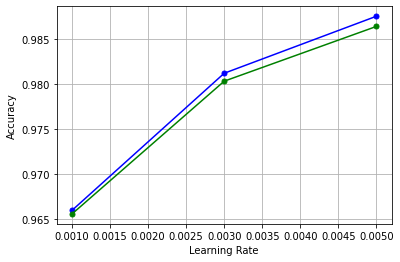

In [65]:
%%time

# Validation Curve CatBoost Classifier depth

# train_scores, valid_scores = validation_curve(
#     CAT, 
#     X_train, 
#     y_train, 
#     param_name="depth", 
#     param_range=[4, 7, 10], 
#     scoring='accuracy', 
#     cv=5
# )

# param_range=[4, 7, 10]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)

# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('Parameter depth')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()


# Validation Curve CatBoost Classifier max_leaves

# train_scores, valid_scores = validation_curve(
#     CAT, 
#     X_train, 
#     y_train, 
#     param_name="max_leaves", 
#     param_range=[10, 20, 30], 
#     scoring='accuracy', 
#     cv=5
# )

# param_range=[10, 20, 30]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)

# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('Parameter depth')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()


# Validation Curve CatBoost Classifier Learning Rate

# train_scores, valid_scores = validation_curve(
#     CAT, 
#     X_train, 
#     y_train, 
#     param_name="learning_rate", 
#     param_range=[0.001,0.003,0.005], 
#     scoring='accuracy', 
#     cv=5
# )
# param_range=[0.001,0.003,0.005]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)
# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('Learning Rate')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()


In [26]:
%%time

# Random Forest

RF = RandomForestClassifier(random_state=0, max_depth=4, verbose=3)
# RF.fit(X_train,y_train)
# RF_pred = RF.predict(X_test)
# print('Random Forest: \n')
# print(classification_report(y_test, RF_pred, target_names=['Benign', 'Malware']))
# print(accuracy_score(y_test,RF_pred)*100, "%")

scores_RF = cross_val_score(RF, X, y, cv=5)
scores_RF.mean()

# seed = None
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# results = model_selection.cross_val_score(RF, X_train, y_train, cv=kfold)
# print('Random Forest: \n',results.mean()*100, "%")

RF.get_params(deep=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 3,
 'warm_start': False}

In [27]:
scores_RF.mean()

0.9431993156544054

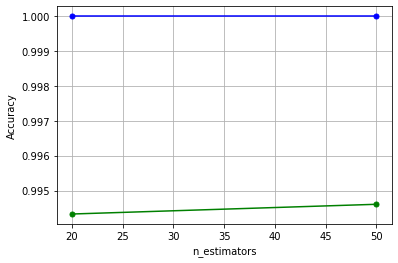

Wall time: 80.1 ms


In [71]:
%%time

# Validation Curve Random Forest Classifier n_estimators

# train_scores, valid_scores = validation_curve(
#     RF, 
#     X_train, 
#     y_train, 
#     param_name="criterion", 
#     param_range=['gini','entropy'], 
#     scoring='accuracy', 
#     cv=5
# )
# param_range=[20, 50]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)
# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('n_estimators')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()

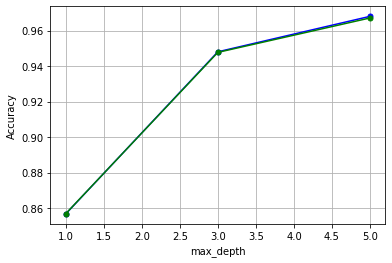

Wall time: 6min 18s


In [25]:
%%time

# # Validation Curve Random Forest Classifier max_depth

# train_scores, valid_scores = validation_curve(
#     RF, 
#     X_train, 
#     y_train, 
#     param_name="max_depth", 
#     param_range=[1, 3, 5], 
#     scoring='accuracy', 
#     cv=5
# )
# param_range=[1, 3, 5]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)
# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('max_depth')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()

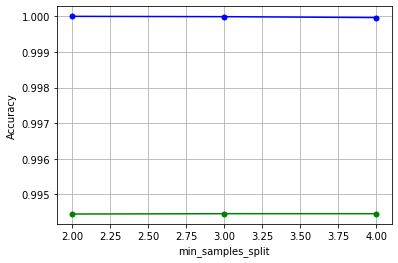

Wall time: 38min 21s


In [27]:
%%time

# # Validation Curve Random Forest Classifier min_samples_split

# train_scores, valid_scores = validation_curve(
#     RF, 
#     X_train, 
#     y_train, 
#     param_name="min_samples_split", 
#     param_range=[2, 3, 4], 
#     scoring='accuracy', 
#     cv=5
# )
# param_range=[2, 3, 4]
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# valid_scores_mean = np.mean(valid_scores, axis=1)
# valid_scores_std = np.std(valid_scores, axis=1)
# plt.plot(param_range, train_scores_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(param_range, valid_scores_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('min_samples_split')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()

In [30]:
# %%time

# # Hybrid Machine Learning Using Stacking Classifier

# from mlxtend.classifier import StackingCVClassifier
# # from sklearn.linear_model import LogisticRegression
# # LR = LogisticRegression()
# sclf = StackingCVClassifier(classifiers=[RandomForestClassifier(n_estimators = 110), LGBMClassifier()], meta_classifier=GradientBoostingClassifier(random_state=0))

# for clf, label in zip([RandomForestClassifier(n_estimators = 110), LGBMClassifier(), sclf], ['Random Forest','LightGBM Classifier','Stacking Classifier']):
#   scores = model_selection.cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
#   print("Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), label))

# sclf.fit(X_train, y_train)
# sclf_preds = sclf.predict(X_test)

In [28]:
%%time

# Hybrid Machine Learning Using Stacking Classifier


# from sklearn.linear_model import LogisticRegression
# LR = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[AdaBoostClassifier(random_state=0, n_estimators=10), LGBMClassifier(random_state=0, num_leaves=5, n_estimators=40, objective='binary'), RandomForestClassifier(random_state=0, max_depth=4)], meta_classifier=CatBoostClassifier(random_state=0, objective='Logloss', depth=2, learning_rate=0.0005))

# for clf, label in zip([RandomForestClassifier(n_estimators = 110), LGBMClassifier(), sclf], ['Random Forest','LightGBM Classifier','Stacking Classifier']):
#   scores = model_selection.cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
#   print("Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), label))

sclf.fit(X_train, y_train)
sclf_preds = sclf.predict(X_test)

0:	learn: 0.6922676	total: 8.62ms	remaining: 8.61s
1:	learn: 0.6913893	total: 17.9ms	remaining: 8.91s
2:	learn: 0.6905123	total: 26.5ms	remaining: 8.8s
3:	learn: 0.6896367	total: 35.6ms	remaining: 8.86s
4:	learn: 0.6887913	total: 44.6ms	remaining: 8.87s
5:	learn: 0.6879183	total: 53.1ms	remaining: 8.79s
6:	learn: 0.6870754	total: 63.8ms	remaining: 9.05s
7:	learn: 0.6862338	total: 73.4ms	remaining: 9.1s
8:	learn: 0.6853647	total: 82ms	remaining: 9.03s
9:	learn: 0.6845573	total: 90.4ms	remaining: 8.95s
10:	learn: 0.6836907	total: 99.4ms	remaining: 8.94s
11:	learn: 0.6828254	total: 108ms	remaining: 8.93s
12:	learn: 0.6819614	total: 117ms	remaining: 8.91s
13:	learn: 0.6810987	total: 127ms	remaining: 8.96s
14:	learn: 0.6802373	total: 136ms	remaining: 8.95s
15:	learn: 0.6793772	total: 146ms	remaining: 8.95s
16:	learn: 0.6785184	total: 155ms	remaining: 8.96s
17:	learn: 0.6776610	total: 165ms	remaining: 9s
18:	learn: 0.6768048	total: 175ms	remaining: 9.01s
19:	learn: 0.6759499	total: 183ms	rem

172:	learn: 0.5610101	total: 1.71s	remaining: 8.2s
173:	learn: 0.5603354	total: 1.72s	remaining: 8.19s
174:	learn: 0.5597115	total: 1.74s	remaining: 8.18s
175:	learn: 0.5590385	total: 1.75s	remaining: 8.17s
176:	learn: 0.5583666	total: 1.75s	remaining: 8.16s
177:	learn: 0.5576961	total: 1.76s	remaining: 8.14s
178:	learn: 0.5570762	total: 1.77s	remaining: 8.13s
179:	learn: 0.5564070	total: 1.78s	remaining: 8.12s
180:	learn: 0.5557396	total: 1.79s	remaining: 8.1s
181:	learn: 0.5550961	total: 1.8s	remaining: 8.09s
182:	learn: 0.5544300	total: 1.81s	remaining: 8.08s
183:	learn: 0.5537652	total: 1.82s	remaining: 8.07s
184:	learn: 0.5531247	total: 1.83s	remaining: 8.06s
185:	learn: 0.5524620	total: 1.84s	remaining: 8.04s
186:	learn: 0.5518235	total: 1.85s	remaining: 8.03s
187:	learn: 0.5511633	total: 1.86s	remaining: 8.02s
188:	learn: 0.5505035	total: 1.86s	remaining: 8.01s
189:	learn: 0.5498454	total: 1.87s	remaining: 7.99s
190:	learn: 0.5491877	total: 1.88s	remaining: 7.98s
191:	learn: 0.5

333:	learn: 0.4662192	total: 3.25s	remaining: 6.48s
334:	learn: 0.4656954	total: 3.26s	remaining: 6.47s
335:	learn: 0.4651725	total: 3.27s	remaining: 6.47s
336:	learn: 0.4646923	total: 3.28s	remaining: 6.46s
337:	learn: 0.4641710	total: 3.29s	remaining: 6.45s
338:	learn: 0.4636505	total: 3.3s	remaining: 6.44s
339:	learn: 0.4631309	total: 3.31s	remaining: 6.43s
340:	learn: 0.4626121	total: 3.32s	remaining: 6.42s
341:	learn: 0.4620941	total: 3.33s	remaining: 6.41s
342:	learn: 0.4615770	total: 3.34s	remaining: 6.4s
343:	learn: 0.4610799	total: 3.35s	remaining: 6.39s
344:	learn: 0.4605645	total: 3.36s	remaining: 6.38s
345:	learn: 0.4600498	total: 3.37s	remaining: 6.36s
346:	learn: 0.4595360	total: 3.38s	remaining: 6.35s
347:	learn: 0.4590231	total: 3.38s	remaining: 6.34s
348:	learn: 0.4585300	total: 3.39s	remaining: 6.33s
349:	learn: 0.4580598	total: 3.4s	remaining: 6.32s
350:	learn: 0.4575492	total: 3.41s	remaining: 6.31s
351:	learn: 0.4570584	total: 3.42s	remaining: 6.3s
352:	learn: 0.45

495:	learn: 0.3925015	total: 4.79s	remaining: 4.87s
496:	learn: 0.3920974	total: 4.8s	remaining: 4.86s
497:	learn: 0.3916940	total: 4.81s	remaining: 4.85s
498:	learn: 0.3912912	total: 4.82s	remaining: 4.84s
499:	learn: 0.3908890	total: 4.83s	remaining: 4.83s
500:	learn: 0.3904875	total: 4.84s	remaining: 4.82s
501:	learn: 0.3900867	total: 4.85s	remaining: 4.81s
502:	learn: 0.3896865	total: 4.86s	remaining: 4.8s
503:	learn: 0.3893026	total: 4.87s	remaining: 4.79s
504:	learn: 0.3889038	total: 4.87s	remaining: 4.78s
505:	learn: 0.3885056	total: 4.88s	remaining: 4.77s
506:	learn: 0.3881080	total: 4.89s	remaining: 4.76s
507:	learn: 0.3877110	total: 4.9s	remaining: 4.75s
508:	learn: 0.3873302	total: 4.91s	remaining: 4.74s
509:	learn: 0.3869345	total: 4.92s	remaining: 4.73s
510:	learn: 0.3865394	total: 4.93s	remaining: 4.72s
511:	learn: 0.3861450	total: 4.94s	remaining: 4.71s
512:	learn: 0.3857513	total: 4.95s	remaining: 4.7s
513:	learn: 0.3853582	total: 4.96s	remaining: 4.69s
514:	learn: 0.38

655:	learn: 0.3363260	total: 6.28s	remaining: 3.29s
656:	learn: 0.3360261	total: 6.29s	remaining: 3.29s
657:	learn: 0.3357138	total: 6.3s	remaining: 3.27s
658:	learn: 0.3354148	total: 6.31s	remaining: 3.27s
659:	learn: 0.3351035	total: 6.32s	remaining: 3.26s
660:	learn: 0.3347928	total: 6.33s	remaining: 3.25s
661:	learn: 0.3345107	total: 6.34s	remaining: 3.24s
662:	learn: 0.3342009	total: 6.35s	remaining: 3.23s
663:	learn: 0.3338916	total: 6.36s	remaining: 3.22s
664:	learn: 0.3335828	total: 6.37s	remaining: 3.21s
665:	learn: 0.3332872	total: 6.38s	remaining: 3.2s
666:	learn: 0.3329793	total: 6.38s	remaining: 3.19s
667:	learn: 0.3326719	total: 6.39s	remaining: 3.18s
668:	learn: 0.3323650	total: 6.4s	remaining: 3.17s
669:	learn: 0.3320586	total: 6.41s	remaining: 3.16s
670:	learn: 0.3317654	total: 6.42s	remaining: 3.15s
671:	learn: 0.3314600	total: 6.43s	remaining: 3.14s
672:	learn: 0.3311550	total: 6.44s	remaining: 3.13s
673:	learn: 0.3308632	total: 6.45s	remaining: 3.12s
674:	learn: 0.3

821:	learn: 0.2914013	total: 7.83s	remaining: 1.7s
822:	learn: 0.2911713	total: 7.84s	remaining: 1.69s
823:	learn: 0.2909417	total: 7.85s	remaining: 1.68s
824:	learn: 0.2907021	total: 7.86s	remaining: 1.67s
825:	learn: 0.2904732	total: 7.87s	remaining: 1.66s
826:	learn: 0.2902344	total: 7.88s	remaining: 1.65s
827:	learn: 0.2899959	total: 7.89s	remaining: 1.64s
828:	learn: 0.2897578	total: 7.9s	remaining: 1.63s
829:	learn: 0.2895202	total: 7.91s	remaining: 1.62s
830:	learn: 0.2892931	total: 7.92s	remaining: 1.61s
831:	learn: 0.2890561	total: 7.92s	remaining: 1.6s
832:	learn: 0.2888195	total: 7.93s	remaining: 1.59s
833:	learn: 0.2885935	total: 7.95s	remaining: 1.58s
834:	learn: 0.2883577	total: 7.95s	remaining: 1.57s
835:	learn: 0.2881222	total: 7.96s	remaining: 1.56s
836:	learn: 0.2879101	total: 7.97s	remaining: 1.55s
837:	learn: 0.2876753	total: 7.98s	remaining: 1.54s
838:	learn: 0.2874409	total: 7.99s	remaining: 1.53s
839:	learn: 0.2872069	total: 8s	remaining: 1.52s
840:	learn: 0.2869

986:	learn: 0.2570061	total: 9.34s	remaining: 123ms
987:	learn: 0.2568288	total: 9.35s	remaining: 114ms
988:	learn: 0.2566434	total: 9.36s	remaining: 104ms
989:	learn: 0.2564583	total: 9.37s	remaining: 94.6ms
990:	learn: 0.2562817	total: 9.38s	remaining: 85.2ms
991:	learn: 0.2560972	total: 9.39s	remaining: 75.7ms
992:	learn: 0.2559129	total: 9.4s	remaining: 66.2ms
993:	learn: 0.2557372	total: 9.4s	remaining: 56.8ms
994:	learn: 0.2555535	total: 9.41s	remaining: 47.3ms
995:	learn: 0.2553701	total: 9.42s	remaining: 37.8ms
996:	learn: 0.2551870	total: 9.43s	remaining: 28.4ms
997:	learn: 0.2550124	total: 9.44s	remaining: 18.9ms
998:	learn: 0.2548381	total: 9.45s	remaining: 9.46ms
999:	learn: 0.2546558	total: 9.46s	remaining: 0us
Wall time: 2min 32s


In [29]:
sclf_preds_train = sclf.predict(X_train)
sclf_preds_test = sclf.predict(X_test)

print('train:',accuracy_score(y_train,sclf_preds_train)*100, "%")
print('test:', accuracy_score(y_test,sclf_preds_test)*100, "%")

train: 96.72425335664076 %
test: 96.7419198869342 %


In [30]:
scores_sclf = cross_val_score(sclf, X, y, cv=5)
scores_sclf.mean()

0:	learn: 0.6921710	total: 9.36ms	remaining: 9.35s
1:	learn: 0.6911899	total: 18.5ms	remaining: 9.22s
2:	learn: 0.6902168	total: 27.4ms	remaining: 9.12s
3:	learn: 0.6892388	total: 37.3ms	remaining: 9.28s
4:	learn: 0.6882687	total: 46.9ms	remaining: 9.33s
5:	learn: 0.6872938	total: 56.4ms	remaining: 9.34s
6:	learn: 0.6863268	total: 66.1ms	remaining: 9.37s
7:	learn: 0.6853550	total: 75.8ms	remaining: 9.39s
8:	learn: 0.6843847	total: 84.6ms	remaining: 9.32s
9:	learn: 0.6834601	total: 93.5ms	remaining: 9.26s
10:	learn: 0.6824991	total: 103ms	remaining: 9.29s
11:	learn: 0.6815397	total: 113ms	remaining: 9.31s
12:	learn: 0.6805755	total: 123ms	remaining: 9.3s
13:	learn: 0.6796128	total: 131ms	remaining: 9.26s
14:	learn: 0.6786579	total: 141ms	remaining: 9.23s
15:	learn: 0.6777046	total: 151ms	remaining: 9.26s
16:	learn: 0.6767465	total: 162ms	remaining: 9.39s
17:	learn: 0.6757962	total: 172ms	remaining: 9.38s
18:	learn: 0.6748474	total: 182ms	remaining: 9.39s
19:	learn: 0.6738938	total: 192m

169:	learn: 0.5480181	total: 1.73s	remaining: 8.46s
170:	learn: 0.5472710	total: 1.74s	remaining: 8.45s
171:	learn: 0.5465308	total: 1.75s	remaining: 8.44s
172:	learn: 0.5457862	total: 1.76s	remaining: 8.43s
173:	learn: 0.5450797	total: 1.77s	remaining: 8.42s
174:	learn: 0.5443375	total: 1.78s	remaining: 8.4s
175:	learn: 0.5435965	total: 1.79s	remaining: 8.39s
176:	learn: 0.5428568	total: 1.8s	remaining: 8.38s
177:	learn: 0.5421239	total: 1.81s	remaining: 8.37s
178:	learn: 0.5413866	total: 1.82s	remaining: 8.35s
179:	learn: 0.5406872	total: 1.83s	remaining: 8.34s
180:	learn: 0.5399523	total: 1.84s	remaining: 8.32s
181:	learn: 0.5392187	total: 1.85s	remaining: 8.31s
182:	learn: 0.5384862	total: 1.86s	remaining: 8.29s
183:	learn: 0.5377550	total: 1.87s	remaining: 8.28s
184:	learn: 0.5370250	total: 1.88s	remaining: 8.27s
185:	learn: 0.5362962	total: 1.89s	remaining: 8.25s
186:	learn: 0.5355686	total: 1.89s	remaining: 8.23s
187:	learn: 0.5348423	total: 1.9s	remaining: 8.22s
188:	learn: 0.5

347:	learn: 0.4339816	total: 3.44s	remaining: 6.44s
348:	learn: 0.4334332	total: 3.45s	remaining: 6.43s
349:	learn: 0.4328798	total: 3.46s	remaining: 6.42s
350:	learn: 0.4323324	total: 3.47s	remaining: 6.41s
351:	learn: 0.4317859	total: 3.48s	remaining: 6.4s
352:	learn: 0.4312353	total: 3.48s	remaining: 6.39s
353:	learn: 0.4306857	total: 3.49s	remaining: 6.38s
354:	learn: 0.4301369	total: 3.5s	remaining: 6.36s
355:	learn: 0.4295892	total: 3.51s	remaining: 6.35s
356:	learn: 0.4290721	total: 3.52s	remaining: 6.34s
357:	learn: 0.4285262	total: 3.53s	remaining: 6.33s
358:	learn: 0.4279812	total: 3.54s	remaining: 6.32s
359:	learn: 0.4274418	total: 3.55s	remaining: 6.3s
360:	learn: 0.4269033	total: 3.56s	remaining: 6.29s
361:	learn: 0.4263610	total: 3.56s	remaining: 6.28s
362:	learn: 0.4258493	total: 3.57s	remaining: 6.27s
363:	learn: 0.4253089	total: 3.58s	remaining: 6.26s
364:	learn: 0.4247694	total: 3.59s	remaining: 6.25s
365:	learn: 0.4242355	total: 3.6s	remaining: 6.24s
366:	learn: 0.42

512:	learn: 0.3550324	total: 5.03s	remaining: 4.78s
513:	learn: 0.3546139	total: 5.04s	remaining: 4.77s
514:	learn: 0.3541960	total: 5.05s	remaining: 4.76s
515:	learn: 0.3537830	total: 5.06s	remaining: 4.75s
516:	learn: 0.3533666	total: 5.07s	remaining: 4.74s
517:	learn: 0.3529509	total: 5.08s	remaining: 4.73s
518:	learn: 0.3525359	total: 5.09s	remaining: 4.72s
519:	learn: 0.3521216	total: 5.1s	remaining: 4.71s
520:	learn: 0.3517080	total: 5.11s	remaining: 4.7s
521:	learn: 0.3512952	total: 5.12s	remaining: 4.69s
522:	learn: 0.3508830	total: 5.13s	remaining: 4.68s
523:	learn: 0.3504716	total: 5.14s	remaining: 4.67s
524:	learn: 0.3500609	total: 5.16s	remaining: 4.66s
525:	learn: 0.3496509	total: 5.17s	remaining: 4.66s
526:	learn: 0.3492456	total: 5.18s	remaining: 4.65s
527:	learn: 0.3488614	total: 5.19s	remaining: 4.64s
528:	learn: 0.3484535	total: 5.2s	remaining: 4.63s
529:	learn: 0.3480503	total: 5.21s	remaining: 4.62s
530:	learn: 0.3476478	total: 5.22s	remaining: 4.61s
531:	learn: 0.3

673:	learn: 0.2965848	total: 6.6s	remaining: 3.19s
674:	learn: 0.2962668	total: 6.61s	remaining: 3.18s
675:	learn: 0.2959529	total: 6.62s	remaining: 3.17s
676:	learn: 0.2956564	total: 6.63s	remaining: 3.16s
677:	learn: 0.2953604	total: 6.64s	remaining: 3.15s
678:	learn: 0.2950445	total: 6.64s	remaining: 3.14s
679:	learn: 0.2947292	total: 6.65s	remaining: 3.13s
680:	learn: 0.2944144	total: 6.66s	remaining: 3.12s
681:	learn: 0.2941036	total: 6.67s	remaining: 3.11s
682:	learn: 0.2937935	total: 6.68s	remaining: 3.1s
683:	learn: 0.2934803	total: 6.69s	remaining: 3.09s
684:	learn: 0.2931677	total: 6.7s	remaining: 3.08s
685:	learn: 0.2928556	total: 6.71s	remaining: 3.07s
686:	learn: 0.2925477	total: 6.72s	remaining: 3.06s
687:	learn: 0.2922367	total: 6.73s	remaining: 3.05s
688:	learn: 0.2919262	total: 6.74s	remaining: 3.04s
689:	learn: 0.2916162	total: 6.75s	remaining: 3.03s
690:	learn: 0.2913067	total: 6.76s	remaining: 3.02s
691:	learn: 0.2909978	total: 6.76s	remaining: 3.01s
692:	learn: 0.2

849:	learn: 0.2486116	total: 8.29s	remaining: 1.46s
850:	learn: 0.2483754	total: 8.3s	remaining: 1.45s
851:	learn: 0.2481395	total: 8.31s	remaining: 1.44s
852:	learn: 0.2479041	total: 8.32s	remaining: 1.43s
853:	learn: 0.2476690	total: 8.33s	remaining: 1.42s
854:	learn: 0.2474508	total: 8.34s	remaining: 1.41s
855:	learn: 0.2472165	total: 8.34s	remaining: 1.4s
856:	learn: 0.2469826	total: 8.35s	remaining: 1.39s
857:	learn: 0.2467491	total: 8.36s	remaining: 1.38s
858:	learn: 0.2465190	total: 8.37s	remaining: 1.37s
859:	learn: 0.2463026	total: 8.38s	remaining: 1.36s
860:	learn: 0.2460732	total: 8.39s	remaining: 1.35s
861:	learn: 0.2458413	total: 8.4s	remaining: 1.34s
862:	learn: 0.2456097	total: 8.41s	remaining: 1.33s
863:	learn: 0.2453948	total: 8.42s	remaining: 1.32s
864:	learn: 0.2451640	total: 8.43s	remaining: 1.31s
865:	learn: 0.2449365	total: 8.44s	remaining: 1.3s
866:	learn: 0.2447065	total: 8.45s	remaining: 1.29s
867:	learn: 0.2444930	total: 8.45s	remaining: 1.28s
868:	learn: 0.24

21:	learn: 0.6748313	total: 199ms	remaining: 8.87s
22:	learn: 0.6740643	total: 210ms	remaining: 8.9s
23:	learn: 0.6732540	total: 220ms	remaining: 8.93s
24:	learn: 0.6724375	total: 230ms	remaining: 8.95s
25:	learn: 0.6716296	total: 239ms	remaining: 8.96s
26:	learn: 0.6708155	total: 251ms	remaining: 9.03s
27:	learn: 0.6700027	total: 259ms	remaining: 9.01s
28:	learn: 0.6691984	total: 269ms	remaining: 9s
29:	learn: 0.6683880	total: 278ms	remaining: 8.98s
30:	learn: 0.6675788	total: 287ms	remaining: 8.97s
31:	learn: 0.6667708	total: 296ms	remaining: 8.94s
32:	learn: 0.6659640	total: 304ms	remaining: 8.91s
33:	learn: 0.6651584	total: 314ms	remaining: 8.91s
34:	learn: 0.6643612	total: 323ms	remaining: 8.89s
35:	learn: 0.6635652	total: 332ms	remaining: 8.89s
36:	learn: 0.6627632	total: 341ms	remaining: 8.87s
37:	learn: 0.6619696	total: 351ms	remaining: 8.88s
38:	learn: 0.6611699	total: 359ms	remaining: 8.85s
39:	learn: 0.6603715	total: 368ms	remaining: 8.82s
40:	learn: 0.6595743	total: 377ms	r

183:	learn: 0.5577477	total: 1.74s	remaining: 7.71s
184:	learn: 0.5571068	total: 1.75s	remaining: 7.7s
185:	learn: 0.5564722	total: 1.76s	remaining: 7.69s
186:	learn: 0.5558330	total: 1.77s	remaining: 7.68s
187:	learn: 0.5552381	total: 1.78s	remaining: 7.67s
188:	learn: 0.5546008	total: 1.79s	remaining: 7.67s
189:	learn: 0.5539701	total: 1.8s	remaining: 7.66s
190:	learn: 0.5533347	total: 1.8s	remaining: 7.64s
191:	learn: 0.5527004	total: 1.81s	remaining: 7.63s
192:	learn: 0.5520670	total: 1.82s	remaining: 7.62s
193:	learn: 0.5514346	total: 1.83s	remaining: 7.61s
194:	learn: 0.5508032	total: 1.84s	remaining: 7.6s
195:	learn: 0.5501783	total: 1.85s	remaining: 7.59s
196:	learn: 0.5495488	total: 1.86s	remaining: 7.57s
197:	learn: 0.5489258	total: 1.87s	remaining: 7.56s
198:	learn: 0.5482983	total: 1.88s	remaining: 7.55s
199:	learn: 0.5476772	total: 1.89s	remaining: 7.54s
200:	learn: 0.5470571	total: 1.89s	remaining: 7.53s
201:	learn: 0.5464325	total: 1.9s	remaining: 7.52s
202:	learn: 0.545

345:	learn: 0.4664110	total: 3.29s	remaining: 6.22s
346:	learn: 0.4659168	total: 3.3s	remaining: 6.21s
347:	learn: 0.4654189	total: 3.31s	remaining: 6.2s
348:	learn: 0.4649218	total: 3.32s	remaining: 6.2s
349:	learn: 0.4644255	total: 3.33s	remaining: 6.19s
350:	learn: 0.4639345	total: 3.34s	remaining: 6.18s
351:	learn: 0.4634397	total: 3.35s	remaining: 6.17s
352:	learn: 0.4629457	total: 3.36s	remaining: 6.16s
353:	learn: 0.4624525	total: 3.37s	remaining: 6.15s
354:	learn: 0.4619601	total: 3.38s	remaining: 6.14s
355:	learn: 0.4614729	total: 3.39s	remaining: 6.13s
356:	learn: 0.4609820	total: 3.4s	remaining: 6.12s
357:	learn: 0.4604919	total: 3.41s	remaining: 6.11s
358:	learn: 0.4600025	total: 3.42s	remaining: 6.1s
359:	learn: 0.4595140	total: 3.43s	remaining: 6.09s
360:	learn: 0.4590262	total: 3.44s	remaining: 6.08s
361:	learn: 0.4585435	total: 3.45s	remaining: 6.07s
362:	learn: 0.4580573	total: 3.46s	remaining: 6.06s
363:	learn: 0.4575718	total: 3.46s	remaining: 6.05s
364:	learn: 0.457

509:	learn: 0.3946433	total: 4.84s	remaining: 4.65s
510:	learn: 0.3942581	total: 4.85s	remaining: 4.64s
511:	learn: 0.3938770	total: 4.86s	remaining: 4.63s
512:	learn: 0.3934930	total: 4.87s	remaining: 4.62s
513:	learn: 0.3931132	total: 4.88s	remaining: 4.61s
514:	learn: 0.3927305	total: 4.89s	remaining: 4.6s
515:	learn: 0.3923483	total: 4.9s	remaining: 4.6s
516:	learn: 0.3919667	total: 4.91s	remaining: 4.59s
517:	learn: 0.3915857	total: 4.92s	remaining: 4.58s
518:	learn: 0.3912088	total: 4.93s	remaining: 4.57s
519:	learn: 0.3908291	total: 4.93s	remaining: 4.56s
520:	learn: 0.3904795	total: 4.94s	remaining: 4.55s
521:	learn: 0.3901009	total: 4.95s	remaining: 4.54s
522:	learn: 0.3897229	total: 4.96s	remaining: 4.53s
523:	learn: 0.3893455	total: 4.97s	remaining: 4.52s
524:	learn: 0.3889687	total: 4.98s	remaining: 4.51s
525:	learn: 0.3885924	total: 4.99s	remaining: 4.5s
526:	learn: 0.3882168	total: 5s	remaining: 4.49s
527:	learn: 0.3878452	total: 5.01s	remaining: 4.48s
528:	learn: 0.38747

673:	learn: 0.3392793	total: 6.4s	remaining: 3.09s
674:	learn: 0.3389843	total: 6.41s	remaining: 3.08s
675:	learn: 0.3386872	total: 6.42s	remaining: 3.08s
676:	learn: 0.3383931	total: 6.43s	remaining: 3.07s
677:	learn: 0.3380969	total: 6.44s	remaining: 3.06s
678:	learn: 0.3378012	total: 6.45s	remaining: 3.05s
679:	learn: 0.3375059	total: 6.46s	remaining: 3.04s
680:	learn: 0.3372111	total: 6.46s	remaining: 3.03s
681:	learn: 0.3369168	total: 6.47s	remaining: 3.02s
682:	learn: 0.3366230	total: 6.48s	remaining: 3.01s
683:	learn: 0.3363296	total: 6.49s	remaining: 3s
684:	learn: 0.3360611	total: 6.5s	remaining: 2.99s
685:	learn: 0.3357711	total: 6.51s	remaining: 2.98s
686:	learn: 0.3354815	total: 6.52s	remaining: 2.97s
687:	learn: 0.3351924	total: 6.53s	remaining: 2.96s
688:	learn: 0.3349013	total: 6.54s	remaining: 2.95s
689:	learn: 0.3346106	total: 6.54s	remaining: 2.94s
690:	learn: 0.3343203	total: 6.55s	remaining: 2.93s
691:	learn: 0.3340305	total: 6.56s	remaining: 2.92s
692:	learn: 0.333

838:	learn: 0.2962191	total: 7.95s	remaining: 1.52s
839:	learn: 0.2959891	total: 7.96s	remaining: 1.52s
840:	learn: 0.2957594	total: 7.97s	remaining: 1.51s
841:	learn: 0.2955319	total: 7.98s	remaining: 1.5s
842:	learn: 0.2953047	total: 7.99s	remaining: 1.49s
843:	learn: 0.2950778	total: 8s	remaining: 1.48s
844:	learn: 0.2948514	total: 8.01s	remaining: 1.47s
845:	learn: 0.2946234	total: 8.02s	remaining: 1.46s
846:	learn: 0.2943977	total: 8.02s	remaining: 1.45s
847:	learn: 0.2941722	total: 8.03s	remaining: 1.44s
848:	learn: 0.2939454	total: 8.04s	remaining: 1.43s
849:	learn: 0.2937189	total: 8.05s	remaining: 1.42s
850:	learn: 0.2934945	total: 8.06s	remaining: 1.41s
851:	learn: 0.2932705	total: 8.07s	remaining: 1.4s
852:	learn: 0.2930468	total: 8.08s	remaining: 1.39s
853:	learn: 0.2928217	total: 8.09s	remaining: 1.38s
854:	learn: 0.2925969	total: 8.1s	remaining: 1.37s
855:	learn: 0.2923743	total: 8.11s	remaining: 1.36s
856:	learn: 0.2921502	total: 8.12s	remaining: 1.35s
857:	learn: 0.2919

999:	learn: 0.2635685	total: 9.44s	remaining: 0us
0:	learn: 0.6922290	total: 9.3ms	remaining: 9.29s
1:	learn: 0.6913122	total: 19.4ms	remaining: 9.66s
2:	learn: 0.6904362	total: 28.3ms	remaining: 9.4s
3:	learn: 0.6895950	total: 37ms	remaining: 9.21s
4:	learn: 0.6887216	total: 45.7ms	remaining: 9.1s
5:	learn: 0.6878103	total: 55.4ms	remaining: 9.18s
6:	learn: 0.6869729	total: 64.4ms	remaining: 9.14s
7:	learn: 0.6860642	total: 74ms	remaining: 9.17s
8:	learn: 0.6852298	total: 82.4ms	remaining: 9.07s
9:	learn: 0.6843238	total: 91.8ms	remaining: 9.09s
10:	learn: 0.6834192	total: 101ms	remaining: 9.04s
11:	learn: 0.6825161	total: 110ms	remaining: 9.04s
12:	learn: 0.6816143	total: 119ms	remaining: 9.05s
13:	learn: 0.6807529	total: 128ms	remaining: 9.01s
14:	learn: 0.6798927	total: 137ms	remaining: 8.96s
15:	learn: 0.6789958	total: 146ms	remaining: 8.98s
16:	learn: 0.6781002	total: 155ms	remaining: 8.96s
17:	learn: 0.6772053	total: 165ms	remaining: 8.99s
18:	learn: 0.6763505	total: 174ms	remai

161:	learn: 0.5637079	total: 1.54s	remaining: 7.99s
162:	learn: 0.5629945	total: 1.55s	remaining: 7.99s
163:	learn: 0.5622823	total: 1.56s	remaining: 7.98s
164:	learn: 0.5616035	total: 1.57s	remaining: 7.97s
165:	learn: 0.5608935	total: 1.58s	remaining: 7.96s
166:	learn: 0.5602168	total: 1.59s	remaining: 7.96s
167:	learn: 0.5595412	total: 1.6s	remaining: 7.94s
168:	learn: 0.5588351	total: 1.61s	remaining: 7.93s
169:	learn: 0.5581897	total: 1.62s	remaining: 7.92s
170:	learn: 0.5574858	total: 1.63s	remaining: 7.91s
171:	learn: 0.5568144	total: 1.64s	remaining: 7.9s
172:	learn: 0.5561441	total: 1.65s	remaining: 7.89s
173:	learn: 0.5554430	total: 1.66s	remaining: 7.88s
174:	learn: 0.5547430	total: 1.67s	remaining: 7.87s
175:	learn: 0.5540441	total: 1.68s	remaining: 7.85s
176:	learn: 0.5533464	total: 1.69s	remaining: 7.84s
177:	learn: 0.5526498	total: 1.7s	remaining: 7.83s
178:	learn: 0.5519544	total: 1.71s	remaining: 7.82s
179:	learn: 0.5512601	total: 1.72s	remaining: 7.81s
180:	learn: 0.5

321:	learn: 0.4649453	total: 3.1s	remaining: 6.52s
322:	learn: 0.4643938	total: 3.1s	remaining: 6.51s
323:	learn: 0.4638432	total: 3.12s	remaining: 6.5s
324:	learn: 0.4633434	total: 3.13s	remaining: 6.49s
325:	learn: 0.4628443	total: 3.13s	remaining: 6.48s
326:	learn: 0.4623459	total: 3.15s	remaining: 6.48s
327:	learn: 0.4618253	total: 3.16s	remaining: 6.47s
328:	learn: 0.4612790	total: 3.17s	remaining: 6.46s
329:	learn: 0.4607335	total: 3.17s	remaining: 6.45s
330:	learn: 0.4601890	total: 3.19s	remaining: 6.44s
331:	learn: 0.4596454	total: 3.19s	remaining: 6.43s
332:	learn: 0.4591288	total: 3.2s	remaining: 6.42s
333:	learn: 0.4585869	total: 3.21s	remaining: 6.41s
334:	learn: 0.4580459	total: 3.22s	remaining: 6.4s
335:	learn: 0.4575059	total: 3.23s	remaining: 6.39s
336:	learn: 0.4569667	total: 3.24s	remaining: 6.38s
337:	learn: 0.4564285	total: 3.25s	remaining: 6.37s
338:	learn: 0.4559401	total: 3.26s	remaining: 6.36s
339:	learn: 0.4554293	total: 3.27s	remaining: 6.35s
340:	learn: 0.454

485:	learn: 0.3875160	total: 4.66s	remaining: 4.92s
486:	learn: 0.3871151	total: 4.67s	remaining: 4.91s
487:	learn: 0.3867147	total: 4.67s	remaining: 4.91s
488:	learn: 0.3863343	total: 4.68s	remaining: 4.9s
489:	learn: 0.3859353	total: 4.7s	remaining: 4.89s
490:	learn: 0.3855155	total: 4.7s	remaining: 4.88s
491:	learn: 0.3851177	total: 4.71s	remaining: 4.87s
492:	learn: 0.3846993	total: 4.72s	remaining: 4.86s
493:	learn: 0.3843029	total: 4.73s	remaining: 4.84s
494:	learn: 0.3838862	total: 4.74s	remaining: 4.83s
495:	learn: 0.3834911	total: 4.75s	remaining: 4.82s
496:	learn: 0.3830966	total: 4.76s	remaining: 4.82s
497:	learn: 0.3826815	total: 4.77s	remaining: 4.81s
498:	learn: 0.3822884	total: 4.78s	remaining: 4.8s
499:	learn: 0.3818747	total: 4.79s	remaining: 4.79s
500:	learn: 0.3814617	total: 4.79s	remaining: 4.78s
501:	learn: 0.3810704	total: 4.8s	remaining: 4.77s
502:	learn: 0.3806587	total: 4.82s	remaining: 4.76s
503:	learn: 0.3802478	total: 4.82s	remaining: 4.75s
504:	learn: 0.379

645:	learn: 0.3293080	total: 6.18s	remaining: 3.38s
646:	learn: 0.3290001	total: 6.19s	remaining: 3.38s
647:	learn: 0.3286755	total: 6.2s	remaining: 3.37s
648:	learn: 0.3283515	total: 6.21s	remaining: 3.36s
649:	learn: 0.3280452	total: 6.22s	remaining: 3.35s
650:	learn: 0.3277223	total: 6.23s	remaining: 3.34s
651:	learn: 0.3274170	total: 6.24s	remaining: 3.33s
652:	learn: 0.3270950	total: 6.25s	remaining: 3.32s
653:	learn: 0.3267736	total: 6.26s	remaining: 3.31s
654:	learn: 0.3264699	total: 6.26s	remaining: 3.3s
655:	learn: 0.3261495	total: 6.27s	remaining: 3.29s
656:	learn: 0.3258298	total: 6.28s	remaining: 3.28s
657:	learn: 0.3255107	total: 6.29s	remaining: 3.27s
658:	learn: 0.3251921	total: 6.3s	remaining: 3.26s
659:	learn: 0.3249067	total: 6.31s	remaining: 3.25s
660:	learn: 0.3245891	total: 6.32s	remaining: 3.24s
661:	learn: 0.3242719	total: 6.33s	remaining: 3.23s
662:	learn: 0.3239553	total: 6.34s	remaining: 3.22s
663:	learn: 0.3236393	total: 6.35s	remaining: 3.21s
664:	learn: 0.3

808:	learn: 0.2836758	total: 7.72s	remaining: 1.82s
809:	learn: 0.2834402	total: 7.73s	remaining: 1.81s
810:	learn: 0.2831913	total: 7.74s	remaining: 1.8s
811:	learn: 0.2829564	total: 7.75s	remaining: 1.79s
812:	learn: 0.2827219	total: 7.76s	remaining: 1.78s
813:	learn: 0.2825011	total: 7.77s	remaining: 1.77s
814:	learn: 0.2822537	total: 7.78s	remaining: 1.76s
815:	learn: 0.2820067	total: 7.79s	remaining: 1.75s
816:	learn: 0.2817737	total: 7.79s	remaining: 1.75s
817:	learn: 0.2815275	total: 7.8s	remaining: 1.74s
818:	learn: 0.2812953	total: 7.81s	remaining: 1.73s
819:	learn: 0.2810634	total: 7.82s	remaining: 1.72s
820:	learn: 0.2808183	total: 7.83s	remaining: 1.71s
821:	learn: 0.2805872	total: 7.84s	remaining: 1.7s
822:	learn: 0.2803564	total: 7.85s	remaining: 1.69s
823:	learn: 0.2801126	total: 7.86s	remaining: 1.68s
824:	learn: 0.2798691	total: 7.87s	remaining: 1.67s
825:	learn: 0.2796260	total: 7.88s	remaining: 1.66s
826:	learn: 0.2793968	total: 7.89s	remaining: 1.65s
827:	learn: 0.2

970:	learn: 0.2490409	total: 9.23s	remaining: 276ms
971:	learn: 0.2488480	total: 9.24s	remaining: 266ms
972:	learn: 0.2486555	total: 9.25s	remaining: 257ms
973:	learn: 0.2484744	total: 9.26s	remaining: 247ms
974:	learn: 0.2482937	total: 9.27s	remaining: 238ms
975:	learn: 0.2481020	total: 9.28s	remaining: 228ms
976:	learn: 0.2479107	total: 9.29s	remaining: 219ms
977:	learn: 0.2477418	total: 9.3s	remaining: 209ms
978:	learn: 0.2475511	total: 9.31s	remaining: 200ms
979:	learn: 0.2473607	total: 9.32s	remaining: 190ms
980:	learn: 0.2471706	total: 9.33s	remaining: 181ms
981:	learn: 0.2469918	total: 9.34s	remaining: 171ms
982:	learn: 0.2468242	total: 9.34s	remaining: 162ms
983:	learn: 0.2466350	total: 9.35s	remaining: 152ms
984:	learn: 0.2464460	total: 9.36s	remaining: 143ms
985:	learn: 0.2462684	total: 9.37s	remaining: 133ms
986:	learn: 0.2460800	total: 9.38s	remaining: 124ms
987:	learn: 0.2458920	total: 9.39s	remaining: 114ms
988:	learn: 0.2457043	total: 9.4s	remaining: 105ms
989:	learn: 0.

149:	learn: 0.5802514	total: 1.34s	remaining: 7.58s
150:	learn: 0.5795776	total: 1.35s	remaining: 7.57s
151:	learn: 0.5789111	total: 1.35s	remaining: 7.57s
152:	learn: 0.5782389	total: 1.36s	remaining: 7.55s
153:	learn: 0.5775677	total: 1.37s	remaining: 7.55s
154:	learn: 0.5768976	total: 1.38s	remaining: 7.54s
155:	learn: 0.5762284	total: 1.39s	remaining: 7.53s
156:	learn: 0.5755672	total: 1.4s	remaining: 7.52s
157:	learn: 0.5749069	total: 1.41s	remaining: 7.51s
158:	learn: 0.5742889	total: 1.42s	remaining: 7.5s
159:	learn: 0.5736238	total: 1.43s	remaining: 7.49s
160:	learn: 0.5729665	total: 1.44s	remaining: 7.48s
161:	learn: 0.5723103	total: 1.45s	remaining: 7.48s
162:	learn: 0.5716550	total: 1.45s	remaining: 7.47s
163:	learn: 0.5710008	total: 1.46s	remaining: 7.46s
164:	learn: 0.5703410	total: 1.47s	remaining: 7.45s
165:	learn: 0.5696820	total: 1.48s	remaining: 7.44s
166:	learn: 0.5690241	total: 1.49s	remaining: 7.43s
167:	learn: 0.5683674	total: 1.5s	remaining: 7.42s
168:	learn: 0.5

318:	learn: 0.4807786	total: 2.85s	remaining: 6.08s
319:	learn: 0.4802656	total: 2.86s	remaining: 6.07s
320:	learn: 0.4797479	total: 2.87s	remaining: 6.06s
321:	learn: 0.4792365	total: 2.88s	remaining: 6.05s
322:	learn: 0.4787259	total: 2.88s	remaining: 6.04s
323:	learn: 0.4782163	total: 2.89s	remaining: 6.04s
324:	learn: 0.4777018	total: 2.9s	remaining: 6.03s
325:	learn: 0.4771882	total: 2.91s	remaining: 6.02s
326:	learn: 0.4766808	total: 2.92s	remaining: 6.01s
327:	learn: 0.4761742	total: 2.93s	remaining: 6s
328:	learn: 0.4756630	total: 2.94s	remaining: 6s
329:	learn: 0.4751525	total: 2.95s	remaining: 5.99s
330:	learn: 0.4746485	total: 2.96s	remaining: 5.98s
331:	learn: 0.4741397	total: 2.96s	remaining: 5.97s
332:	learn: 0.4736316	total: 2.97s	remaining: 5.96s
333:	learn: 0.4731299	total: 2.98s	remaining: 5.95s
334:	learn: 0.4726234	total: 2.99s	remaining: 5.94s
335:	learn: 0.4721232	total: 3s	remaining: 5.93s
336:	learn: 0.4716241	total: 3.01s	remaining: 5.92s
337:	learn: 0.4711258	

491:	learn: 0.4027448	total: 4.37s	remaining: 4.51s
492:	learn: 0.4023504	total: 4.38s	remaining: 4.5s
493:	learn: 0.4019567	total: 4.39s	remaining: 4.5s
494:	learn: 0.4015961	total: 4.4s	remaining: 4.49s
495:	learn: 0.4012035	total: 4.41s	remaining: 4.48s
496:	learn: 0.4008116	total: 4.41s	remaining: 4.47s
497:	learn: 0.4004247	total: 4.42s	remaining: 4.46s
498:	learn: 0.4000384	total: 4.43s	remaining: 4.45s
499:	learn: 0.3996527	total: 4.44s	remaining: 4.44s
500:	learn: 0.3992633	total: 4.45s	remaining: 4.43s
501:	learn: 0.3988744	total: 4.46s	remaining: 4.42s
502:	learn: 0.3984862	total: 4.47s	remaining: 4.41s
503:	learn: 0.3981029	total: 4.47s	remaining: 4.4s
504:	learn: 0.3977160	total: 4.48s	remaining: 4.39s
505:	learn: 0.3973340	total: 4.49s	remaining: 4.39s
506:	learn: 0.3969482	total: 4.5s	remaining: 4.38s
507:	learn: 0.3965674	total: 4.51s	remaining: 4.37s
508:	learn: 0.3961830	total: 4.52s	remaining: 4.36s
509:	learn: 0.3957991	total: 4.53s	remaining: 4.35s
510:	learn: 0.395

661:	learn: 0.3443707	total: 5.87s	remaining: 2.99s
662:	learn: 0.3440692	total: 5.87s	remaining: 2.99s
663:	learn: 0.3437719	total: 5.88s	remaining: 2.98s
664:	learn: 0.3434714	total: 5.89s	remaining: 2.97s
665:	learn: 0.3431713	total: 5.9s	remaining: 2.96s
666:	learn: 0.3428755	total: 5.91s	remaining: 2.95s
667:	learn: 0.3425763	total: 5.92s	remaining: 2.94s
668:	learn: 0.3422777	total: 5.92s	remaining: 2.93s
669:	learn: 0.3420061	total: 5.93s	remaining: 2.92s
670:	learn: 0.3417084	total: 5.94s	remaining: 2.91s
671:	learn: 0.3414111	total: 5.95s	remaining: 2.9s
672:	learn: 0.3411144	total: 5.96s	remaining: 2.9s
673:	learn: 0.3408181	total: 5.97s	remaining: 2.89s
674:	learn: 0.3405222	total: 5.98s	remaining: 2.88s
675:	learn: 0.3402269	total: 5.99s	remaining: 2.87s
676:	learn: 0.3399356	total: 5.99s	remaining: 2.86s
677:	learn: 0.3396412	total: 6s	remaining: 2.85s
678:	learn: 0.3393472	total: 6.01s	remaining: 2.84s
679:	learn: 0.3390537	total: 6.02s	remaining: 2.83s
680:	learn: 0.3387

833:	learn: 0.2992022	total: 7.37s	remaining: 1.47s
834:	learn: 0.2989721	total: 7.38s	remaining: 1.46s
835:	learn: 0.2987423	total: 7.39s	remaining: 1.45s
836:	learn: 0.2985128	total: 7.4s	remaining: 1.44s
837:	learn: 0.2982838	total: 7.41s	remaining: 1.43s
838:	learn: 0.2980551	total: 7.42s	remaining: 1.42s
839:	learn: 0.2978267	total: 7.42s	remaining: 1.41s
840:	learn: 0.2975988	total: 7.43s	remaining: 1.41s
841:	learn: 0.2973711	total: 7.44s	remaining: 1.4s
842:	learn: 0.2971439	total: 7.45s	remaining: 1.39s
843:	learn: 0.2969197	total: 7.46s	remaining: 1.38s
844:	learn: 0.2967146	total: 7.47s	remaining: 1.37s
845:	learn: 0.2964884	total: 7.48s	remaining: 1.36s
846:	learn: 0.2962625	total: 7.49s	remaining: 1.35s
847:	learn: 0.2960369	total: 7.5s	remaining: 1.34s
848:	learn: 0.2958118	total: 7.5s	remaining: 1.33s
849:	learn: 0.2955869	total: 7.51s	remaining: 1.32s
850:	learn: 0.2953625	total: 7.52s	remaining: 1.32s
851:	learn: 0.2951410	total: 7.53s	remaining: 1.31s
852:	learn: 0.29

0:	learn: 0.6922896	total: 8.3ms	remaining: 8.29s
1:	learn: 0.6914332	total: 17.1ms	remaining: 8.53s
2:	learn: 0.6905981	total: 25.5ms	remaining: 8.48s
3:	learn: 0.6897443	total: 35.3ms	remaining: 8.78s
4:	learn: 0.6888917	total: 43.9ms	remaining: 8.74s
5:	learn: 0.6880405	total: 53.4ms	remaining: 8.85s
6:	learn: 0.6872103	total: 62ms	remaining: 8.79s
7:	learn: 0.6863813	total: 70.6ms	remaining: 8.76s
8:	learn: 0.6855338	total: 79.5ms	remaining: 8.75s
9:	learn: 0.6847516	total: 87.8ms	remaining: 8.69s
10:	learn: 0.6839064	total: 96.4ms	remaining: 8.66s
11:	learn: 0.6830626	total: 105ms	remaining: 8.65s
12:	learn: 0.6822200	total: 114ms	remaining: 8.64s
13:	learn: 0.6813787	total: 123ms	remaining: 8.63s
14:	learn: 0.6805386	total: 131ms	remaining: 8.61s
15:	learn: 0.6796998	total: 140ms	remaining: 8.59s
16:	learn: 0.6788622	total: 149ms	remaining: 8.59s
17:	learn: 0.6780259	total: 157ms	remaining: 8.58s
18:	learn: 0.6771908	total: 167ms	remaining: 8.65s
19:	learn: 0.6763570	total: 178ms

173:	learn: 0.5629349	total: 1.55s	remaining: 7.38s
174:	learn: 0.5622753	total: 1.56s	remaining: 7.37s
175:	learn: 0.5616168	total: 1.57s	remaining: 7.36s
176:	learn: 0.5610126	total: 1.58s	remaining: 7.35s
177:	learn: 0.5603561	total: 1.59s	remaining: 7.34s
178:	learn: 0.5597005	total: 1.6s	remaining: 7.33s
179:	learn: 0.5590460	total: 1.61s	remaining: 7.32s
180:	learn: 0.5583925	total: 1.62s	remaining: 7.32s
181:	learn: 0.5577400	total: 1.63s	remaining: 7.3s
182:	learn: 0.5570886	total: 1.63s	remaining: 7.29s
183:	learn: 0.5564542	total: 1.64s	remaining: 7.28s
184:	learn: 0.5558207	total: 1.65s	remaining: 7.27s
185:	learn: 0.5551723	total: 1.66s	remaining: 7.26s
186:	learn: 0.5545248	total: 1.67s	remaining: 7.25s
187:	learn: 0.5538783	total: 1.68s	remaining: 7.25s
188:	learn: 0.5532328	total: 1.69s	remaining: 7.24s
189:	learn: 0.5525884	total: 1.7s	remaining: 7.23s
190:	learn: 0.5519974	total: 1.7s	remaining: 7.22s
191:	learn: 0.5513549	total: 1.71s	remaining: 7.21s
192:	learn: 0.55

342:	learn: 0.4661850	total: 3.07s	remaining: 5.87s
343:	learn: 0.4656775	total: 3.08s	remaining: 5.86s
344:	learn: 0.4651709	total: 3.09s	remaining: 5.86s
345:	learn: 0.4646651	total: 3.09s	remaining: 5.85s
346:	learn: 0.4641601	total: 3.1s	remaining: 5.84s
347:	learn: 0.4636693	total: 3.11s	remaining: 5.83s
348:	learn: 0.4631658	total: 3.12s	remaining: 5.82s
349:	learn: 0.4626632	total: 3.13s	remaining: 5.82s
350:	learn: 0.4621745	total: 3.14s	remaining: 5.81s
351:	learn: 0.4616734	total: 3.15s	remaining: 5.8s
352:	learn: 0.4611731	total: 3.16s	remaining: 5.79s
353:	learn: 0.4606736	total: 3.17s	remaining: 5.78s
354:	learn: 0.4602185	total: 3.18s	remaining: 5.77s
355:	learn: 0.4597205	total: 3.19s	remaining: 5.76s
356:	learn: 0.4592233	total: 3.19s	remaining: 5.75s
357:	learn: 0.4587400	total: 3.2s	remaining: 5.75s
358:	learn: 0.4582574	total: 3.21s	remaining: 5.74s
359:	learn: 0.4577625	total: 3.22s	remaining: 5.73s
360:	learn: 0.4572684	total: 3.23s	remaining: 5.72s
361:	learn: 0.4

514:	learn: 0.3905902	total: 4.6s	remaining: 4.34s
515:	learn: 0.3902033	total: 4.61s	remaining: 4.33s
516:	learn: 0.3898171	total: 4.62s	remaining: 4.32s
517:	learn: 0.3894314	total: 4.63s	remaining: 4.31s
518:	learn: 0.3890464	total: 4.64s	remaining: 4.3s
519:	learn: 0.3886621	total: 4.65s	remaining: 4.29s
520:	learn: 0.3882783	total: 4.66s	remaining: 4.28s
521:	learn: 0.3878951	total: 4.67s	remaining: 4.27s
522:	learn: 0.3875126	total: 4.67s	remaining: 4.26s
523:	learn: 0.3871663	total: 4.68s	remaining: 4.25s
524:	learn: 0.3867955	total: 4.69s	remaining: 4.25s
525:	learn: 0.3864252	total: 4.7s	remaining: 4.24s
526:	learn: 0.3860450	total: 4.71s	remaining: 4.23s
527:	learn: 0.3856654	total: 4.72s	remaining: 4.22s
528:	learn: 0.3852864	total: 4.73s	remaining: 4.21s
529:	learn: 0.3849080	total: 4.74s	remaining: 4.2s
530:	learn: 0.3845302	total: 4.75s	remaining: 4.19s
531:	learn: 0.3841530	total: 4.75s	remaining: 4.18s
532:	learn: 0.3837869	total: 4.76s	remaining: 4.17s
533:	learn: 0.38

684:	learn: 0.3336748	total: 6.11s	remaining: 2.81s
685:	learn: 0.3333789	total: 6.12s	remaining: 2.8s
686:	learn: 0.3330919	total: 6.13s	remaining: 2.79s
687:	learn: 0.3327969	total: 6.14s	remaining: 2.78s
688:	learn: 0.3325023	total: 6.15s	remaining: 2.78s
689:	learn: 0.3322082	total: 6.16s	remaining: 2.77s
690:	learn: 0.3319438	total: 6.17s	remaining: 2.76s
691:	learn: 0.3316506	total: 6.18s	remaining: 2.75s
692:	learn: 0.3313578	total: 6.19s	remaining: 2.74s
693:	learn: 0.3310947	total: 6.19s	remaining: 2.73s
694:	learn: 0.3308029	total: 6.2s	remaining: 2.72s
695:	learn: 0.3305406	total: 6.21s	remaining: 2.71s
696:	learn: 0.3302496	total: 6.22s	remaining: 2.7s
697:	learn: 0.3299591	total: 6.23s	remaining: 2.69s
698:	learn: 0.3296775	total: 6.24s	remaining: 2.69s
699:	learn: 0.3293963	total: 6.25s	remaining: 2.68s
700:	learn: 0.3291156	total: 6.26s	remaining: 2.67s
701:	learn: 0.3288268	total: 6.26s	remaining: 2.66s
702:	learn: 0.3285470	total: 6.27s	remaining: 2.65s
703:	learn: 0.3

858:	learn: 0.2893816	total: 7.66s	remaining: 1.26s
859:	learn: 0.2891557	total: 7.67s	remaining: 1.25s
860:	learn: 0.2889302	total: 7.67s	remaining: 1.24s
861:	learn: 0.2887120	total: 7.68s	remaining: 1.23s
862:	learn: 0.2884871	total: 7.69s	remaining: 1.22s
863:	learn: 0.2882696	total: 7.7s	remaining: 1.21s
864:	learn: 0.2880454	total: 7.71s	remaining: 1.2s
865:	learn: 0.2878286	total: 7.72s	remaining: 1.19s
866:	learn: 0.2876051	total: 7.73s	remaining: 1.19s
867:	learn: 0.2873820	total: 7.74s	remaining: 1.18s
868:	learn: 0.2871592	total: 7.74s	remaining: 1.17s
869:	learn: 0.2869437	total: 7.75s	remaining: 1.16s
870:	learn: 0.2867217	total: 7.76s	remaining: 1.15s
871:	learn: 0.2864999	total: 7.77s	remaining: 1.14s
872:	learn: 0.2863023	total: 7.78s	remaining: 1.13s
873:	learn: 0.2860882	total: 7.79s	remaining: 1.12s
874:	learn: 0.2858674	total: 7.79s	remaining: 1.11s
875:	learn: 0.2856470	total: 7.8s	remaining: 1.1s
876:	learn: 0.2854270	total: 7.81s	remaining: 1.09s
877:	learn: 0.28

0.959727749470004

In [ ]:
%%time

# Hybrid Machine Learning Using Stacking Classifier


# from sklearn.linear_model import LogisticRegression
# LR = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[AdaBoostClassifier(random_state=0, n_estimators=10), LGBMClassifier(random_state=0, num_leaves=5, n_estimators=40, objective='binary'), RandomForestClassifier(random_state=0, max_depth=4)], meta_classifier=CatBoostClassifier(random_state=0, objective='Logloss', depth=2, learning_rate=0.0005))

# for clf, label in zip([RandomForestClassifier(n_estimators = 110), LGBMClassifier(), sclf], ['Random Forest','LightGBM Classifier','Stacking Classifier']):
#   scores = model_selection.cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
#   print("Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), label))

sclf.fit(X_train, y_train)
sclf_preds = sclf.predict(X_test)

In [20]:
plot_learning_curves(X_train, y_train, X_test, y_test, sclf)
plt.show()

0:	learn: 0.6922968	total: 4.61ms	remaining: 4.61s
1:	learn: 0.6914926	total: 8.7ms	remaining: 4.34s
2:	learn: 0.6906447	total: 13.3ms	remaining: 4.4s
3:	learn: 0.6897808	total: 17.9ms	remaining: 4.45s
4:	learn: 0.6889183	total: 22.4ms	remaining: 4.45s
5:	learn: 0.6880570	total: 27.2ms	remaining: 4.51s
6:	learn: 0.6871971	total: 31.9ms	remaining: 4.53s
7:	learn: 0.6863555	total: 36.3ms	remaining: 4.5s
8:	learn: 0.6854981	total: 41.3ms	remaining: 4.55s
9:	learn: 0.6846420	total: 45.8ms	remaining: 4.54s
10:	learn: 0.6838042	total: 50.2ms	remaining: 4.51s
11:	learn: 0.6829506	total: 54.4ms	remaining: 4.48s
12:	learn: 0.6820983	total: 58.9ms	remaining: 4.47s
13:	learn: 0.6812643	total: 63.6ms	remaining: 4.48s
14:	learn: 0.6804759	total: 67.4ms	remaining: 4.42s
15:	learn: 0.6796443	total: 72ms	remaining: 4.43s
16:	learn: 0.6787970	total: 76.1ms	remaining: 4.4s
17:	learn: 0.6779510	total: 80.4ms	remaining: 4.38s
18:	learn: 0.6771063	total: 84.5ms	remaining: 4.36s
19:	learn: 0.6762797	total: 

196:	learn: 0.5478221	total: 916ms	remaining: 3.73s
197:	learn: 0.5471778	total: 920ms	remaining: 3.73s
198:	learn: 0.5465346	total: 925ms	remaining: 3.72s
199:	learn: 0.5458923	total: 929ms	remaining: 3.72s
200:	learn: 0.5452511	total: 933ms	remaining: 3.71s
201:	learn: 0.5446109	total: 938ms	remaining: 3.7s
202:	learn: 0.5439717	total: 942ms	remaining: 3.7s
203:	learn: 0.5433840	total: 947ms	remaining: 3.69s
204:	learn: 0.5427467	total: 951ms	remaining: 3.69s
205:	learn: 0.5421105	total: 956ms	remaining: 3.68s
206:	learn: 0.5414894	total: 960ms	remaining: 3.68s
207:	learn: 0.5408551	total: 965ms	remaining: 3.67s
208:	learn: 0.5402217	total: 970ms	remaining: 3.67s
209:	learn: 0.5395894	total: 974ms	remaining: 3.67s
210:	learn: 0.5389722	total: 979ms	remaining: 3.66s
211:	learn: 0.5383419	total: 984ms	remaining: 3.66s
212:	learn: 0.5377625	total: 988ms	remaining: 3.65s
213:	learn: 0.5371840	total: 993ms	remaining: 3.65s
214:	learn: 0.5366064	total: 997ms	remaining: 3.64s
215:	learn: 0.

359:	learn: 0.4570897	total: 1.65s	remaining: 2.93s
360:	learn: 0.4566323	total: 1.65s	remaining: 2.92s
361:	learn: 0.4561450	total: 1.66s	remaining: 2.92s
362:	learn: 0.4556467	total: 1.66s	remaining: 2.92s
363:	learn: 0.4551492	total: 1.67s	remaining: 2.91s
364:	learn: 0.4546946	total: 1.67s	remaining: 2.91s
365:	learn: 0.4541986	total: 1.68s	remaining: 2.9s
366:	learn: 0.4537152	total: 1.68s	remaining: 2.9s
367:	learn: 0.4532206	total: 1.69s	remaining: 2.89s
368:	learn: 0.4527268	total: 1.69s	remaining: 2.89s
369:	learn: 0.4522338	total: 1.69s	remaining: 2.88s
370:	learn: 0.4517534	total: 1.7s	remaining: 2.88s
371:	learn: 0.4512619	total: 1.7s	remaining: 2.88s
372:	learn: 0.4507713	total: 1.71s	remaining: 2.87s
373:	learn: 0.4502932	total: 1.71s	remaining: 2.87s
374:	learn: 0.4498159	total: 1.72s	remaining: 2.86s
375:	learn: 0.4493393	total: 1.72s	remaining: 2.86s
376:	learn: 0.4488518	total: 1.73s	remaining: 2.85s
377:	learn: 0.4483767	total: 1.73s	remaining: 2.85s
378:	learn: 0.44

555:	learn: 0.3746230	total: 2.56s	remaining: 2.05s
556:	learn: 0.3742880	total: 2.57s	remaining: 2.04s
557:	learn: 0.3739213	total: 2.57s	remaining: 2.04s
558:	learn: 0.3735551	total: 2.58s	remaining: 2.03s
559:	learn: 0.3732234	total: 2.58s	remaining: 2.03s
560:	learn: 0.3728922	total: 2.59s	remaining: 2.02s
561:	learn: 0.3725277	total: 2.59s	remaining: 2.02s
562:	learn: 0.3721639	total: 2.6s	remaining: 2.02s
563:	learn: 0.3718006	total: 2.6s	remaining: 2.01s
564:	learn: 0.3714475	total: 2.61s	remaining: 2.01s
565:	learn: 0.3710853	total: 2.61s	remaining: 2s
566:	learn: 0.3707238	total: 2.62s	remaining: 2s
567:	learn: 0.3703725	total: 2.62s	remaining: 1.99s
568:	learn: 0.3700121	total: 2.63s	remaining: 1.99s
569:	learn: 0.3696523	total: 2.63s	remaining: 1.98s
570:	learn: 0.3693026	total: 2.63s	remaining: 1.98s
571:	learn: 0.3689773	total: 2.64s	remaining: 1.97s
572:	learn: 0.3686191	total: 2.64s	remaining: 1.97s
573:	learn: 0.3682948	total: 2.65s	remaining: 1.97s
574:	learn: 0.367947

753:	learn: 0.3138850	total: 3.48s	remaining: 1.14s
754:	learn: 0.3136154	total: 3.49s	remaining: 1.13s
755:	learn: 0.3133700	total: 3.49s	remaining: 1.13s
756:	learn: 0.3131012	total: 3.5s	remaining: 1.12s
757:	learn: 0.3128406	total: 3.5s	remaining: 1.12s
758:	learn: 0.3125996	total: 3.51s	remaining: 1.11s
759:	learn: 0.3123321	total: 3.51s	remaining: 1.11s
760:	learn: 0.3120650	total: 3.52s	remaining: 1.1s
761:	learn: 0.3117983	total: 3.52s	remaining: 1.1s
762:	learn: 0.3115320	total: 3.52s	remaining: 1.09s
763:	learn: 0.3112930	total: 3.53s	remaining: 1.09s
764:	learn: 0.3110275	total: 3.54s	remaining: 1.08s
765:	learn: 0.3107625	total: 3.54s	remaining: 1.08s
766:	learn: 0.3105056	total: 3.54s	remaining: 1.08s
767:	learn: 0.3102414	total: 3.55s	remaining: 1.07s
768:	learn: 0.3099776	total: 3.55s	remaining: 1.07s
769:	learn: 0.3097142	total: 3.56s	remaining: 1.06s
770:	learn: 0.3094512	total: 3.56s	remaining: 1.06s
771:	learn: 0.3091887	total: 3.57s	remaining: 1.05s
772:	learn: 0.30

945:	learn: 0.2702666	total: 4.4s	remaining: 251ms
946:	learn: 0.2700838	total: 4.4s	remaining: 246ms
947:	learn: 0.2698837	total: 4.41s	remaining: 242ms
948:	learn: 0.2696838	total: 4.41s	remaining: 237ms
949:	learn: 0.2695058	total: 4.41s	remaining: 232ms
950:	learn: 0.2693280	total: 4.42s	remaining: 228ms
951:	learn: 0.2691290	total: 4.42s	remaining: 223ms
952:	learn: 0.2689303	total: 4.43s	remaining: 218ms
953:	learn: 0.2687534	total: 4.43s	remaining: 214ms
954:	learn: 0.2685553	total: 4.44s	remaining: 209ms
955:	learn: 0.2683575	total: 4.44s	remaining: 204ms
956:	learn: 0.2681660	total: 4.45s	remaining: 200ms
957:	learn: 0.2679688	total: 4.45s	remaining: 195ms
958:	learn: 0.2677719	total: 4.46s	remaining: 191ms
959:	learn: 0.2676160	total: 4.46s	remaining: 186ms
960:	learn: 0.2674196	total: 4.46s	remaining: 181ms
961:	learn: 0.2672410	total: 4.47s	remaining: 177ms
962:	learn: 0.2670665	total: 4.47s	remaining: 172ms
963:	learn: 0.2668710	total: 4.48s	remaining: 167ms
964:	learn: 0.

KeyboardInterrupt: 

In [27]:
# Menyimpan hasil training model hybrid machine learning
"""
Hal ini dilakukan untuk memprediksi sebuah data baru tanpa harus melakukan training model lagi, 
dan penyimpanan hasil training modelnya menggunakan joblib
"""

joblib.dump(sclf,'sclf_joblib')

['sclf_joblib']

['sclf_joblib']

In [28]:
# Ngeload hasil dari model hybrid machine learning yang sudah di training 

sclfjl = joblib.load('sclf_joblib')
# sclf_preds_jl = sclfjl.predict_proba(X_test)

In [29]:
# Memprediksi PE File yang akan Diprediksi
"""
Ekstraksi fitur PE Filenya dahulu, lalu hasil ekstraksinya diprediksi pakai model yang sudah dibuat dan ditraining
"""

import ember
import numpy as np
extractor = ember.PEFeatureExtractor() 
file_data = open("putty.exe", "rb").read()
extracted_features = np.array(extractor.feature_vector(file_data), dtype=np.float32)
df_PE = pd.DataFrame([extracted_features], columns=df_columns)
df_PE = df_PE.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# NGEDROP FEATURE YANG TIDAK TERPAKAI PADA df_PE SESUAI DENGAN HASIL SELEKSI FITUR YANG SUDAH PERNAH DILAKUKAN
selected_feat = pd.read_csv('output.txt', delimiter='\n')
selected_feat = list(selected_feat['0'])
columns_train_not_used = [column for column in df_PE.columns if column not in selected_feat]
df_PE = df_PE.drop(columns_train_not_used,axis=1)

sclfjl_preds = sclfjl.predict(df_PE)

In [30]:
sclfjl_preds

array([0])

array([0])

In [31]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating CHaracteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

NameError: name 'fpr' is not defined

In [ ]:
print('Hybrid Machine Learning: \n')
print(classification_report(y_test, GB_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_test,sclf_pred)*100, "%")

In [ ]:
# Plotting for Model Accuracy
plotting = []
plotting.append(accuracy_score(y_test,RF_pred)*100)
plotting.append(accuracy_score(y_test,SVM_pred)*100) 
plotting.append(accuracy_score(y_test,AB_pred)*100) 
plotting.append(accuracy_score(y_test,GB_pred)*100)
plotting.append(accuracy_score(y_testf,y1_pred)*100)
# plotting.append(results.mean()*100)  

In [ ]:
plt.figure(figsize=(13, 9))
columns = ['Random Forest', 'Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'Hybrid RF-SVM']
models = pd.DataFrame (plotting, columns=['Akurasi'])
models['Model'] = columns
g = sns.barplot(x='Model', y='Akurasi', data=models)
for index, row in models.iterrows():
    g.text(row.name,row.Akurasi,round(row.Akurasi,2), color='black', ha="center", position=(row.name,(row.Akurasi + 1)))
g = g.set(ylim=(0,110))
plt.show()

# KODINGAN DIBAWAH MASIH BERANTAKAN, YANG ATAS SUDAH MULAI RAPIH

In [ ]:
# %%time

# # Hybrid Machine Learning Using Stacking Classifier

# from mlxtend.classifier import StackingCVClassifier
# from sklearn.linear_model import LogisticRegression
# LR = LogisticRegression()
# sclf = StackingCVClassifier(classifiers=[RandomForestClassifier(n_estimators = 110),SVC(kernel='rbf',gamma='auto',probability=True,C=20)], meta_classifier=GradientBoostingClassifier(random_state=0))

# for clf, label in zip([RandomForestClassifier(n_estimators = 110), SVC(kernel='rbf',gamma='auto',probability=True,C=20), sclf], ['Random Forest','Support Vector Machine','Stacking Classifier']):
#   scores = model_selection.cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
#   print("Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), label))

# sclf.fit(X_train, y_train)
# sclf_preds = sclf.predict(X_test)

Accuracy: 0.9947 (+/- 0.0007) [Random Forest]


In [21]:
# PCA NGGA BAGUS KALAU DIPAKAI UNTUK CLASSIFACATION, APALAGI UNTUK SUPERVISED MACHINE LEARNING

## INISIALISASI OBJECT PCA

# pca = PCA()
# pca.fit(X_train)
# pca.n_components_

# # TRANSFORMASI PCA TERHADAP X_TRAIN DAN X_TEST 

# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

2381

In [ ]:
# rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=675)
# rfc = RandomForestClassifier()
# pipeline = Pipeline(steps=[('s',rfe),('m',rfc)])
# pipeline.fit(X_train,y_train)
# pipeline.predict(X_test)

In [9]:
# TRANSFORMASI DATA KE HDF5 SEHINGGA PROCESS DATASET LEBIH CEPAT

# import vaex

# vaex_df = vaex.from_pandas(df, copy_index=False)
# # vaex_df.export_hdf5('my_data.hdf5')
# vaex_df

#        0            1            2            3            4            5             6             7            8             9            10             11          12           13           14           15           16           17           18           19          20          21           22           23           24           25           26          27           28          29           30           31           32           33           34           35           36           37          38          39           40           41           42          43           44           45            46              47           48           49            50            51           52            53            54            55           56            57           58            59          60          61          62          63          64            65            66           67           68            69           70          71          72           73           74           75          76          77           78            79           80            81          82           83          84           85           86          87          88           89            90           91           92            93           94          95             96           97           98           99            100          101          102           103           104           105          106           107          108          109           110          111          112           113           114          115          116          117          118           119           120          121          122           123         124         125          126         127         128           129         130         131          132         133           134          135          136         137          138          139          140          141          142          143          144          145          146          147          148          149          150          151          152          153          154         155          156         157          158          159          160          161          162          163          164          165          166          167           168          169          170          171          172          173          174          175          176           177          178          179          180          181           182           183         184          185          186           187            188          189           190          191            192           193         194         195          196          197         198         199           200         201         202          203           204          205          206         207         208           209          210         211          212          213          214          215          216         217          218          219         220          221         222          223          224         225          226         227           228         229          230          231         232          233          234          235         236           237           238           239          240         241         242             243          244         245          246         247         248         249         250          251          252          253          254           255          256          257           258           259           260           261           262           263           264           265          266           267           268           269            270            271           272           273           274           275           276           277           278           279           280           281           282           283           284           285           286           287           288            289           290          291           292           293          294          295            296           297           298           299           300           301           302           303

In [10]:
vaex_df

#        0            1            2            3            4            5             6             7            8             9            10             11          12           13           14           15           16           17           18           19          20          21           22           23           24           25           26          27           28          29           30           31           32           33           34           35           36           37          38          39           40           41           42          43           44           45            46              47           48           49            50            51           52            53            54            55           56            57           58            59          60          61          62          63          64            65            66           67           68            69           70          71          72           73           74           75          76          77           78            79           80            81          82           83          84           85           86          87          88           89            90           91           92            93           94          95             96           97           98           99            100          101          102           103           104           105          106           107          108          109           110          111          112           113           114          115          116          117          118           119           120          121          122           123         124         125          126         127         128           129         130         131          132         133           134          135          136         137          138          139          140          141          142          143          144          145          146          147          148          149          150          151          152          153          154         155          156         157          158          159          160          161          162          163          164          165          166          167           168          169          170          171          172          173          174          175          176           177          178          179          180          181           182           183         184          185          186           187            188          189           190          191            192           193         194         195          196          197         198         199           200         201         202          203           204          205          206         207         208           209          210         211          212          213          214          215          216         217          218          219         220          221         222          223          224         225          226         227           228         229          230          231         232          233          234          235         236           237           238           239          240         241         242             243          244         245          246         247         248         249         250          251          252          253          254           255          256          257           258           259           260           261           262           263           264           265          266           267           268           269            270            271           272           273           274           275           276           277           278           279           280           281           282           283           284           285           286           287           288            289           290          291           292           293          294          295            296           297           298           299           300           301           302           303

In [7]:
# PEARSON CORRELATION, UNTUK NGE DROP FEATURE-FEATURE YANG MIRIP BANGET



In [1]:
# %%time

# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest
# # from sklearn.feature_selection import mutual_info_classif

# X_new = SelectKBest(chi2, k=512).fit_transform(X, y)
# # mutual_info = mutual_info_classif(vaex_df[list(map(str,df.columns[:-1]))], y)

In [96]:
%%time

# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# X_new = SelectKBest(chi2, k=512).fit_transform(X, y)
mutual_info = mutual_info_classif(X, y)

Wall time: 35min 51s


In [93]:
%%time

vaex_df

Wall time: 0 ns


#        0            1            2            3            4            5             6             7            8             9            10             11          12           13           14           15           16           17           18           19          20          21           22           23           24           25           26          27           28          29           30           31           32           33           34           35           36           37          38          39           40           41           42          43           44           45            46              47           48           49            50            51           52            53            54            55           56            57           58            59          60          61          62          63          64            65            66           67           68            69           70          71          72           73           74           75          76          77           78            79           80            81          82           83          84           85           86          87          88           89            90           91           92            93           94          95             96           97           98           99            100          101          102           103           104           105          106           107          108          109           110          111          112           113           114          115          116          117          118           119           120          121          122           123         124         125          126         127         128           129         130         131          132         133           134          135          136         137          138          139          140          141          142          143          144          145          146          147          148          149          150          151          152          153          154         155          156         157          158          159          160          161          162          163          164          165          166          167           168          169          170          171          172          173          174          175          176           177          178          179          180          181           182           183         184          185          186           187            188          189           190          191            192           193         194         195          196          197         198         199           200         201         202          203           204          205          206         207         208           209          210         211          212          213          214          215          216         217          218          219         220          221         222          223          224         225          226         227           228         229          230          231         232          233          234          235         236           237           238           239          240         241         242             243          244         245          246         247         248         249         250          251          252          253          254           255          256          257           258           259           260           261           262           263           264           265          266           267           268           269            270            271           272           273           274           275           276           277           278           279           280           281           282           283           284           285           286           287           288            289           290          291           292           293          294          295            296           297           298           299           300           301           302           303

In [95]:
%%time

df

Wall time: 0 ns


0         1         2         3         4         5         6  \
0      -0.608424 -0.122174  0.180537  0.037640  0.104279  0.074880  0.095710   
1      -0.869214 -0.328493 -0.286404 -0.149405 -0.299842  0.046777 -0.108178   
2      -0.796181 -0.316819 -0.357369 -0.133002 -0.323490 -0.065683 -0.159356   
3      -0.872262 -0.368316 -0.387939 -0.223022 -0.381233 -0.085246 -0.174898   
4      -0.790089 -0.359461 -0.381473 -0.222588 -0.378263 -0.089918 -0.193634   
...          ...       ...       ...       ...       ...       ...       ...   
134430 -0.562871 -0.240926 -0.183791  0.041848 -0.138623  0.011307  0.085804   
134431 -0.562862 -0.240926 -0.183791  0.041848 -0.138623  0.011307  0.085804   
134432 -0.159258  0.368218  0.639959  0.123083  0.297944  0.371012 -0.271026   
134433 -0.159253  0.368218  0.639959  0.123083  0.297944  0.371012 -0.271026   
134434 -0.159258  0.368218  0.639959  0.123083  0.297944  0.371012 -0.271026   

               7         8         9  ...      2372     2373      2374  \
0      -0.105049  0.986098  0.953684  ... -0.022043 -0.01347 -0.016921   
1       0.159002 -0.301954  0.343431  ... -0.022043 -0.01347 -0.016921   
2       0.219244 -0.420990  0.294160  ... -0.022043 -0.01347 -0.016921   
3       0.124733 -0.450524  0.191508  ... -0.022043 -0.01347 -0.016921   
4       0.105244 -0.458730  0.188095  ... -0.022043 -0.01347 -0.016921   
...          ...       ...       ...  ...       ...      ...       ...   
134430  0.243130  0.009090  0.286747  ...  0.007222 -0.01347 -0.016921   
134431  0.243130  0.008693  0.286747  ...  0.007222 -0.01347 -0.016921   
134432 -0.095213  1.058611 -0.243289  ... -0.005026 -0.01347 -0.016921   
134433 -0.095213  1.058611 -0.243018  ... -0.005026 -0.01347 -0.016921   
134434 -0.095213  1.058611 -0.243289  ... -0.005026 -0.01347 -0.016921   

            2375      2376      2377      2378      2379      2380  y  
0      -0.013642 -0.023642 -0.012886 -0.017128 -0.083738 -0.013591  0  
1      -0.013640 -0.023253 -0.012886 -0.017128 -0.083738 -0.013591  0  
2      -0.013642 -0.023642 -0.012886 -0.017128 -0.083738 -0.013591  0  
3      -0.013640 -0.023257 -0.012886 -0.017128 -0.083738 -0.013591  0  
4      -0.013642 -0.023642 -0.012886 -0.017128 -0.083738 -0.013591  0  
...          ...       ...       ...       ...       ...       ... ..  
134430 -0.013642 -0.023642 -0.012886 -0.017128 -0.083738 -0.013591  1  
134431 -0.013642 -0.023642 -0.012886 -0.017128 -0.083738 -0.013591  1  
134432 -0.013605 -0.009894 -0.012886 -0.017128 -0.083738 -0.013591  1  
134433 -0.013605 -0.009894 -0.012886 -0.017128 -0.083738 -0.013591  1  
134434 -0.013605 -0.009894 -0.012886 -0.017128 -0.083738 -0.013591  1  

[134435 rows x 2333 columns]

In [79]:
vaex_df[list(map(str,df.columns[:-1]))]


#        0            1            2            3            4            5             6             7            8             9            10             11          12           13           14           15           16           17           18           19          20          21           22           23           24           25           26          27           28          29           30           31           32           33           34           35           36           37          38          39           40           41           42          43           44           45            46              47           48           49            50            51           52            53            54            55           56            57           58            59          60          61          62          63          64            65            66           67           68            69           70          71          72           73           74           75          76          77           78            79           80            81          82           83          84           85           86          87          88           89            90           91           92            93           94          95             96           97           98           99            100          101          102           103           104           105          106           107          108          109           110          111          112           113           114          115          116          117          118           119           120          121          122           123         124         125          126         127         128           129         130         131          132         133           134          135          136         137          138          139          140          141          142          143          144          145          146          147          148          149          150          151          152          153          154         155          156         157          158          159          160          161          162          163          164          165          166          167           168          169          170          171          172          173          174          175          176           177          178          179          180          181           182           183         184          185          186           187            188          189           190          191            192           193         194         195          196          197         198         199           200         201         202          203           204          205          206         207         208           209          210         211          212          213          214          215          216         217          218          219         220          221         222          223          224         225          226         227           228         229          230          231         232          233          234          235         236           237           238           239          240         241         242             243          244         245          246         247         248         249         250          251          252          253          254           255          256          257           258           259           260           261           262           263           264           265          266           267           268           269            270            271           272           273           274           275           276           277           278           279           280           281           282           283           284           285           286           287           288            289           290          291           292           293          294          295            296           297           298           299           300           301           302           303

In [11]:
# KODINGAN EMBER DATASET

# import ember
# import altair as alt
# _ = alt.renderers.enable('notebook')
# ember.create_vectorized_features("ember_dataset_2017_1/ember/",1)
# _ = ember.create_metadata("ember_dataset_2017_1/ember/")

In [12]:
# import ember
# X_train, y_train, X_test, y_test = ember.read_vectorized_features("ember_dataset_2017_1/ember/")
# metadata_dataframe = ember.read_metadata("ember_dataset_2017_1/ember/")

In [4]:
# import dtale
# dtale.show(df)

In [5]:
# from autoviz.AutoViz_Class import AutoViz_Class

# AV = AutoViz_Class()

In [6]:
# filename = ""
# sep = ","
# dft = AV.AutoViz(
#     filename,
#     sep=",",
#     depVar="",
#     dfte=df,
#     header=0,
#     verbose=0,
#     lowess=False,
#     chart_format="svg",
#     max_rows_analyzed=150000,
#     max_cols_analyzed=30,
# )

In [7]:
# time = df['TimeDateStamp'].copy()
# time = time.tolist()
# time.sort()
# time

In [8]:
# # Ngecek ada berapa value yang unique di setiap kolom dataset yang diteliti
# for feature in df.columns:
#   print(feature,': ',len(df[feature].unique()))

In [9]:
# pd.set_option('display.max_columns', None)
# df = pd.read_csv('dataset_malwares.csv')
# df = df.drop(['Name', 'Machine', 'TimeDateStamp'],axis=1)

# # Ngecek apakah ada feature yang kosong
# features_null = [features for features in df.columns if df[features].isnull().sum() > 0]
# for feature in features_null:
#   print(feature, np.round(df[feature].isnull().mean(), 4), ' % missing values')

# # lihat dokumentasi dtypes
# if df['e_cparhdr'].dtypes != 'O':
#   print('yes')

# # Ngecek apakah ada feature yang tahun
# year_feature = [feature for year_feature in df.columns if 'time' in year_feature or 'date' in year_feature]
# for feature in year feature:
#   print(year_feature, df[year_feature].unique())

In [10]:
# # Ngecek apakah ada feature yang tahun
# year_feature = [feature for feature in df.columns if 'Time' in feature]
# for feature in year_feature:
#   print(feature)

In [11]:
# for feature in year_feature:
#   data = df.copy()

#   plt.scatter(data['Malware'],data[feature])
#   plt.xlabel('Malware')
#   plt.ylabel(feature)
#   plt.show()

In [10]:
# df.corr()

In [11]:
# plt.figure(figsize=(20,20))
# sns.heatmap(df.corr(),annot=True)
# plt.show()

In [12]:
# # summarize
# max_loop = 5
# loop = 0
# for feature in df.columns:
#   print(feature,' \nmean={} stdv={}\n'.format(mean(df[feature]), std(df[feature])))
#   loop += 1
#   if loop == max_loop:
#     break

In [13]:
# # histogram plot

# max_loop = 5
# loop = 0
# for feature in df.columns:
#   print(feature, ':')
#   plt.hist(df[feature])
#   plt.show()
#   loop += 1
#   if loop == max_loop:
#     break

In [14]:
# for feature in df.columns:
#   print(feature, ': ', len(df[feature].unique()))

E:\Users\fauzanhikmahramadhan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Benign'), Text(1, 0, 'Malware')]

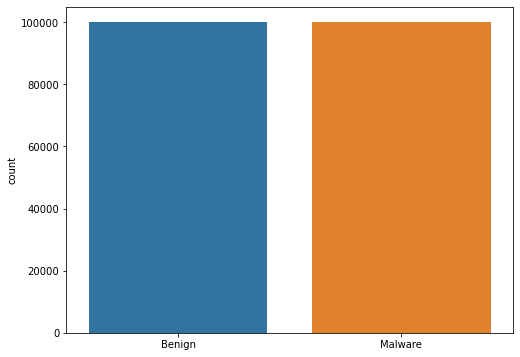

In [24]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(y_test)
ax.set_xticklabels(['Benign', 'Malware'])

In [3]:
# Normalization Data

normalize = MinMaxScaler()
normalize_features = normalize.fit_transform(X)
normalize_features_X = pd.DataFrame(normalize_features)

normalize_features_X.head()

0         1         2         3         4         5         6     \
0  0.056623  0.008114  0.024203  0.015924  0.021407  0.010883  0.017244   
1  0.006936  0.004553  0.014025  0.012579  0.012161  0.010599  0.013546   
2  0.020851  0.004755  0.012478  0.012872  0.011620  0.009461  0.012618   
3  0.006356  0.003866  0.011812  0.011262  0.010299  0.009263  0.012336   
4  0.022012  0.004019  0.011953  0.011270  0.010367  0.009216  0.011996   

       7         8         9     ...  2371  2372  2373  2374          2375  \
0  0.004507  0.076704  0.019155  ...   0.0   0.0   0.0   0.0  0.000000e+00   
1  0.005989  0.035548  0.013084  ...   0.0   0.0   0.0   0.0  2.801456e-08   
2  0.006327  0.031745  0.012594  ...   0.0   0.0   0.0   0.0  0.000000e+00   
3  0.005797  0.030801  0.011572  ...   0.0   0.0   0.0   0.0  3.268366e-08   
4  0.005687  0.030539  0.011539  ...   0.0   0.0   0.0   0.0  0.000000e+00   

       2376  2377  2378  2379  2380  
0  0.000000   0.0   0.0   0.0   0.0  
1  0.000004   0.0   0.0   0.0   0.0  
2  0.000000   0.0   0.0   0.0   0.0  
3  0.000004   0.0   0.0   0.0   0.0  
4  0.000000   0.0   0.0   0.0   0.0  

[5 rows x 2381 columns]

In [5]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline 

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0,test_size=0.2)
X_trainf, X_testf, y_trainf, y_testf = train_test_split(scaled_features_X,y,stratify=y,random_state=0,test_size=0.2)
X_trainy, X_testy, y_trainy, y_testy = train_test_split(normalize_features_X,y,stratify=y,random_state=0,test_size=0.2)
# X_train, y_test = train_test_split(df,test_size=0.2)

# X_new = SelectKBest(chi2, k=10).fit_transform(X_train, y_train)

# X_new.shape

# X_train.isnull().sum().sum()

In [7]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.feature_selection import mutual_info_classif
from tqdm.notebook import tqdm

In [6]:
# Determine the mutual information


mutual_info = mutual_info_classif(X_trainy, y_trainy)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_trainy.columns
mutual_info.sort_values(ascending=False)

KeyboardInterrupt: 

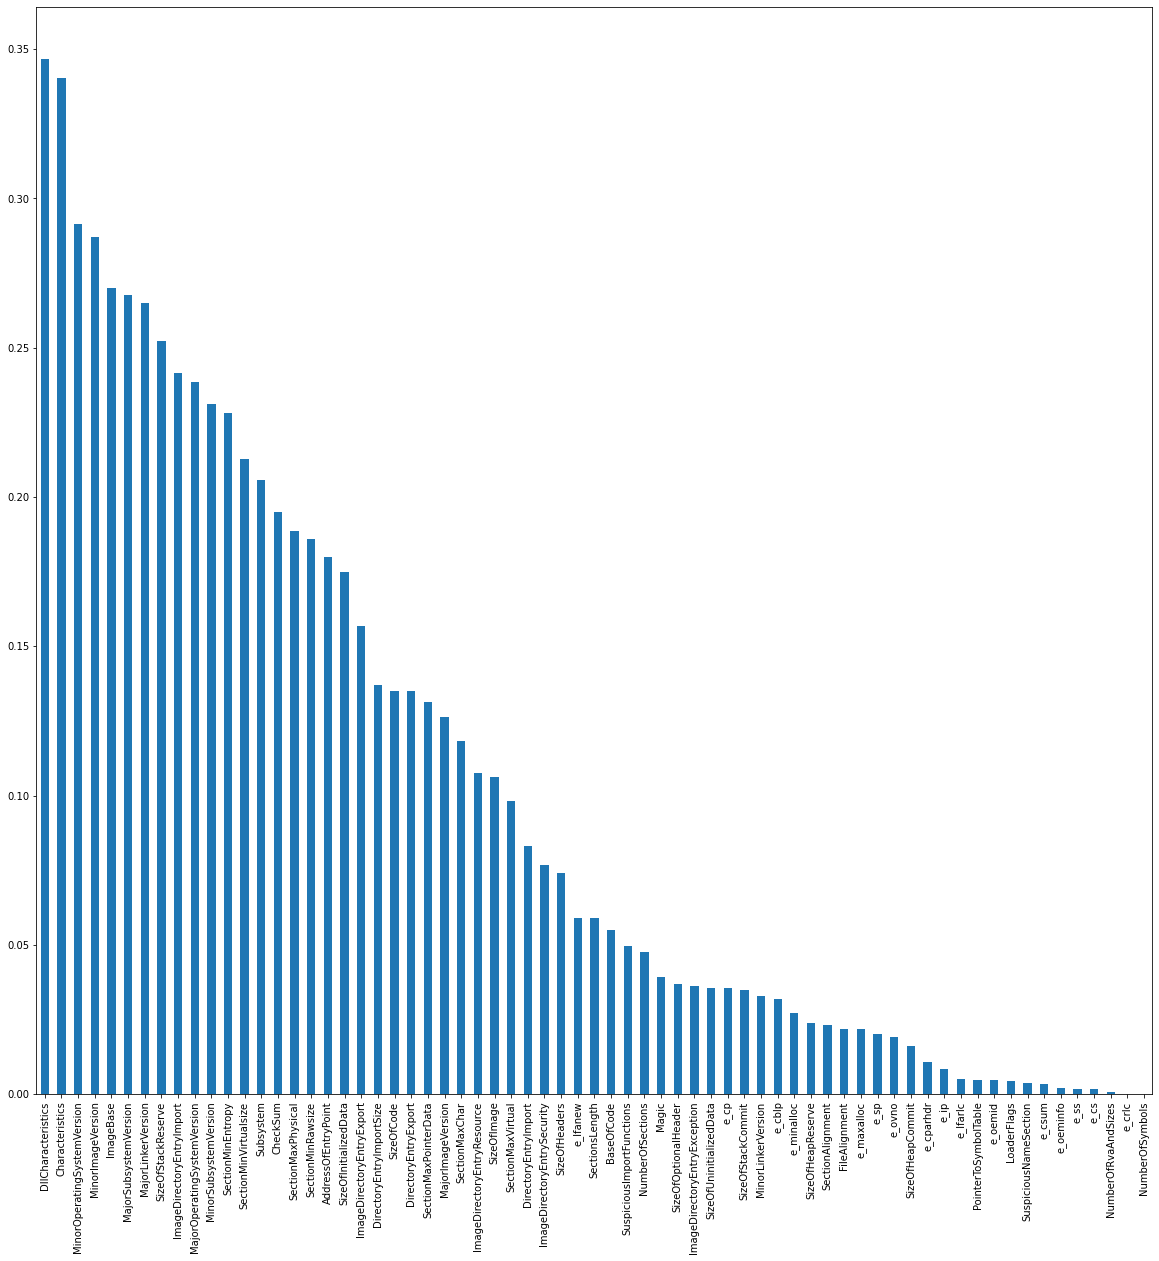

In [20]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,20))

In [21]:
## How to choose the best parameter for machine learning model that we use.

# from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(SVC(gamma='auto'), {
#     'C':[1,10,20],
#     'kernel': ['sigmoid','rbf', 'linear', 'poly']
# }, cv=5, return_train_score=False)
# clf.fit(X_trainf,y_trainf)
# clf.cv_results_

In [22]:
# clf.best_score_

In [23]:
# clf.best_params_

In [11]:
pip install jupyter_contrib_nbextensions

  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963419 sha256=14a792c40d5128fc5459cd72d5076671e8c78f74ae0523df34a9967ee76237e6
  Stored in directory: c:\users\fauzanhikmahramadhan\appdata\local\pip\cache\wheels\4d\ba\f4\b8c0941055519ebc0f27e85bfe2bb223f1a59a3b8bfc5c7515
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465846 sha256=0a6fb80e0c8dad14f320d6387babc0bba39539cddd54f4753a5d66570a8ef87c
  Stored in directory: c:\users\fauzanhikmahramadhan\appdata\local\pip\cache\wheels\e3\3a\b3\a709b437602c3807f079f0c35ccba3e1adf9af6f2e6b0ebfea
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator
Note: you may need to restart the kernel to use updated packages.


In [ ]:
jupyter nbextension enable codefolding/main


In [24]:
# Adaboost, Gradient Boosting

AB = AdaBoostClassifier(random_state=0)
AB.fit(X_train,y_train)
AB_pred = AB.predict(X_test)
print('AdaBoost: \n')
print(classification_report(y_test, AB_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_test,AB_pred)*100, "%")

GB = GradientBoostingClassifier(random_state=0)
GB.fit(X_train,y_train)
GB_pred = GB.predict(X_test)
print('GradienBoosting: \n')
print(classification_report(y_test, GB_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_test,GB_pred)*100, "%")

AdaBoost: 

              precision    recall  f1-score   support

      Benign       0.97      0.92      0.94      1003
     Malware       0.97      0.99      0.98      2920

    accuracy                           0.97      3923
   macro avg       0.97      0.95      0.96      3923
weighted avg       0.97      0.97      0.97      3923

97.19602345144023 %
GradienBoosting: 

              precision    recall  f1-score   support

      Benign       0.99      0.94      0.97      1003
     Malware       0.98      1.00      0.99      2920

    accuracy                           0.98      3923
   macro avg       0.99      0.97      0.98      3923
weighted avg       0.98      0.98      0.98      3923

98.31761407086414 %


In [12]:
# Random Forest and SVM without Hybrid

RF = RandomForestClassifier(n_estimators = 110)
RF.fit(X_trainf,y_trainf)
RF_pred = RF.predict(X_testf)
print('Random Forest: \n')
print(classification_report(y_testf, RF_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_testf,RF_pred)*100, "%")
seed = None
kfold = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(RF, X_train, y_train, cv=kfold)
print('Random Forest: \n',results.mean()*100, "%")


SVM = SVC(kernel='rbf',gamma='auto',probability=True,C=20)
SVM.fit(X_trainy,y_trainy)
SVM_pred = SVM.predict(X_testy)
print('Support Vector Machine: \n')
print(classification_report(y_testy, SVM_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_testy,SVM_pred)*100, "%")
seed = None
kfold = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(SVM, X_trainy, y_trainy, cv=kfold)



KeyboardInterrupt: 

In [26]:
# # Hybrid Ensemble Machine Learning


# estimators = []
# estimators.append(('RF1', RandomForestClassifier()))
# estimators.append(('SVM1', SVC(kernel='rbf')))
# hybrid = VotingClassifier(estimators)
# hybrid.fit(X_train, y_train)
# y1_pred = hybrid.predict(X_test)
# # cm_HybridEnsembler = confusion_matrix(y_test, y1_pred)
# # print(accuracy_score(y_test,y1_pred)*100, "%")

# #Cross-Validation
# seed = None
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# results = model_selection.cross_val_score(hybrid, X_train, y_train, cv=kfold)

# print('Hybrid Machine Learning: \n',results.mean()*100, "%")





In [27]:
# print('Hybrid Machine Learning: \n')
# print(classification_report(y_test, y1_pred, target_names=['Benign', 'Malware']))
# print(accuracy_score(y_test,y1_pred)*100, "%")

In [ ]:
%%time

# Hybrid Machine Learning Using Stacking Classifier

from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[RandomForestClassifier(n_estimators = 110),SVC(kernel='rbf',gamma='auto',probability=True,C=20)], meta_classifier=GradientBoostingClassifier(random_state=0))

for clf, label in zip([RandomForestClassifier(n_estimators = 110), SVC(kernel='rbf',gamma='auto',probability=True,C=20), sclf], ['Random Forest','Support Vector Machine','Stacking Classifier']):
  scores = model_selection.cross_val_score(clf, X_trainy, y_trainy, cv=10, scoring='accuracy')
  print("Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), label))

sclf.fit(X_trainy, y_trainy)
sclf_preds = sclf.predict(X_testy)

Accuracy: 0.9947 (+/- 0.0009) [Random Forest]


In [ ]:
print('Hybrid Machine Learning: \n')
print(classification_report(y_test, GB_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_testf,sclf_pred)*100, "%")

In [ ]:
# Confusion Matrix

# for clf, label in zip([RF_pred, SVM_pred, sclf_preds], ['Random Forest','Support Vector Machine','Stacking Classifier']):
#   ax=sns.heatmap(confusion_matrix(clf, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
#   ax.set_xlabel('Predicted labels')
#   ax.set_ylabel('True labels')
#   ax.set_label(label)

# ax=sns.heatmap(confusion_matrix(sclf_preds, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# ax.set_title('Stacking Hybrid Machine Learning')

# ax1=sns.heatmap(confusion_matrix(RF_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
# ax1.set_xlabel('Predicted labels')
# ax1.set_ylabel('True labels')
# ax1.set_label('Random Forest')

# ax2=sns.heatmap(confusion_matrix(SVM_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
# ax2.set_xlabel('Predicted labels')
# ax2.set_ylabel('True labels')
# ax2.set_label('Support Vector Machine')

In [ ]:
# ax1=sns.heatmap(confusion_matrix(RF_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
# ax1.set_xlabel('Predicted labels')
# ax1.set_ylabel('True labels')
# ax1.set_title('Random Forest')

In [ ]:
# ax2=sns.heatmap(confusion_matrix(SVM_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
# ax2.set_xlabel('Predicted labels')
# ax2.set_ylabel('True labels')
# ax2.set_title('Support Vector Machine')

In [ ]:
# # ROC Curve for Comparing Which One is The Best Machine Learning Model

# r_probs = [0 for _ in range(len(y_testf))]

# RF_probs = RF.predict_proba(X_test)
# SVM_probs = SVM.predict_proba(X_testf)
# sclf_probs = sclf.predict_proba(X_testf.values)

# RF_probs = RF_probs[:, 1]
# SVM_probs = SVM_probs[:, 1]
# sclf_probs = sclf_probs[:, 1]

# from sklearn.metrics import roc_curve, roc_auc_score

# r_auc = roc_auc_score(y_testf, r_probs)
# RF_auc = roc_auc_score(y_test, RF_probs)
# SVM_auc = roc_auc_score(y_testf, SVM_probs)
# sclf_auc = roc_auc_score(y_testf, sclf_probs)

# print('Random (chance) Prediction: AUROC = {:.3f}'.format(r_auc))
# print('Random Forest Prediction: AUROC = {:.3f}'.format(RF_auc))
# print('SVM Prediction: AUROC = {:.3f}'.format(SVM_auc))
# print('Hybrd Machine Learning Prediction: AUROC = {:.3f}'.format(sclf_auc))

In [ ]:
# r_fpr, r_tpr, _ = roc_curve(y_testf, r_probs)
# RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
# SVM_fpr, SVM_tpr, _ = roc_curve(y_testf, SVM_probs)
# sclf_fpr, sclf_tpr, _ = roc_curve(y_testf, sclf_probs)

# plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = {:.4f})'.format(r_auc))
# plt.plot(RF_fpr, RF_tpr, marker='.', label='Random  Forest prediction (AUROC = {:.4f})'.format(RF_auc))
# plt.plot(SVM_fpr, SVM_tpr, marker='.', label='Support Vector Machine prediction (AUROC = {:.4f})'.format(SVM_auc))
# plt.plot(sclf_fpr, sclf_tpr, marker='.', label='Hybrid Machine Learning Prediction (AUROC = {:.4f})'.format(sclf_auc))


# # Title
# plt.title('ROC plot')
# # Axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # Show legend
# plt.legend()
# # Show plot
# plt.show()

In [ ]:
# Plotting for Model Accuracy
plotting = []
plotting.append(accuracy_score(y_test,RF_pred)*100)
plotting.append(accuracy_score(y_test,SVM_pred)*100) 
plotting.append(accuracy_score(y_test,AB_pred)*100) 
plotting.append(accuracy_score(y_test,GB_pred)*100)
plotting.append(accuracy_score(y_testf,y1_pred)*100)
# plotting.append(results.mean()*100)  

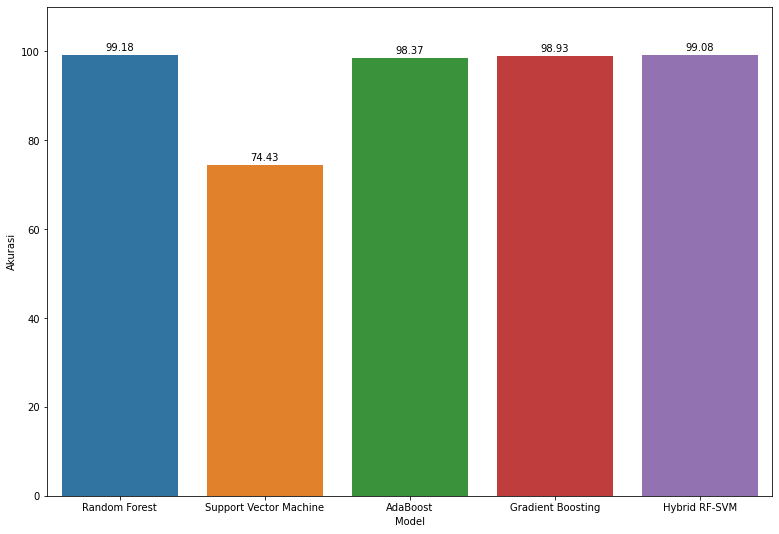

In [ ]:
plt.figure(figsize=(13, 9))
columns = ['Random Forest', 'Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'Hybrid RF-SVM']
models = pd.DataFrame (plotting, columns=['Akurasi'])
models['Model'] = columns
g = sns.barplot(x='Model', y='Akurasi', data=models)
for index, row in models.iterrows():
    g.text(row.name,row.Akurasi,round(row.Akurasi,2), color='black', ha="center", position=(row.name,(row.Akurasi + 1)))
g = g.set(ylim=(0,110))
plt.show()

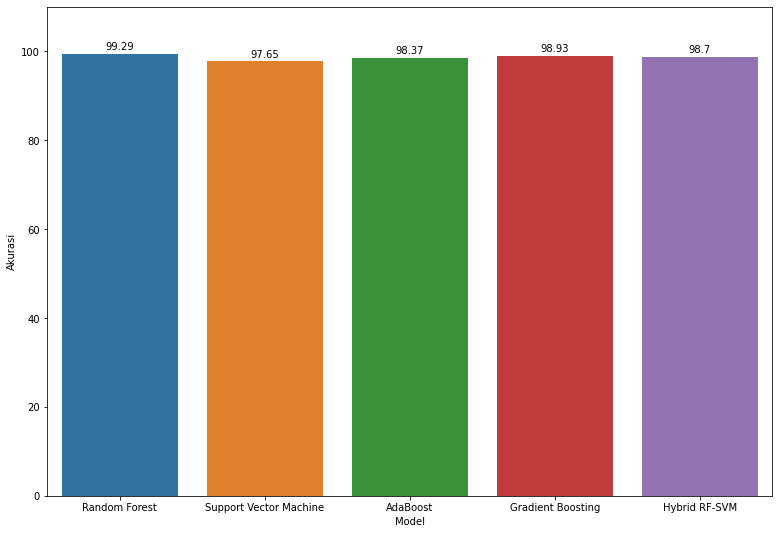

In [ ]:
import seaborn as sns


plt.figure(figsize=(13, 9))
columns = ['Random Forest', 'Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'Hybrid RF-SVM']
models = pd.DataFrame (plotting, columns=['Akurasi'])
models['Model'] = columns
g = sns.barplot(x='Model', y='Akurasi', data=models)
for index, row in models.iterrows():
    g.text(row.name,row.Akurasi,round(row.Akurasi,2), color='black', ha="center", position=(row.name,(row.Akurasi + 1)))
g = g.set(ylim=(0,110))
plt.show()

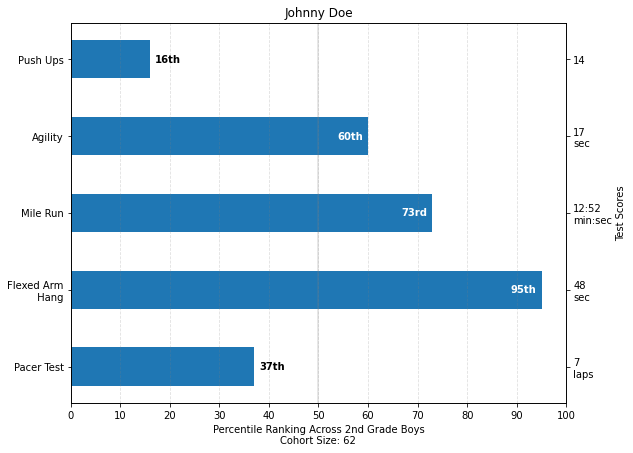

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_units = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(score, test):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    unit = test_units[test]
    if unit:
        return f'{score}\n{unit}'
    else:  # If no unit, don't include a newline, so that label stays centered.
        return score


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]


def plot_student_results(student, scores, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7))  # Create the figure
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.manager.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names))

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    # Set the tick locations
    ax2.set_yticks(pos)
    # Set equal limits on both yaxis so that the ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # Set the tick labels
    ax2.set_yticklabels([format_score(scores[k].score, k) for k in test_names])

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rank_str = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(
            rank_str, xy=(width, yloc), xytext=(xloc, 0),
            textcoords="offset points",
            horizontalalignment=align, verticalalignment='center',
            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # Make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # Return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(
    test_names,
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()

In [ ]:
X_test[X_test['e_cblp'] == 144]

e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  \
13106     144     3       0          4           0       65535     0   184   
4225      144     3       0          4           0       65535     0   184   
3117      144     3       0          4           0       65535     0   184   
16252     144     3       0          4           0       65535     0   184   
10514     144     3       0          4           0       65535     0   184   
...       ...   ...     ...        ...         ...         ...   ...   ...   
28        144     3       0          4           0       65535     0   184   
14241     144     3       0          4           0       17744     0   332   
8204      144     3       0          4           0       65535     0   184   
13609     144     3       0          4           0       65535     0   184   
12827     144     3       0          4           0       65535     0   184   

       e_csum  e_ip   e_cs  e_lfarlc  e_ovno  e_oemid  e_oeminfo  e_lfanew  \
13106       0     0      0        64       0        0          0       224   
4225        0     0      0        64       0        0          0       232   
3117        0     0      0        64       0        0          0       160   
16252       0     0      0        64       0        0          0       224   
10514       0     0      0        64       0        0          0       232   
...       ...   ...    ...       ...     ...      ...        ...       ...   
28          0     0      0        64       0        0          0       248   
14241       2  1047  18293         0       0      267          6        12   
8204        0     0      0        64       0        0          0       128   
13609       0     0      0        64       0        0          0       208   
12827       0     0      0        64       0        0          0       224   

       Machine  NumberOfSections  TimeDateStamp  PointerToSymbolTable  \
13106    34404                 5     1374056757                     0   
4225       332                 4     1217413346                     0   
3117       332                 3     1117249724                     0   
16252      332                 5     1377144284                     0   
10514      332                 5     1394548398                     0   
...        ...               ...            ...                   ...   
28         332                 4     1160675868                     0   
14241      332                 2     1198851095                     0   
8204       332                 3     1400451477                     0   
13609      332                 6     1330111183                     0   
12827      332                 7     1363078305                     0   

       NumberOfSymbols  SizeOfOptionalHeader  Characteristics  Magic  \
13106                0                   240               35    523   
4225                 0                   224              259    267   
3117                 0                   224              271    267   
16252                0                   224             8450    267   
10514                0                   224              258    267   
...                ...                   ...              ...    ...   
28                   0                   224              259    267   
14241                0                   224              271    267   
8204                 0                   224              258    267   
13609                0                   224              258    267   
12827                0                   224              258    267   

       MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
13106                   8                   0       95232   
4225                    8                   0       12288   
3117                    6                   0      806912   
16252                  11                   0        4096   
10514                  11                   0       71168   
...                   ...

In [ ]:
# Hybrid Machine Learning

RF2 = RandomForestClassifier()
RF2.fit(X_train,y_train)
RF2_feature = RF2.feature_importances_
RF2_mean = np.mean(RF2_feature)
columns = X_test.columns.copy()
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, RF2.feature_importances_):
    feats[feature] = importance # add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
print(importances)





# val_input=pd.concat([X_test, pd.DataFrame(RF2_feature,columns = ['feature_importances']).set_index(X_test.index)],axis=1)

# print(val_input)

# RF2_pred = RF.predict(X_test)

# SVM2 = SVC(kernel='sigmoid',gamma='auto')
# SVM2.fit(X_train,y_train)
# SVM2_pred = SVM.predict(RF2.feature_importances_)

                              Gini-importance
e_cblp                               0.001834
e_cp                                 0.002273
e_crlc                               0.000016
e_cparhdr                            0.000601
e_minalloc                           0.000890
...                                       ...
ImageDirectoryEntryExport            0.013772
ImageDirectoryEntryImport            0.004769
ImageDirectoryEntryResource          0.003482
ImageDirectoryEntryException         0.001149
ImageDirectoryEntrySecurity          0.007977

[69 rows x 1 columns]


In [ ]:
datas = pd.DataFrame()
for columns in importances.index:
  if importances.loc[columns][0] > RF2_mean and columns != 'Malware':
    datas[columns] = scaled_features_X[columns]
datas.head()

TimeDateStamp  Characteristics  MajorLinkerVersion  SizeOfInitializedData  \
0      -0.160899        -0.580614           -0.078606              -0.028218   
1       0.275656        -0.557040            0.024473              -0.029047   
2       0.525738        -0.582719           -0.284765              -0.031009   
3       0.240078        -0.501790           -0.697082              -0.030882   
4       0.348717        -0.501790           -0.697082              -0.029867   

   ImageBase  MajorOperatingSystemVersion  MinorOperatingSystemVersion  \
0  -0.058173                    -0.018884                    -0.022178   
1  -0.067496                    -0.019964                    -0.022178   
2  -0.067496                    -0.021044                    -0.022178   
3  -0.067496                    -0.021044                    -0.022178   
4  -0.067496                    -0.021044                    -0.022178   

   MajorImageVersion  MinorImageVersion  MajorSubsystemVersion  \
0          -0.037225          -0.042078               0.283415   
1          -0.041990          -0.042078               0.283415   
2          -0.041990          -0.042078              -0.948422   
3          -0.037225          -0.042078              -0.948422   
4          -0.041196          -0.042078              -0.948422   

   MinorSubsystemVersion  SizeOfHeaders  CheckSum  Subsystem  \
0              -0.012984      -0.048297 -0.233040  -0.355026   
1              -0.015130      -0.048297 -0.233638  -0.355026   
2              -0.015130       0.171487 -0.233638  -0.355026   
3              -0.015130      -0.048297 -0.204962  -0.355026   
4              -0.015130      -0.048297 -0.233638  -0.355026   

   DllCharacteristics  SizeOfStackReserve  SectionMaxChar  \
0            0.894758           -0.399103        1.014413   
1            0.910370           -0.018495        1.071671   
2           -1.107499           -0.018495        0.098279   
3            0.890855            0.742721        0.103647   
4           -1.107499            0.742721        0.109015   

   DirectoryEntryImportSize  DirectoryEntryExport  
0                  0.394159               -0.0912  
1                  1.645403               -0.0912  
2                  0.583026               -0.0912  
3                  0.417768               -0.0912  
4                 -0.463612               -0.0912

In [ ]:
datas.shape

(19611, 19)

In [ ]:
df.shape

(19611, 70)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(datas,y,stratify=y,random_state=0,test_size=0.2)

SVM2 = SVC(kernel='sigmoid',gamma='auto')
SVM2.fit(X2_train,y2_train)
SVM2_pred = SVM2.predict(X2_test)
print(classification_report(y2_test, SVM2_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y2_test,SVM2_pred)*100, "%")


              precision    recall  f1-score   support

      Benign       0.77      0.74      0.75      1003
     Malware       0.91      0.92      0.92      2920

    accuracy                           0.88      3923
   macro avg       0.84      0.83      0.84      3923
weighted avg       0.87      0.88      0.88      3923

87.586031098649 %


In [ ]:
X2_train

TimeDateStamp  Characteristics  MajorLinkerVersion  \
2420       -1.951695         2.906252           -0.697082   
11414      -0.113684        -0.556935            0.024473   
15489       4.280345         0.281500            0.539869   
17468       0.669345         0.305073            0.539869   
9309        0.031581        -0.580509           -0.078606   
...              ...              ...                 ...   
4361       -0.725178         0.305073           -0.078606   
10414       0.418397        -0.557040            0.230631   
14552       0.293002        -0.557040            0.230631   
18041       0.316486        -0.557040            0.230631   
13386       0.348624        -0.557040            0.024473   

       SizeOfInitializedData  ImageBase  MajorOperatingSystemVersion  \
2420               -0.031279  -0.067496                    -0.021044   
11414              -0.030958  -0.067496                    -0.019964   
15489              -0.030848  -0.053507                    -0.014564   
17468              -0.031169  -0.066921                    -0.019964   
9309                0.047133  -0.055840                    -0.021044   
...                      ...        ...                          ...   
4361               -0.030400  -0.066921                    -0.021044   
10414              -0.006852  -0.067496                    -0.019964   
14552              -0.019620  -0.067496                    -0.019964   
18041              -0.030155  -0.067496                    -0.018884   
13386              -0.025750  -0.067496                    -0.019964   

       MinorOperatingSystemVersion  MajorImageVersion  MinorImageVersion  \
2420                     -0.022178          -0.041990          -0.042078   
11414                    -0.022178          -0.041990          -0.042078   
15489                    -0.022178          -0.034049          -0.042078   
17468                    -0.020948          -0.038020          -0.036435   
9309                     -0.022178          -0.041990          -0.042078   
...                            ...                ...                ...   
4361                     -0.022178          -0.041990          -0.042078   
10414                    -0.020948          -0.041990          -0.042078   
14552                    -0.020948          -0.038020          -0.041137   
18041                    -0.018486          -0.037225          -0.039256   
13386                    -0.022178          -0.041990          -0.042078   

       MajorSubsystemVersion  MinorSubsystemVersion  SizeOfHeaders  CheckSum  \
2420               -0.948422              -0.015130       0.171487 -0.233638   
11414              -0.948422              -0.015130      -0.048297  0.060125   
15489               1.515251              -0.015130      -0.048297 -0.233406   
17468               0.283415              -0.014057      -0.048297 -0.233638   
9309                0.283415              -0.012984      -0.048297 -0.233638   
...                      ...                    ...            ...       ...   
4361               -0.948422              -0.015130       0.171487 -0.233344   
10414               0.283415              -0.014057      -0.048297 -0.229766   
14552               0.283415              -0.014057      -0.048297 -0.231662   
18041               1.515251              -0.011911      -0.048297 -0.232461   
13386               0.283415              -0.015130      -0.048297  3.849429   

       Subsystem  DllCharacteristics  SizeOfStackReserve  SectionMaxChar  \
2420   -0.355026           -1.107499           -0.018495        1.014413   
11414  -0.355026            0.968916           -0.018495        0.098279   
15489   1.707909           -0.086855           -0.589407        0.098279   
17468  -0.355026           -1.087984           -0.018495        0.098279   
9309   -0.355026            0.890855           -0.018495        0.098279   
...          ...                 ...                 ...             ...   
436

In [ ]:
X1_test.shape

NameError: ignored

In [ ]:
# nge cek cara pakai .loc yang benar

# importances.loc[['e_cblp']]
# importances.loc['e_cblp'][0]

In [ ]:
df.head()

In [ ]:
print(X_test.shape, RF2_feature.shape)

(3923, 69) (69,)


In [ ]:
importances.index

Index(['e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc', 'e_maxalloc',
       'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc', 'e_ovno',
       'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine', 'NumberOfSections',
       'TimeDateStamp', 'PointerToSymbolTable', 'NumberOfSymbols',
       'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes',
       'SuspiciousImportFunctions', 'S

In [ ]:
df.columns


Index(['e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc', 'e_maxalloc',
       'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc', 'e_ovno',
       'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine', 'NumberOfSections',
       'TimeDateStamp', 'PointerToSymbolTable', 'NumberOfSymbols',
       'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       'SuspiciousImportFun

In [ ]:
datas = df[importances.index].copy()

In [ ]:
datas

e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  \
0         144     3       0          4           0       65535     0   184   
1         144     3       0          4           0       65535     0   184   
2         144     3       0          4           0       65535     0   184   
3         144     3       0          4           0       65535     0   184   
4         144     3       0          4           0       65535     0   184   
...       ...   ...     ...        ...         ...         ...   ...   ...   
19606     144     3       0          4           0       65535     0   184   
19607     144     3       0          4           0       65535     0   184   
19608       0     0       0          0           0           0     0     0   
19609     144     3       0          4           0       65535     0   184   
19610     144     3       0          4           0       65535     0   184   

       e_csum  e_ip  e_cs  e_lfarlc  e_ovno  e_oemid  e_oeminfo  e_lfanew  \
0           0     0     0        64       0        0          0       248   
1           0     0     0        64       0        0          0       240   
2           0     0     0        64       0        0          0       256   
3           0     0     0        64       0        0          0       128   
4           0     0     0        64       0        0          0       128   
...       ...   ...   ...       ...     ...      ...        ...       ...   
19606       0     0     0        64       0        0          0       240   
19607       0     0     0        64       0        0          0       264   
19608       0     0     0        64       0        0          0       128   
19609       0     0     0        64       0        0          0       224   
19610       0     0     0        64       0        0          0       240   

       Machine  NumberOfSections  TimeDateStamp  PointerToSymbolTable  \
0        34404                 6     1236512358                     0   
1          332                 5     1365109591                     0   
2          332                 6     1438777028                     0   
3          332                 7     1354629311                     0   
4          332                 7     1386631250                     0   
...        ...               ...            ...                   ...   
19606      332                 5     1377143713                     0   
19607      332                 5     1501777476                     0   
19608      332                 4     1377135839                     0   
19609      332                 5     1377141725                     0   
19610      332                 6     1377139145                     0   

       NumberOfSymbols  SizeOfOptionalHeader  Characteristics  Magic  \
0                    0                   240               34    523   
1                    0                   224              258    267   
2                    0                   224               14    267   
3                    0                   224              783    267   
4                    0                   224              783    267   
...                ...                   ...              ...    ...   
19606                0                   224              258    267   
19607                0                   224              258    267   
19608                0                   224             8450    267   
19609                0                   224             8450    267   
19610                0                   224             8450    267   

       MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                       8                   0       54784   
1                       9                   0      205824   
2                       6                   0       24576   
3                       2                  22       34304   
4                       2                  56        8192   
...                   ...            

In [ ]:
RF2_feature = RF2.feature_importances_

In [ ]:
used_feature = []
for feature in RF2.feature_importances_:
  if feature > np.mean(RF.feature_importances):
    used_feature.append(feature)

In [ ]:
importance = np.mean(RF2_feature)
importance

0.014492753623188404

In [ ]:
RF2_feature

array([2.09129997e-03, 2.74534560e-03, 1.51667010e-05, 7.75070082e-04,
       1.76384508e-03, 2.18469523e-03, 7.73617178e-08, 2.31321236e-03,
       1.03907476e-05, 2.09240817e-04, 6.25672517e-06, 2.90153119e-05,
       1.84951532e-04, 1.08029334e-04, 1.87357880e-04, 8.69351588e-03,
       2.14755195e-03, 2.77790787e-03, 6.74252337e-02, 1.77125650e-04,
       2.56375292e-04, 6.45069796e-04, 5.15691015e-02, 1.95628640e-03,
       6.55268777e-02, 2.36185728e-03, 4.17847787e-03, 2.65223813e-02,
       8.31317398e-04, 6.80521552e-03, 3.83176682e-03, 2.89238164e-02,
       5.47049988e-03, 1.69864216e-03, 7.82129133e-02, 8.91689700e-02,
       1.78106441e-02, 3.18151027e-02, 8.75690565e-02, 7.40436569e-02,
       1.02459748e-02, 1.51343101e-02, 1.13792106e-02, 6.40160161e-02,
       2.69625651e-02, 5.41139412e-02, 2.34483604e-03, 1.88397966e-03,
       7.69935147e-04, 1.38917534e-04, 3.08641823e-05, 3.86887245e-03,
       3.11092979e-05, 3.65775782e-03, 1.11501737e-02, 8.18296023e-03,
      

In [ ]:
for features in RF2_feature:
    if(features > importance):
      print(features)

0.06742523367819213
0.05156910153288255
0.065526877654142
0.026522381339101
0.02892381643479138
0.07821291328325357
0.08916896998727389
0.017810644089872693
0.031815102689947125
0.08756905651841089
0.07404365687959545
0.015134310125117395
0.06401601609220178
0.026962565134944418
0.05411394118036732
0.017169194662010494
0.0248792839948628


In [ ]:
X_train.shape

In [ ]:
RF_pred.shape

In [ ]:
train_X,val_X,train_y,val_y=train_test_split(X_train,y_train,stratify=y_train,test_size=0.2,random_state=0)
# val_y.isnull().sum().sum()

In [ ]:
columns=X.columns

In [ ]:
# SVM

model1=SVC(kernel='sigmoid',gamma='auto')
model1.fit(train_X,train_y)
y_val_pred1=model1.predict(val_X)
y_val_pred1=pd.DataFrame(y_val_pred1)
y_test_pred1=model1.predict(X_test)
y_test_pred1=pd.DataFrame(y_test_pred1)
# y_val_pred1.isnull().sum()

In [ ]:
val_input=pd.concat([pd.DataFrame(val_X,columns=columns),y_val_pred1.set_index(val_X.index)],axis=1)
test_input=pd.concat([pd.DataFrame(X_test,columns=columns),y_test_pred1.set_index(X_test.index)],axis=1)

In [ ]:
model=RandomForestClassifier(n_estimators=300)
model.fit(val_input,val_y)

In [ ]:
print((model.score(test_input,y_test))*100, "%")

In [ ]:
test_input.shape

In [ ]:
y_test.shape

In [ ]:
SVM_pred.shape

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# score = cross_val_score(RF,X,y,cv=KFold(20))

In [ ]:
# score

In [ ]:
# score.mean()

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler

# # clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# svm = SVC(gamma='auto')
# svm.fit(X, y)

In [ ]:
# RF.predict(X_test)

In [ ]:
# RF.score(X_test, y_test)

In [ ]:
# from sklearn.model_selection import cross_validate

In [ ]:
# from sklearn.inspection import permutation_importance

# hasil = permutation_importance(RF,X_test,y_test,random_state=0)
# hasil = hasil.importances

In [ ]:
# print(hasil.shape)


In [ ]:
# hasil[:,0]

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

import random
from pprint import pprint

from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions
from helper_functions import train_test_split, calculate_accuracy

def bootstrapping(train_df, n_bootstrap):
  bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
  df_bootstrapped = train_df.iloc[bootstrap_indices]

  return df_bootstrapped

In [ ]:
bootstrapping(X_train, n_bootstrap = 1000).duplicated()[:200]

In [ ]:
def get_potential_splits(data, random_subspace):
  potential_splits = {}
  _, n_columns = data.shape
  column_indices = list(range(n_columns - 1))
  
  if random_subspace and random_subspace <= len(column_indices):
    column_indices = random.sample(population=column_indices, k=random_subspace)

  for column_index in column_indices:
    values = data[:, column_index]
    unique_values = np.unique(values)

    potential_splits[column_index] = unique_values
  
  return potential_splits

In [ ]:
get_potential_splits(X_train.values, random_subspace=6)

In [ ]:
def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
  forest = []
  for i in range(n_trees):
    df_bootstrapped = bootstrapping(train_df, n_bootstrap)
    tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
    forest.append(tree)

  return forest

def random_forest_predictions(test_df, forest):
  df_predictions = {}
  for i in range(len(forest)):
    column_name = "tree_{}".format(i)
    predictions = decision_tree_predictions(test_df, tree=forest[i])
    df_predictions[column_name] = predictions

  df_predictions = pd.DataFrame(df_predictions)
  random_forest_predictions = df_predictions.mode(axis=1)[0]

In [ ]:
forest = random_forest_algorithm(X_train, n_trees=4, n_bootstrap=800, n_features=4, dt_max_depth=4)

In [ ]:
predictions = random_forest_predictions(y_test, forest)

In [ ]:
accuracy = calculate_accuracy(predictions, y_test.Malware)
print("Accuracy = {}".format(accuracy))

In [ ]:
df.dropna(inplace = True)

In [ ]:
# Random Forest Algorithm on Sonar Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt
 
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini
 
# Select the best split point for a dataset
def get_split(dataset, n_features):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	features = list()
	while len(features) < n_features:
		index = randrange(len(dataset[0])-1)
		if index not in features:
			features.append(index)
	for index in features:
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left, n_features)
		split(node['left'], max_depth, min_size, n_features, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right, n_features)
		split(node['right'], max_depth, min_size, n_features, depth+1)
 
# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
	root = get_split(train, n_features)
	split(root, max_depth, min_size, n_features, 1)
	return root
 
# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']
 
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
	sample = list()
	n_sample = round(len(dataset) * ratio)
	while len(sample) < n_sample:
		index = randrange(len(dataset))
		sample.append(dataset[index])
	return sample
 
# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
	predictions = [predict(tree, row) for tree in trees]
	return max(set(predictions), key=predictions.count)
 
# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
	trees = list()
	for i in range(n_trees):
		sample = subsample(train, sample_size)
		tree = build_tree(sample, max_depth, min_size, n_features)
		trees.append(tree)
	predictions = [bagging_predict(trees, row) for row in test]
	return(predictions)
 
# Test the random forest algorithm
seed(2)
# load and prepare data
# filename = 'sonar.all-data.csv'
# dataset = load_csv(filename)
# # convert string attributes to integers
# for i in range(0, len(dataset[0])-1):
# 	str_column_to_float(dataset, i)
# # convert class column to integers
# str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(df[0])-1))
for n_trees in [1, 5, 10]:
	scores = evaluate_algorithm(df, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
	print('Trees: %d' % n_trees)
	print('Scores: %s' % scores)
	print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

In [ ]:
# from sklearn import datasets
# import numpy as np
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# X = X[y != 0, :2]
# y = y[y != 0]

In [ ]:
# from sklearn.svm import SVC

# n_sample = len(X)
# X_Train = X[:int(.9 * n_sample)]
# y_Train = y[:int(.9 * n_sample)]
# X_Test = X[int(.9 * n_sample):]
# y_Test = y[int(.9 * n_sample):]


# svc = SVC(kernel= 'poly')
# svc.fit(X_Train, y_Train)
# svc.predict(X_Test)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=0)
# X = [[ 1,  2,  3],  # 2 samples, 3 features
#      [11, 12, 13]]
# y = [0, 1]  # classes of each sample
# clf.fit(X, y)

In [ ]:
# clf.predict([[4, 5, 10], [12, 13, 12], [1, 2, 3]])

In [ ]:
# from sklearn.preprocessing import StandardScaler
# X = [[0, 15],
#      [1, -10]]
# # scale data according to computed scaling values
# StandardScaler().fit_transform(X)

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# legit = df[df['Malware'] == 0]
# malware = df[df['Malware'] == 1]

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_validate

In [ ]:
# data_in = df.drop('Name',axis=1).values
# labels = df['Malware'].values

# data_in